# Experiment 01: Influence of number of centers

In [3]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

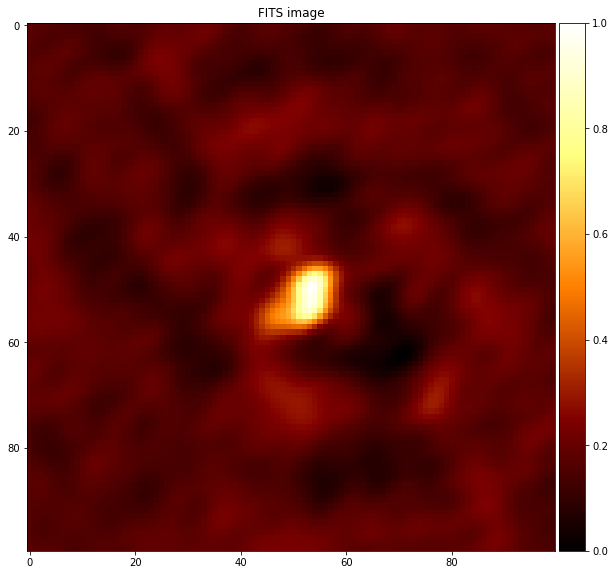

In [2]:
"""
Loading data
"""

fits_path = '../data/images/result-ngc3256_cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

In [4]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 1
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20114

Residual stats:
Residual RMS: 0.04795412681306757
Residual Variance: 0.002298029341235813
Flux Lost: 0.03860153555824903
Flux Addition: 0.043938269068038854
psi1(u-f): 10.26892254358269
Exceeded Pixels: 1289
Sharpness: 57.441292597115904
psi2(grad u): 10.07913382424952
Total elapsed time: 5.038613319396973 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2368271189110789
Mean min distance between collocation and center points:

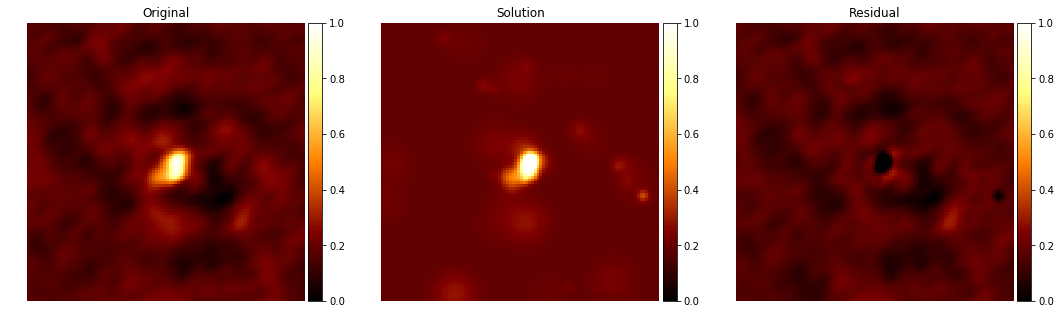

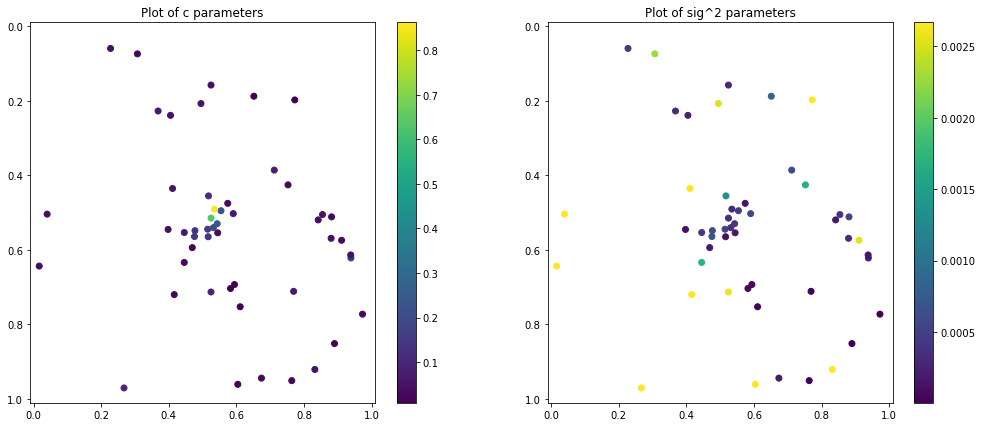

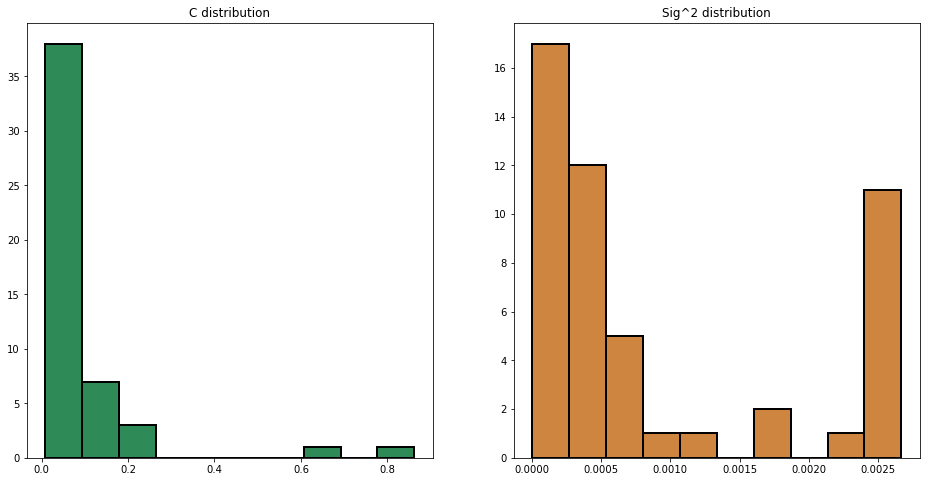

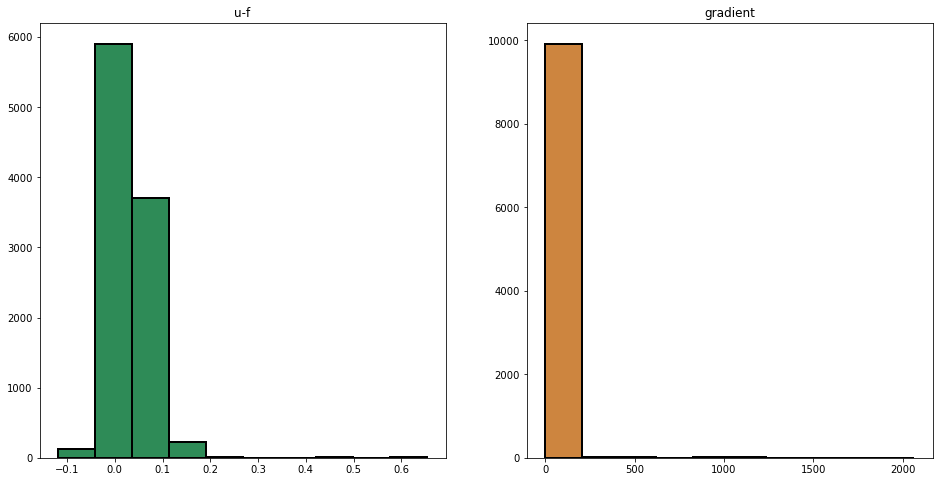

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30112

Residual stats:
Residual RMS: 0.2549808566872815
Residual Variance: 0.0646299186850772
Flux Lost: 0.024785661634460016
Flux Addition: 0.10841963368322767
psi1(u-f): 19.168431316682046
Exceeded Pixels: 1465
Sharpness: 113.4500774718218
psi2(grad u): 58.742025920240486
Total elapsed time: 10.968552827835083 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.18217143182401396
Mean min distance between collocation and center points:

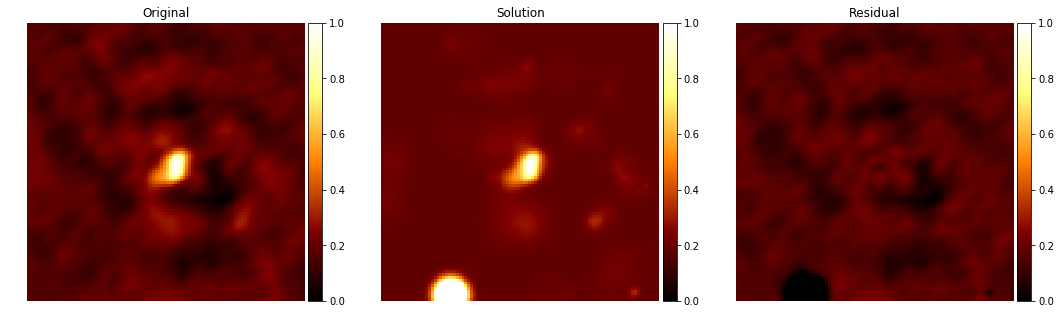

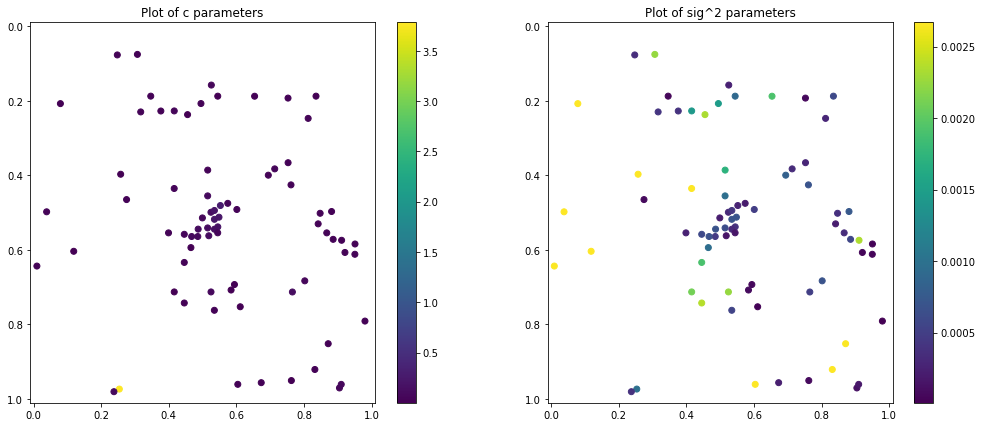

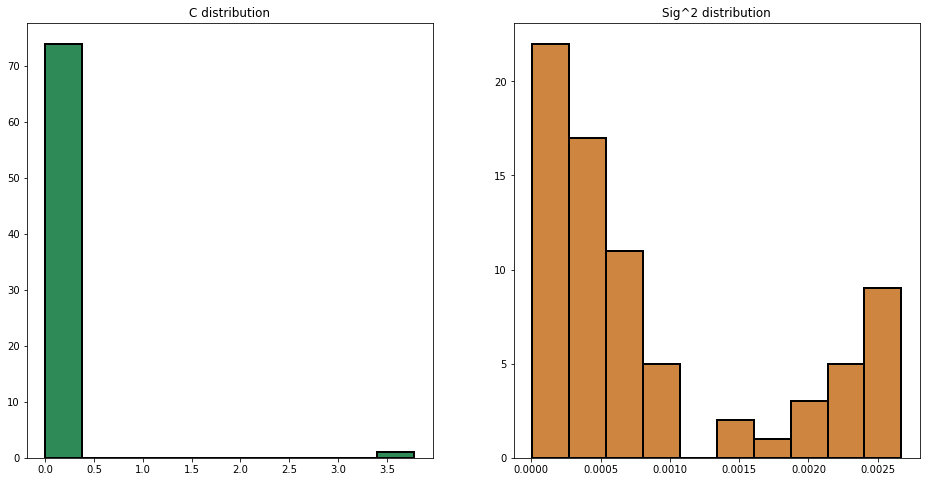

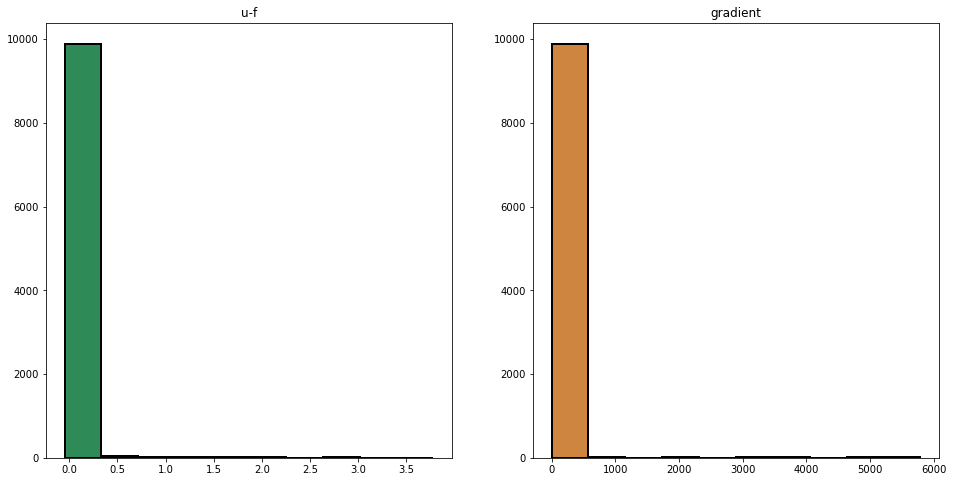

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40111

Residual stats:
Residual RMS: 3360.9659958733487
Residual Variance: 11291433.480442097
Flux Lost: 0.029833228535951894
Flux Addition: 290.84465130947234
psi1(u-f): 2.345240261429808
Exceeded Pixels: 1397
Sharpness: 490864.21286085015
psi2(grad u): 9.287065742689492
Total elapsed time: 20.047647714614868 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.18471964471313373
Mean min distance between collocation and center points: 

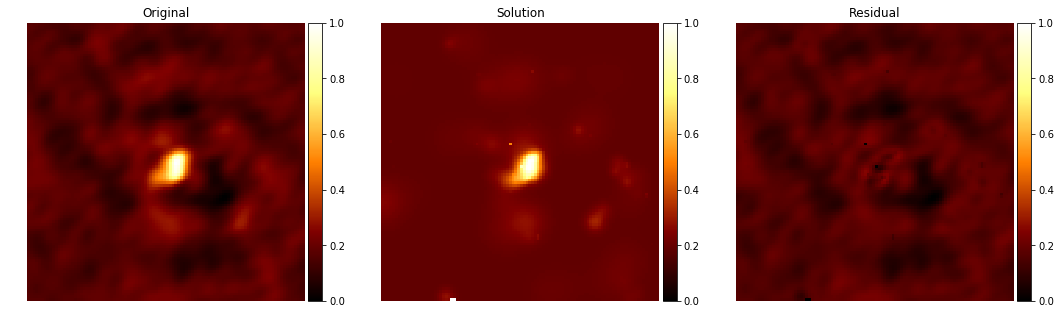

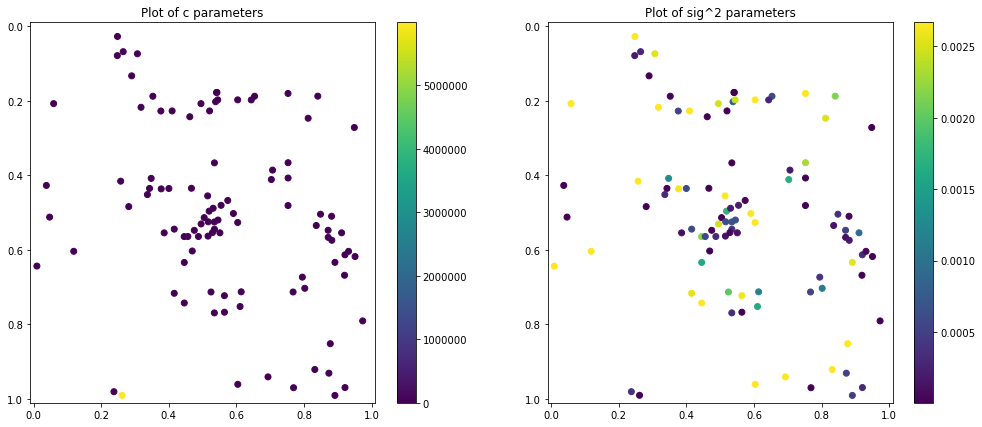

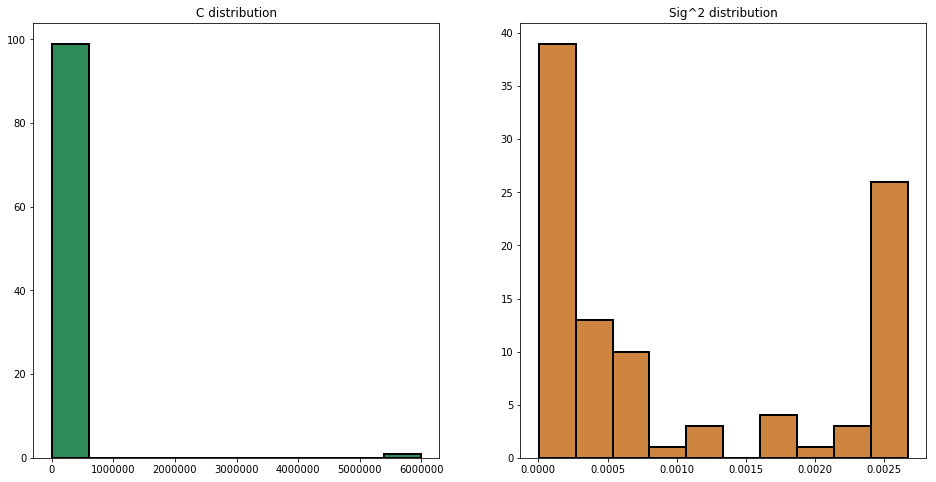

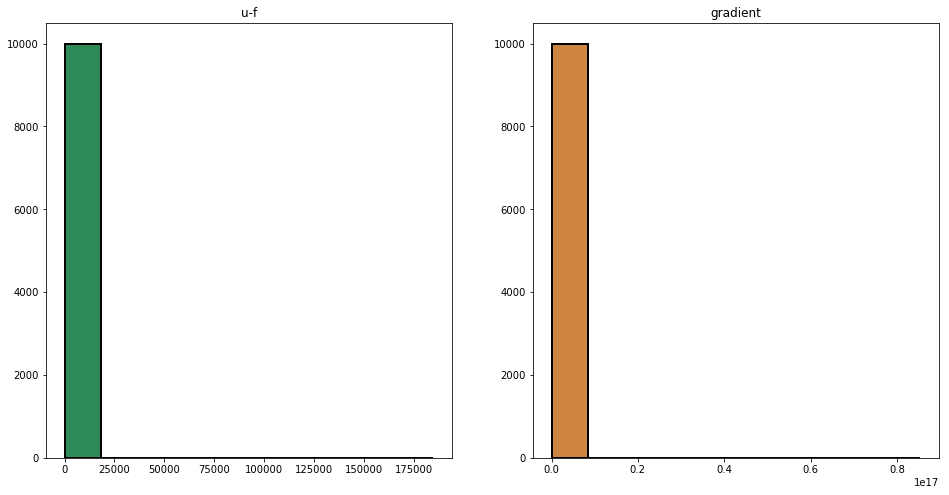

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50110

Residual stats:
Residual RMS: 0.012223466993954388
Residual Variance: 0.00014924862390229988
Flux Lost: 0.018347011726723088
Flux Addition: 0.016618851501677
psi1(u-f): 0.17842793050631642
Exceeded Pixels: 1515
Sharpness: 50.2396965420379
psi2(grad u): 2.762292024559628
Total elapsed time: 33.101560831069946 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.18217164592229304
Mean min distance between collocation and center poi

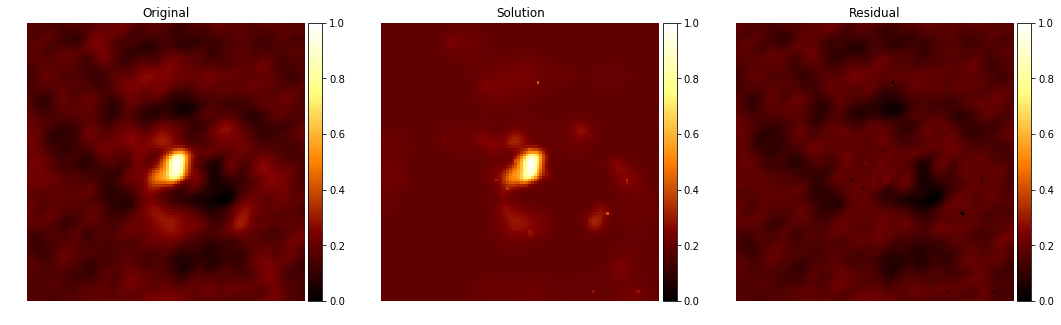

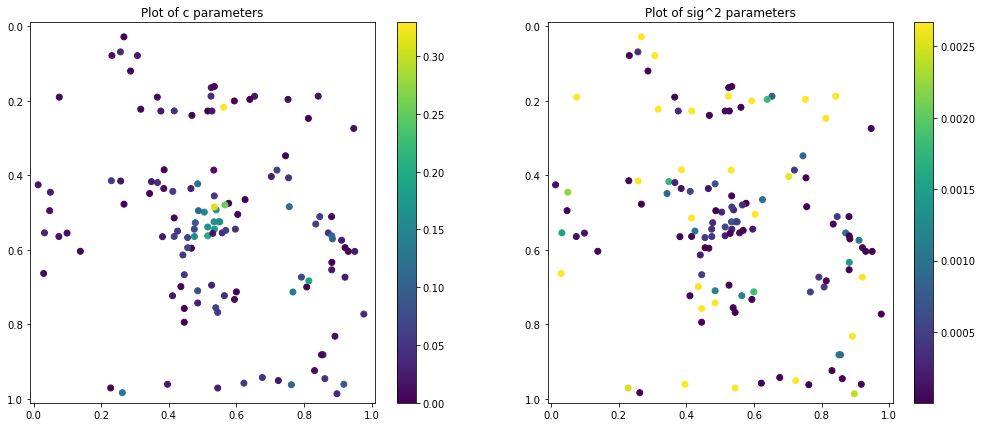

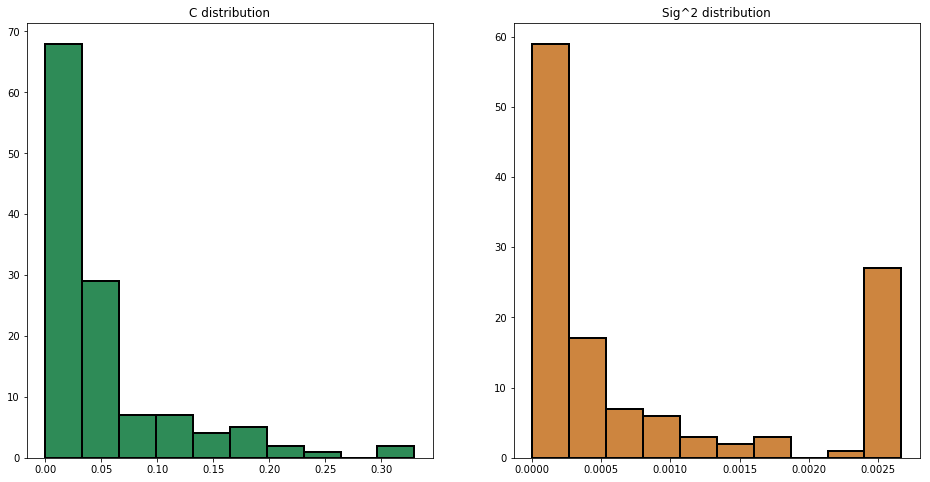

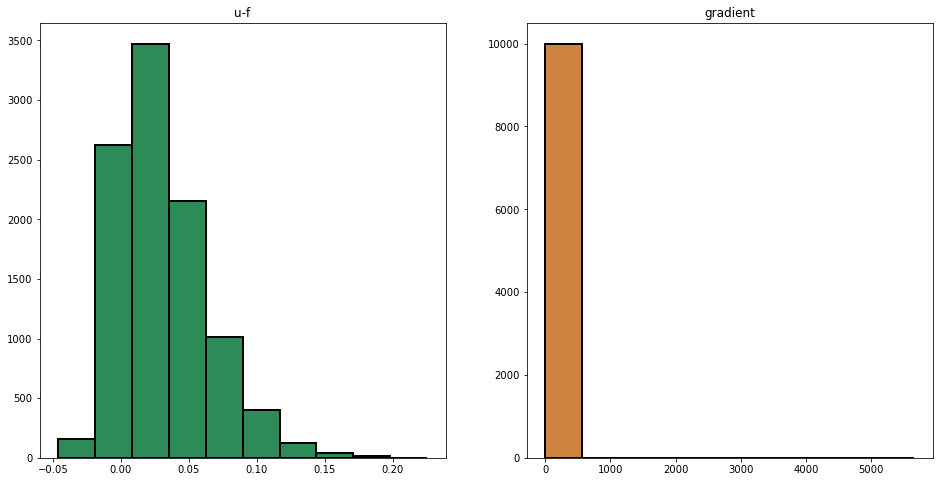

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60111

Residual stats:
Residual RMS: 0.009880244770454676
Residual Variance: 9.694040559023681e-05
Flux Lost: 0.01628881335385571
Flux Addition: 0.0127784375102991
psi1(u-f): 0.033147274094607826
Exceeded Pixels: 1449
Sharpness: 51.38368070432579
psi2(grad u): 2.7594897748259593
Total elapsed time: 52.116060972213745 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.17224497029083127
Mean min distance between collocation and center p

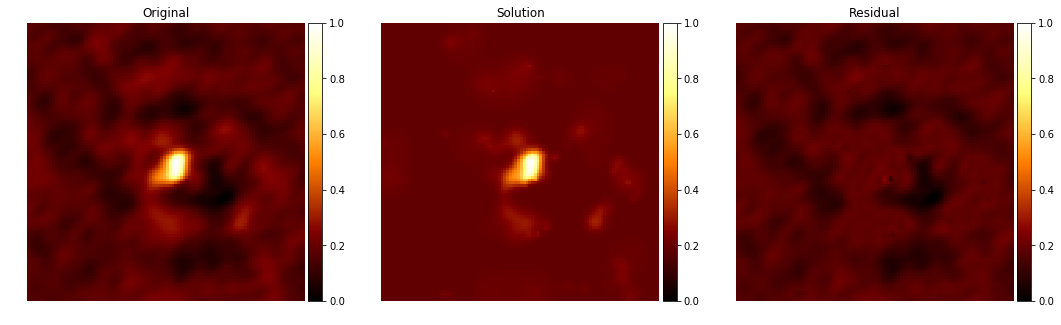

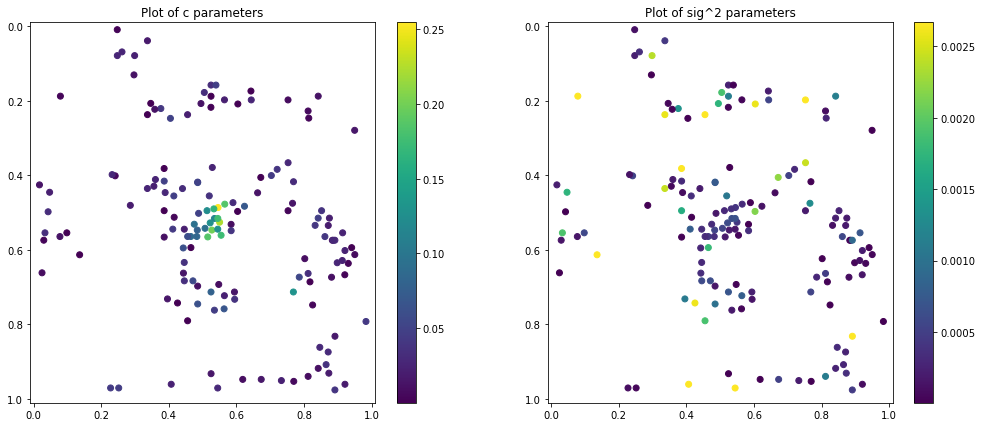

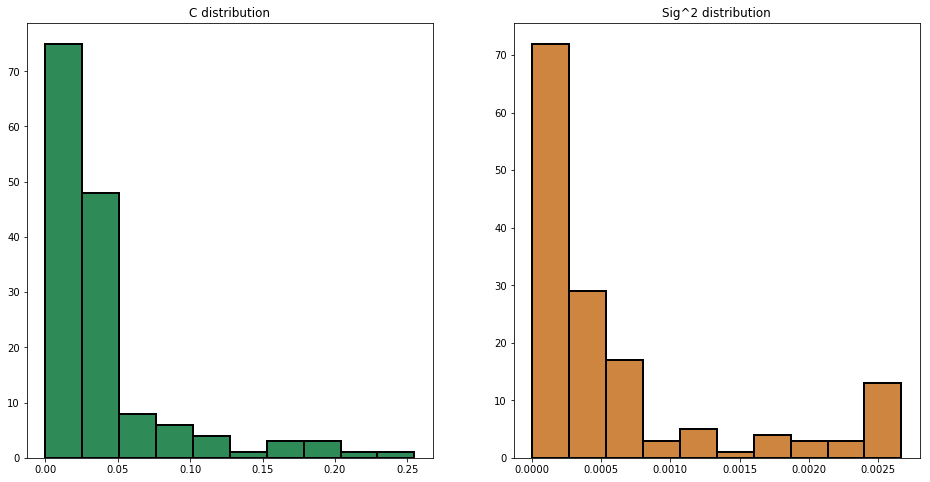

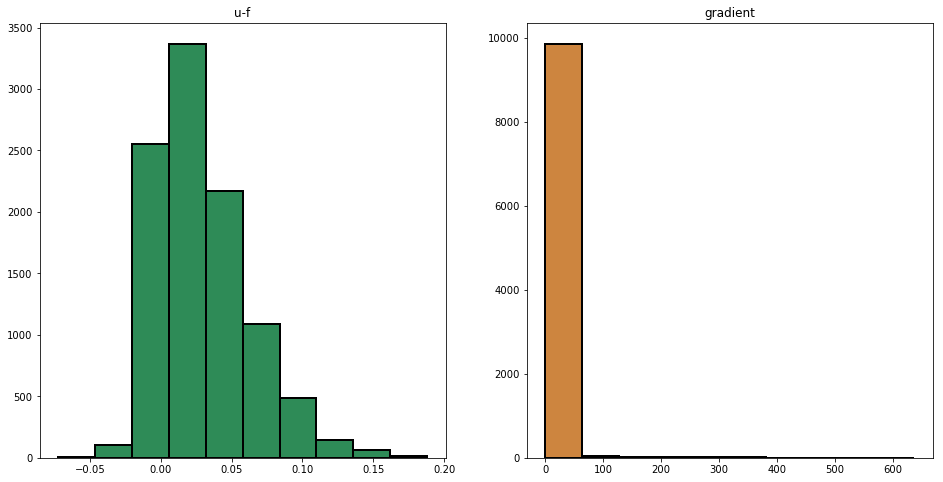

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70110

Residual stats:
Residual RMS: 0.008227945296529093
Residual Variance: 6.749078186418946e-05
Flux Lost: 0.013014509120380054
Flux Addition: 0.011069957856613832
psi1(u-f): 0.01927404259591238
Exceeded Pixels: 1474
Sharpness: 53.434968643179545
psi2(grad u): 2.7210334388178277
Total elapsed time: 78.13321661949158 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1642996717273136
Mean min distance between collocation and center 

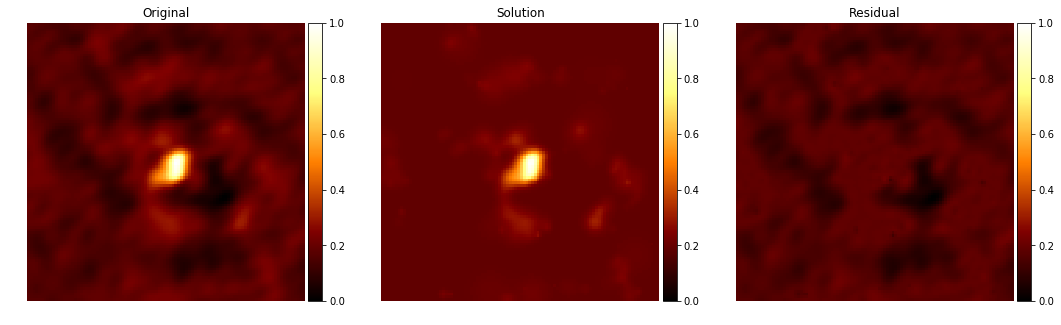

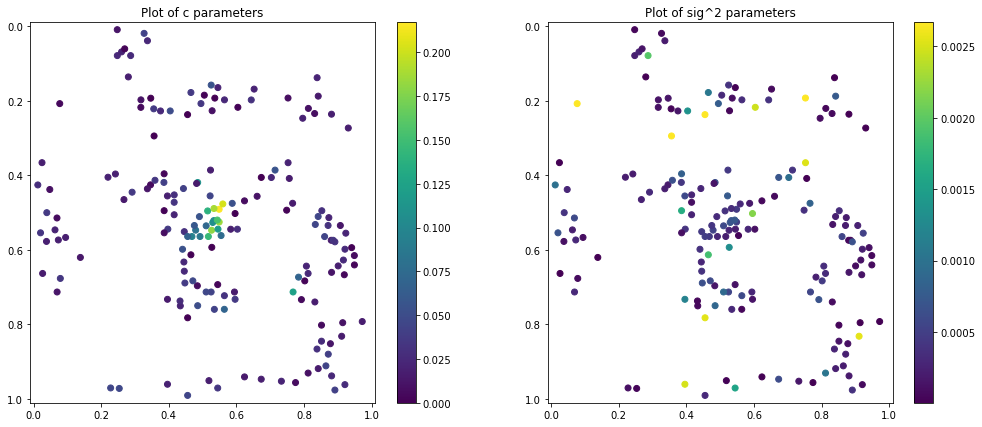

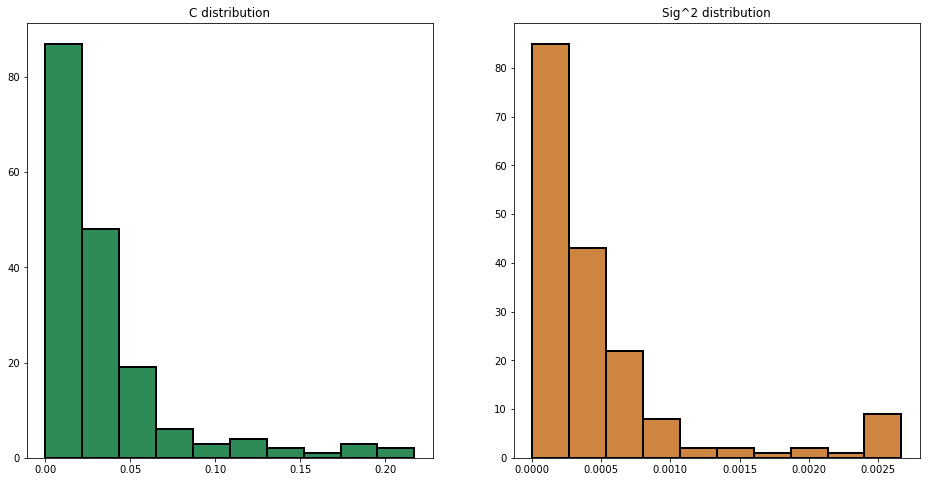

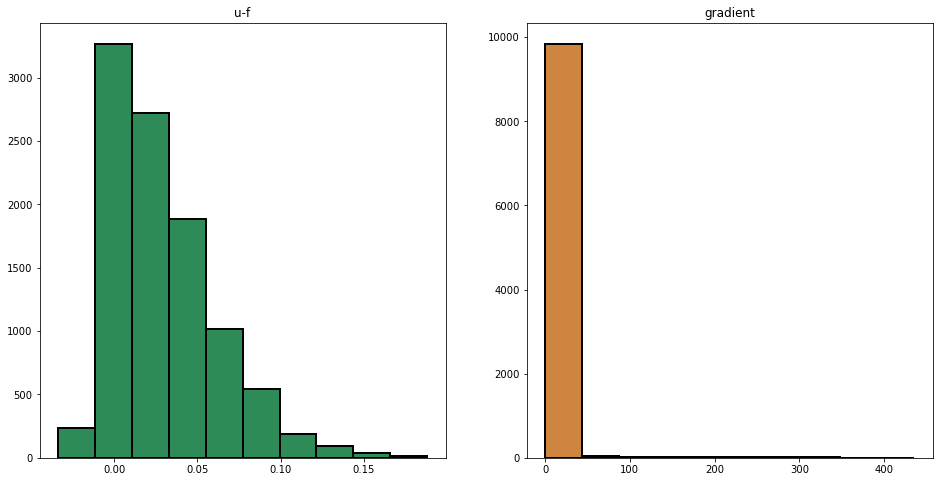

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80113

Residual stats:
Residual RMS: 0.007388599264117293
Residual Variance: 5.434951947542211e-05
Flux Lost: 0.011692788823334941
Flux Addition: 0.00959736261663571
psi1(u-f): 0.012448771196307086
Exceeded Pixels: 1443
Sharpness: 52.88924629371544
psi2(grad u): 2.7314773698432964
Total elapsed time: 114.80132031440735 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1694046187498853
Mean min distance between collocation and center 

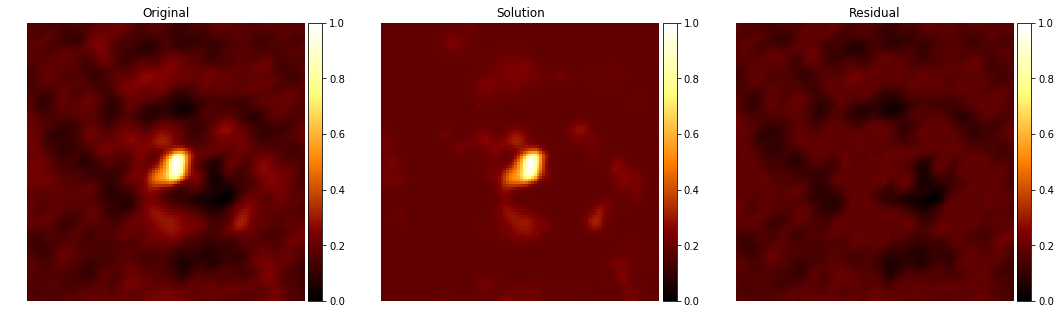

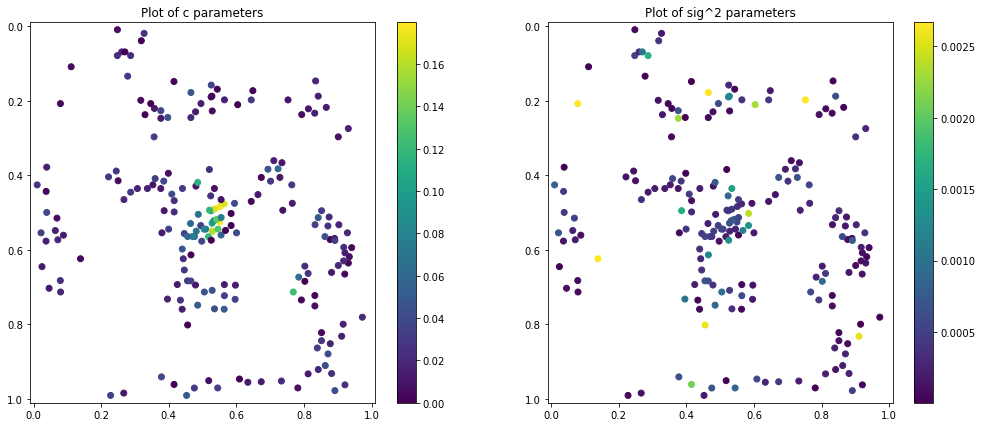

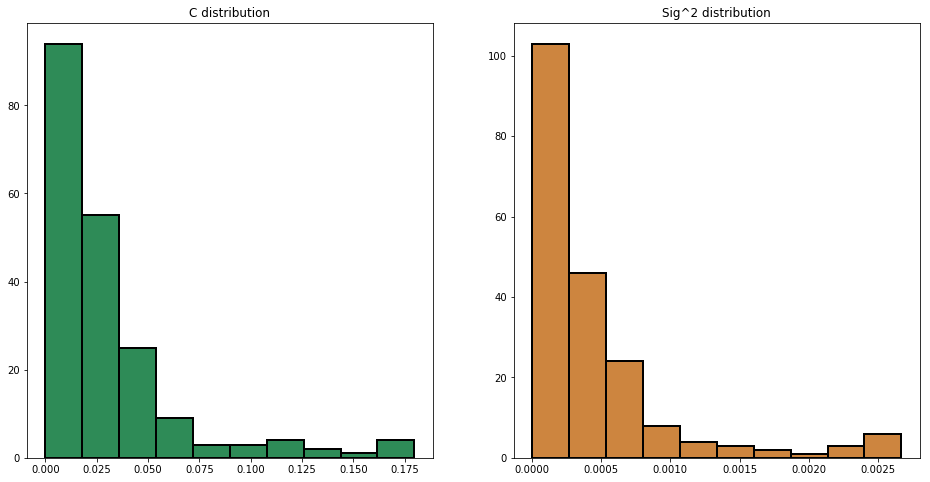

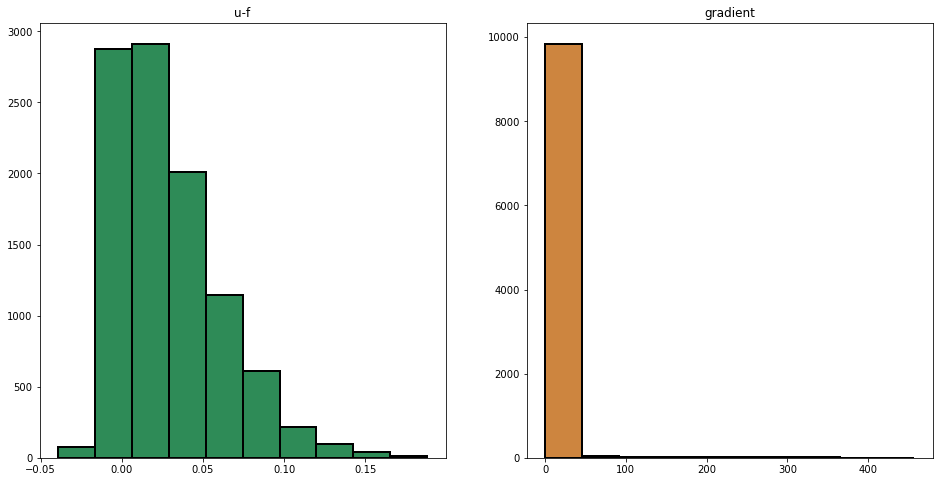

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90110

Residual stats:
Residual RMS: 0.007408598697248215
Residual Variance: 5.468812501261998e-05
Flux Lost: 0.011349243017353574
Flux Addition: 0.009447604694234854
psi1(u-f): 0.012369805646393301
Exceeded Pixels: 1444
Sharpness: 53.3255191799445
psi2(grad u): 2.86737013110782
Total elapsed time: 156.11365723609924 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.17559939643821285
Mean min distance between collocation and center p

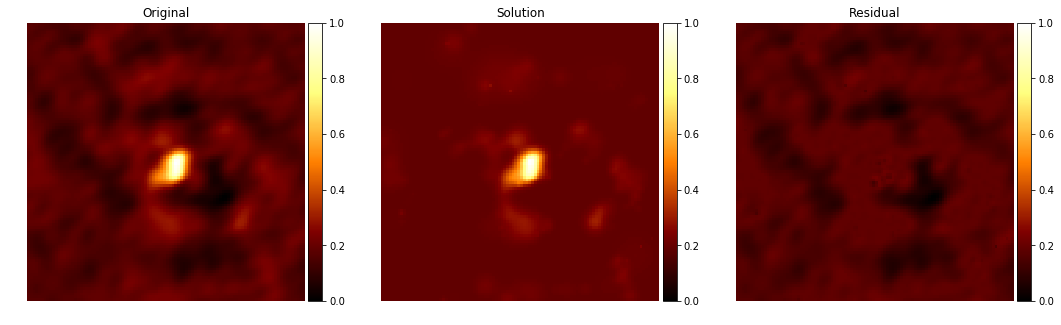

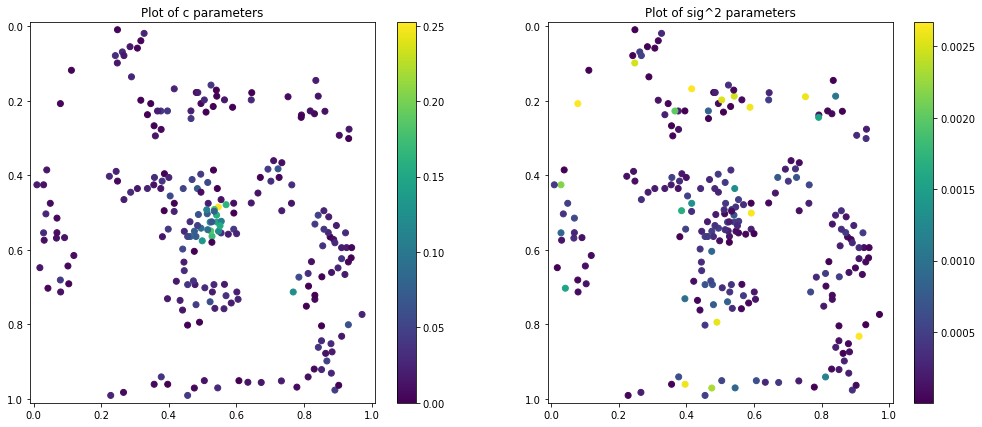

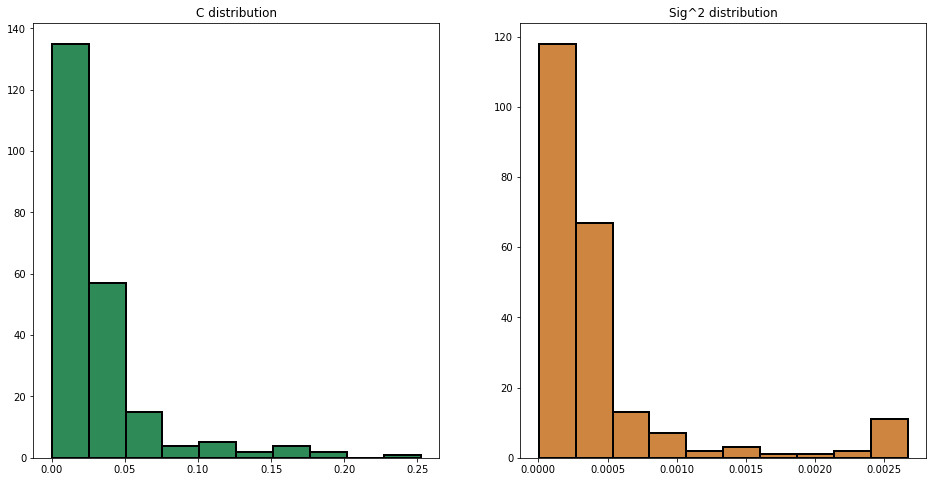

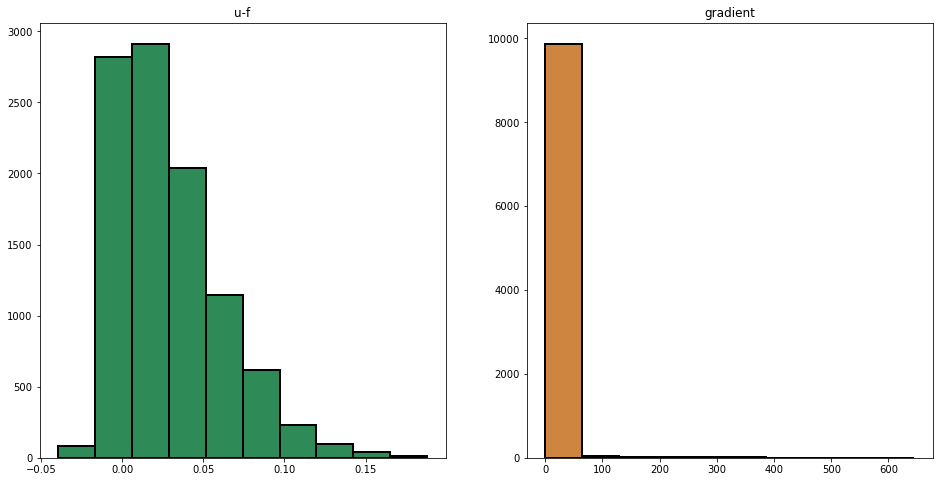

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.006334728968766342
Residual Variance: 3.9772418746232694e-05
Flux Lost: 0.010384702868793673
Flux Addition: 0.007841243826523153
psi1(u-f): 0.006948140133676858
Exceeded Pixels: 1412
Sharpness: 53.501151695921415
psi2(grad u): 2.7808868861429756
Total elapsed time: 218.86814284324646 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.17465946832475734
Mean min distance between collocation and c

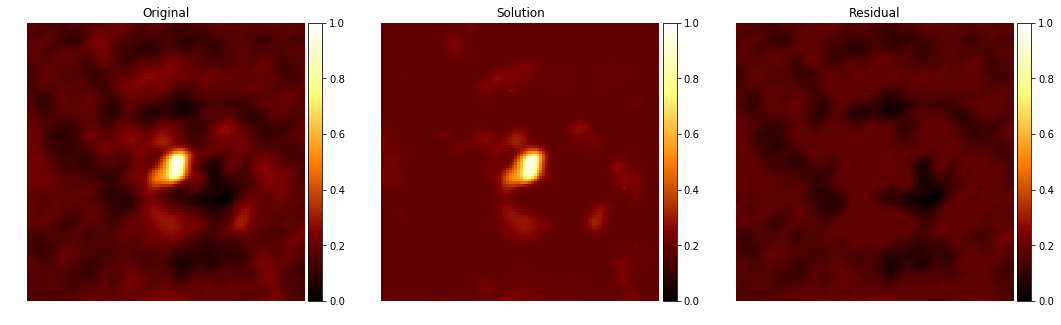

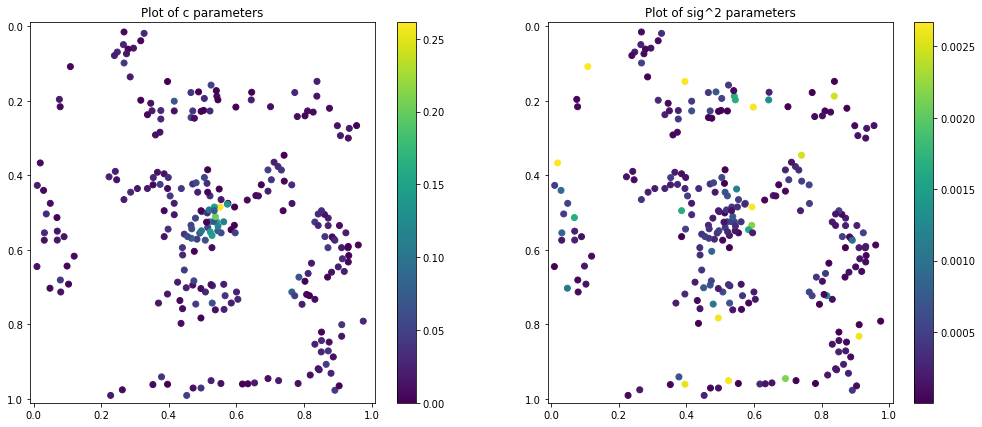

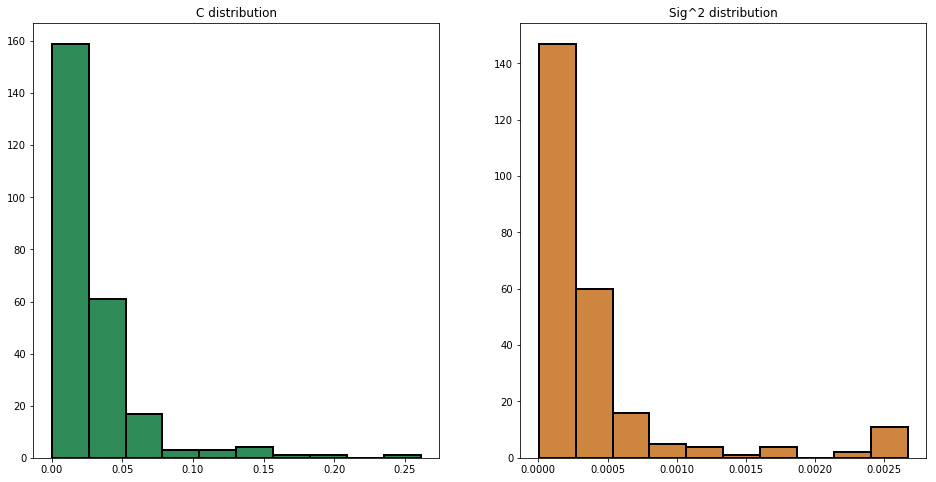

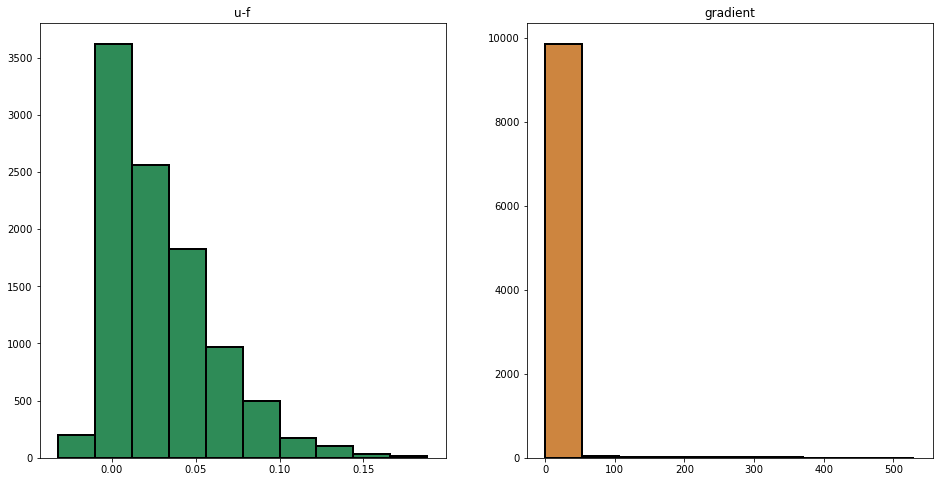

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110112

Residual stats:
Residual RMS: 0.005566252118484697
Residual Variance: 3.070401012410017e-05
Flux Lost: 0.008849667143301005
Flux Addition: 0.006598573719210993
psi1(u-f): 0.0039112984835408485
Exceeded Pixels: 1392
Sharpness: 53.86268651238371
psi2(grad u): 2.777028583642256
Total elapsed time: 295.4065206050873 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.17520898998337145
Mean min distance between collocation and cent

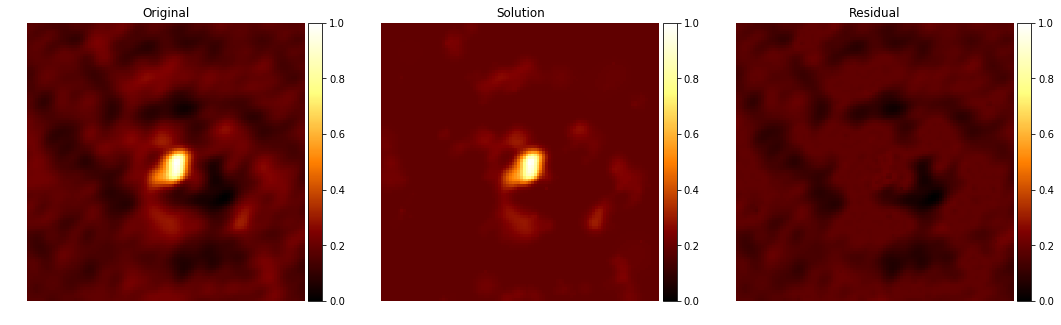

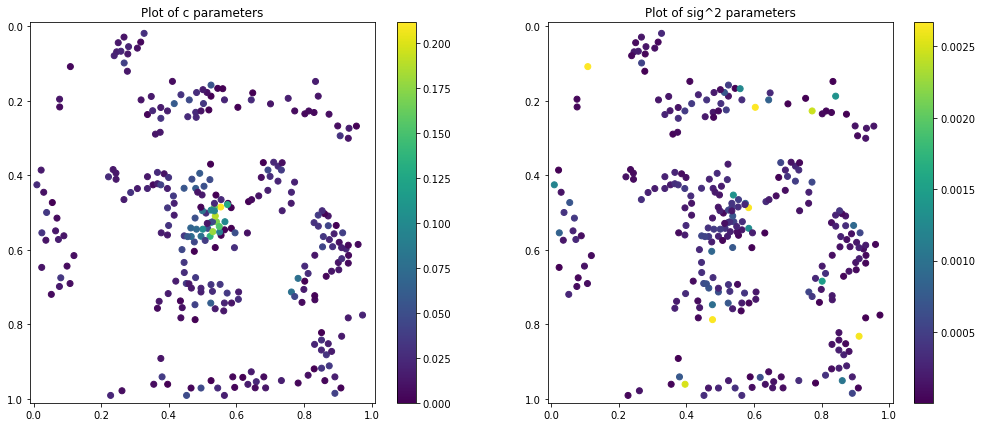

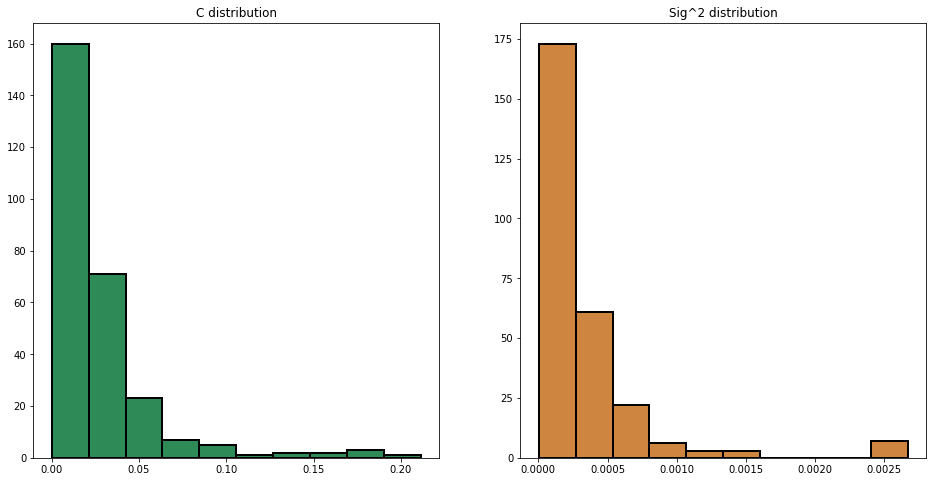

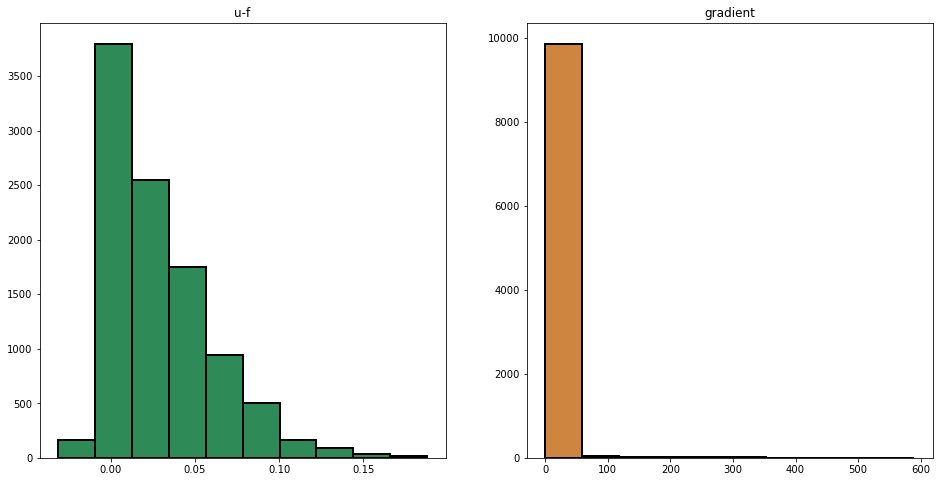

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.0050152348150740425
Residual Variance: 2.5023278347129495e-05
Flux Lost: 0.007800336919668355
Flux Addition: 0.006268278945143223
psi1(u-f): 0.004079986904849633
Exceeded Pixels: 1388
Sharpness: 54.490695690020445
psi2(grad u): 2.773805208332053
Total elapsed time: 383.44775557518005 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.17262688671630763
Mean min distance between collocation and c

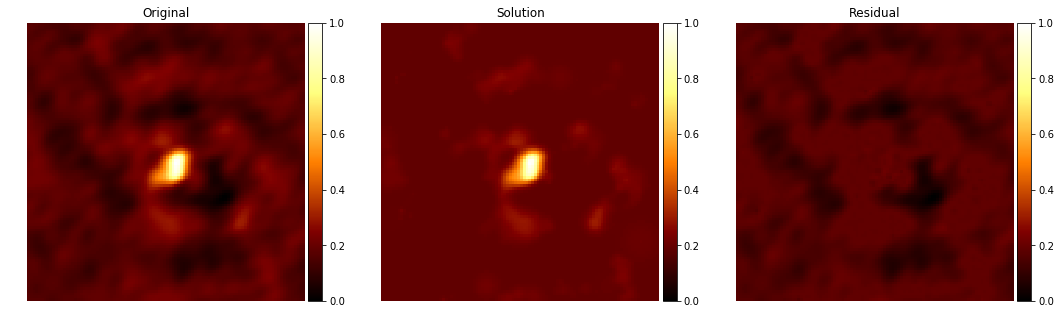

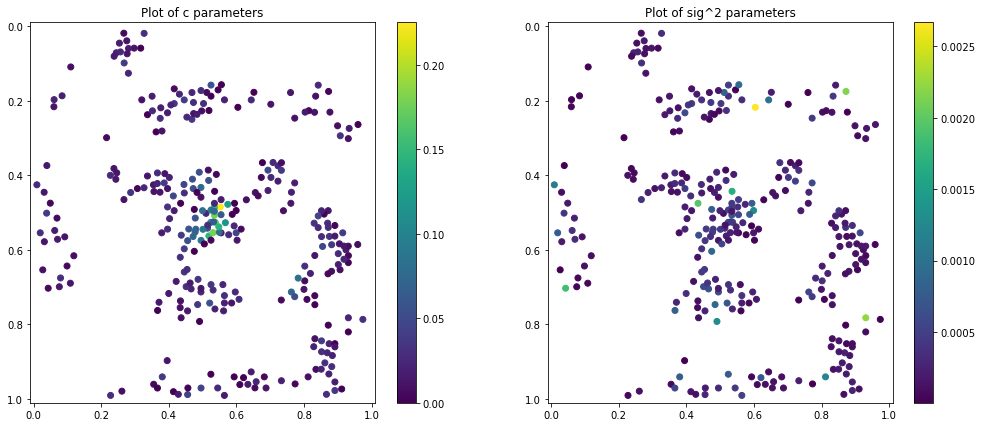

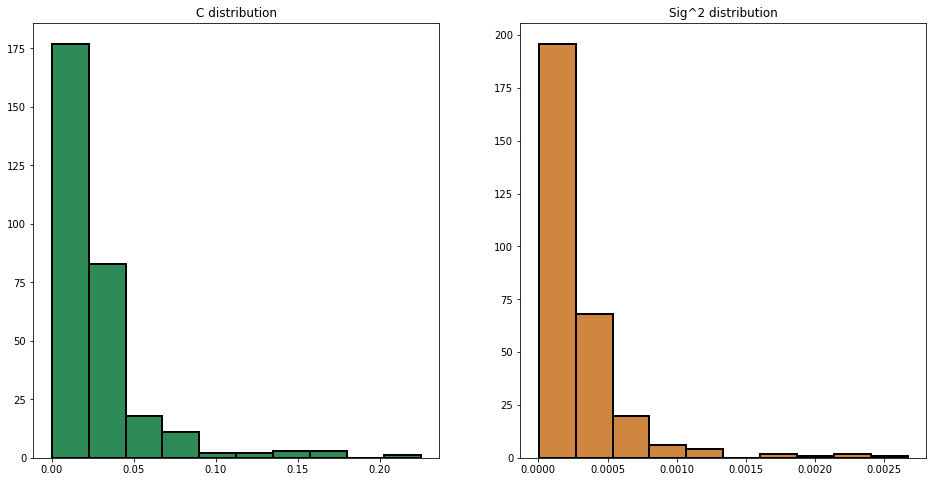

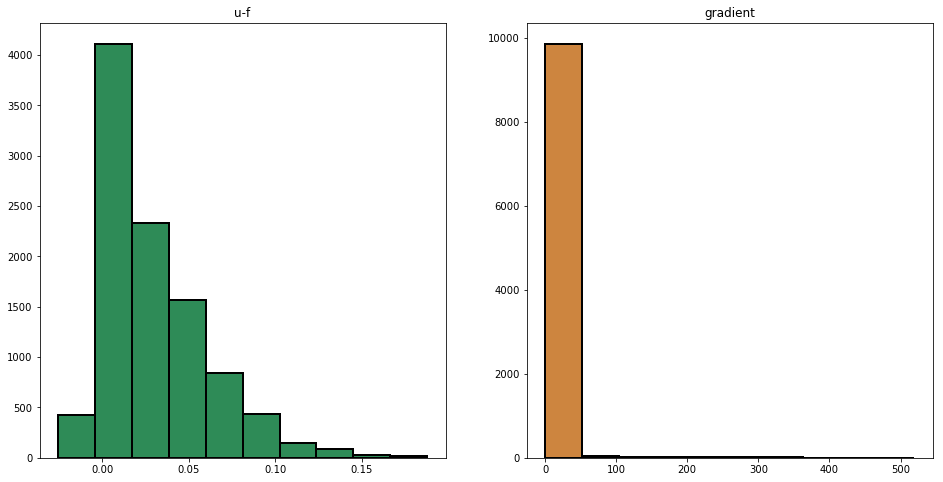

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130113

Residual stats:
Residual RMS: 0.004684850856442464
Residual Variance: 2.185084792299208e-05
Flux Lost: 0.007137796393765623
Flux Addition: 0.00581097339969821
psi1(u-f): 0.0035602273049343963
Exceeded Pixels: 1372
Sharpness: 54.59309419530715
psi2(grad u): 2.756567051619385
Total elapsed time: 476.5061492919922 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1604912552061779
Mean min distance between collocation and center

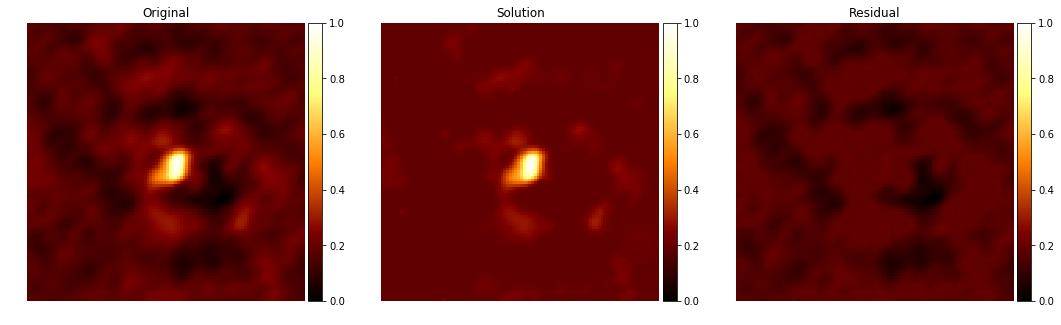

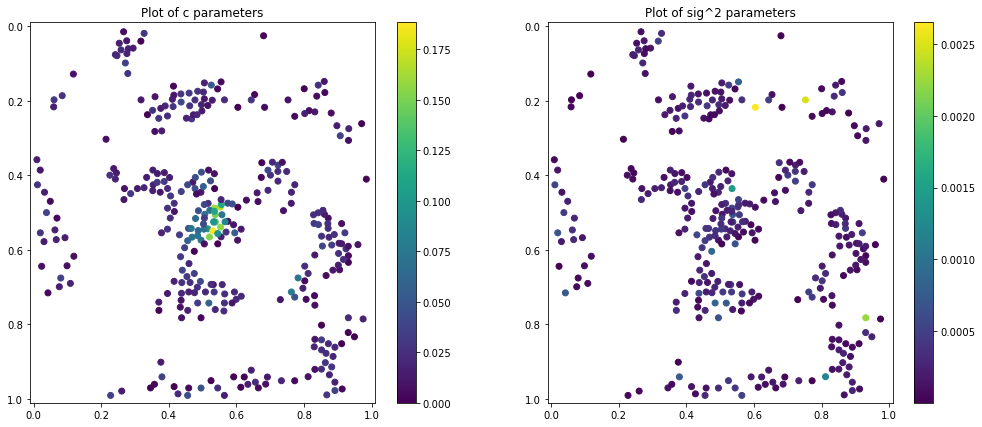

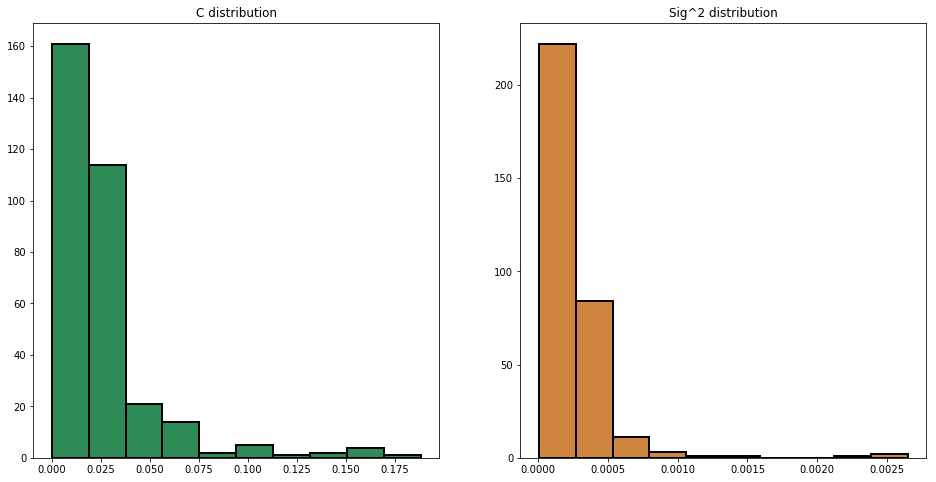

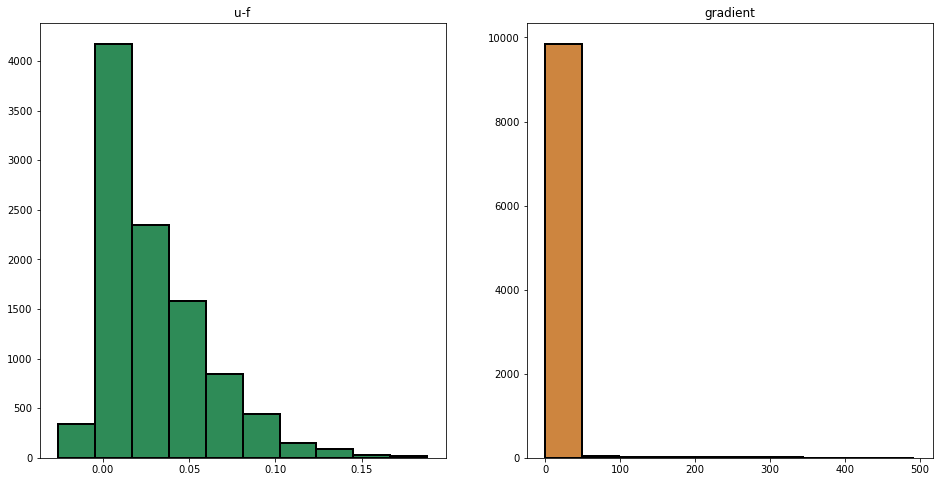

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140110

Residual stats:
Residual RMS: 0.0043428117551161305
Residual Variance: 1.880718545192837e-05
Flux Lost: 0.006515299300701075
Flux Addition: 0.0055360194169552
psi1(u-f): 0.0030664360172316368
Exceeded Pixels: 1408
Sharpness: 54.81983267458368
psi2(grad u): 2.7643119358634594
Total elapsed time: 603.6357238292694 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.15622149089691414
Mean min distance between collocation and cent

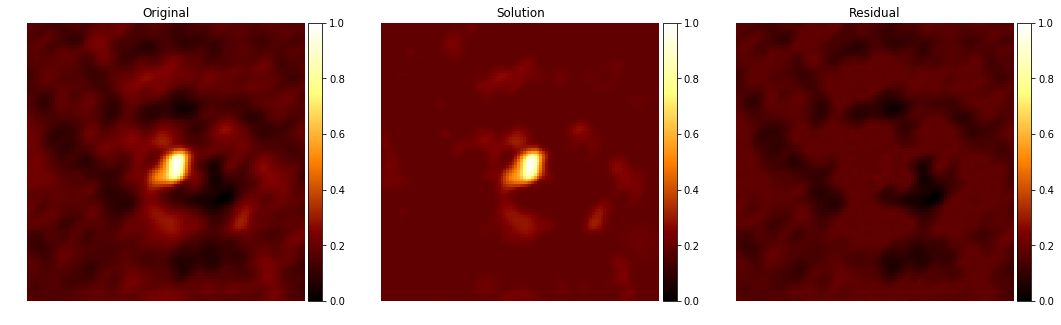

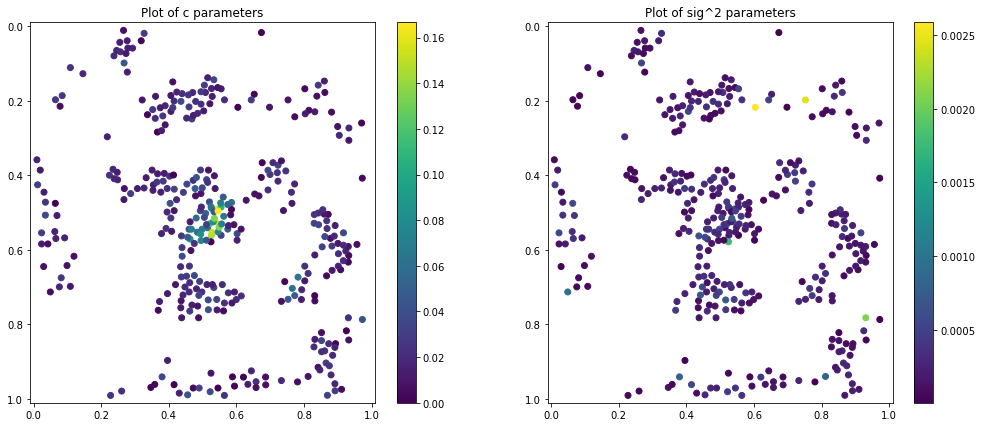

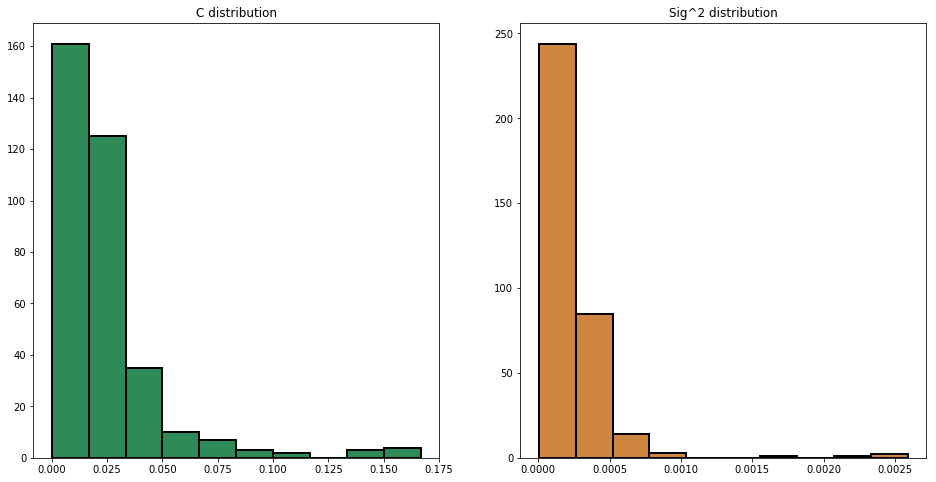

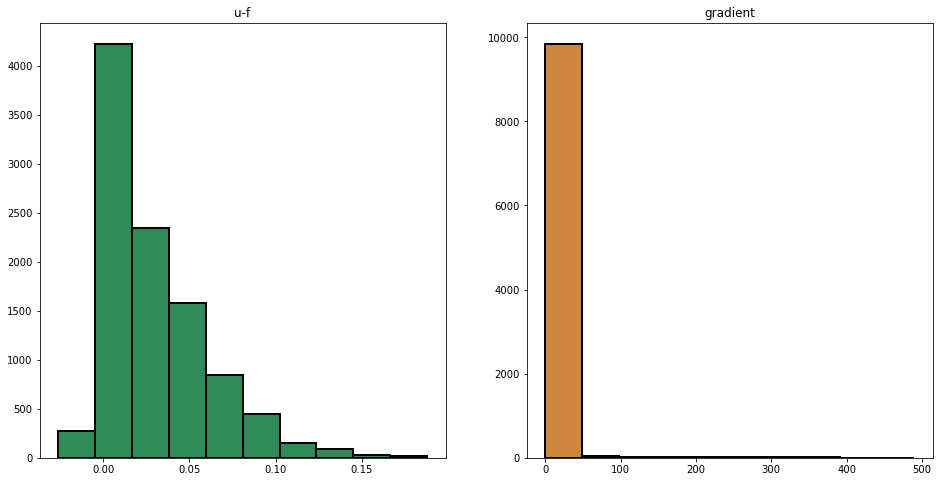

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150113

Residual stats:
Residual RMS: 0.004009090693675373
Residual Variance: 1.6053412540987554e-05
Flux Lost: 0.005819621229047512
Flux Addition: 0.005226252164442139
psi1(u-f): 0.002654580152019052
Exceeded Pixels: 1427
Sharpness: 54.886027538889316
psi2(grad u): 2.7837819332753044
Total elapsed time: 773.2469608783722 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.15518342625266277
Mean min distance between collocation and ce

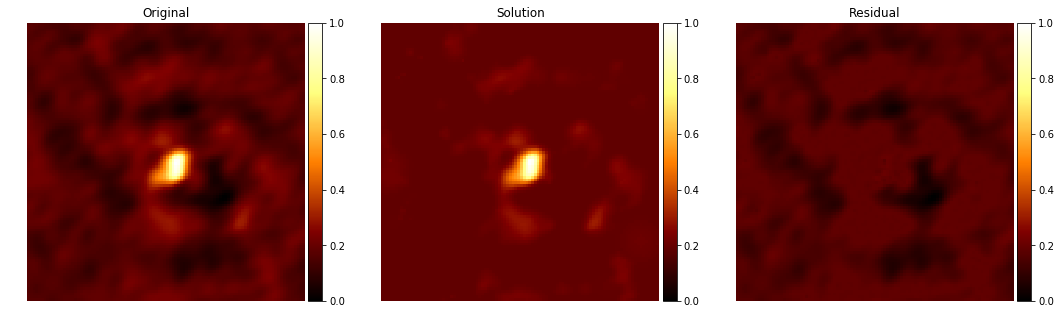

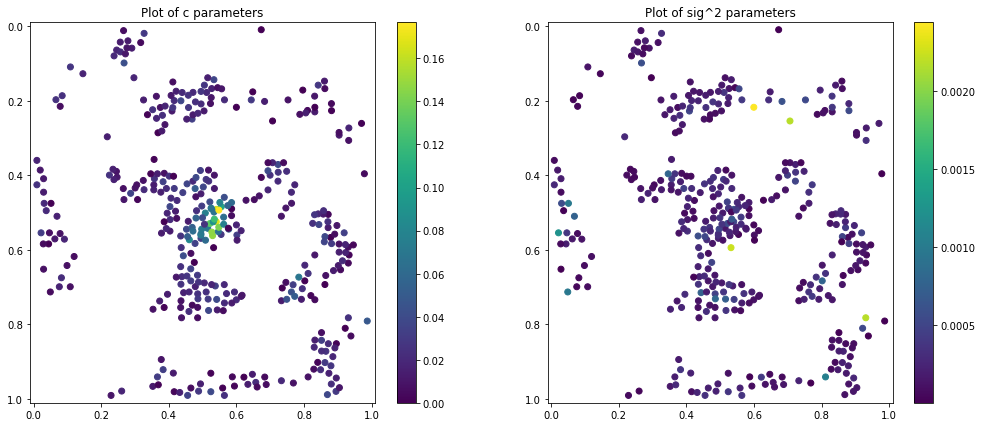

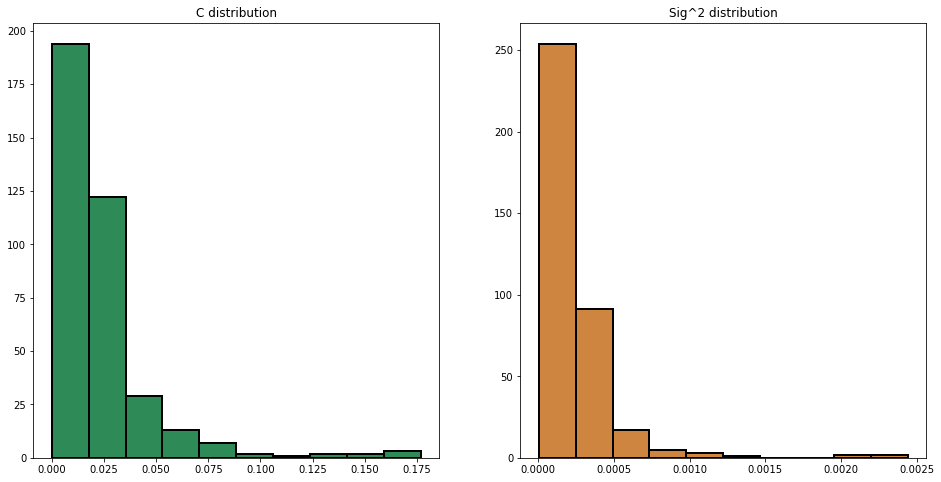

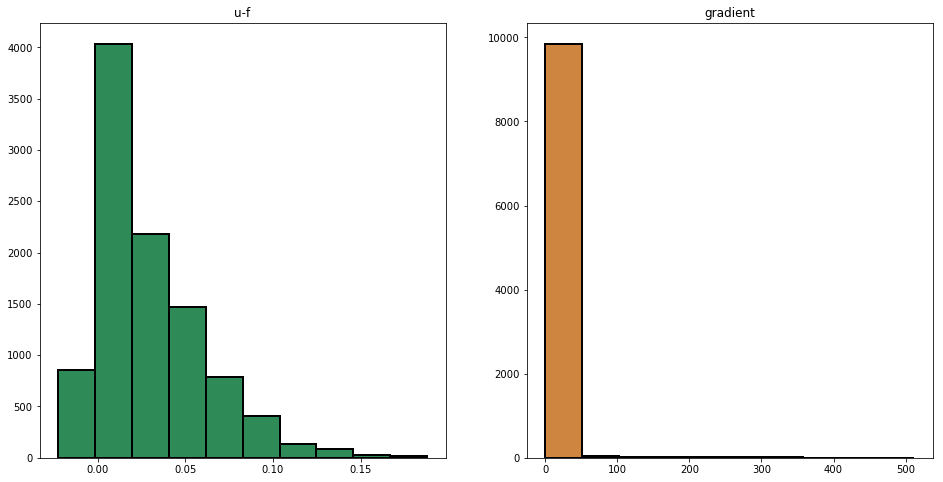

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160114

Residual stats:
Residual RMS: 0.0035828541872812043
Residual Variance: 1.275507533558965e-05
Flux Lost: 0.005537049552181326
Flux Addition: 0.0043187150836267695
psi1(u-f): 0.0019313010573598227
Exceeded Pixels: 1354
Sharpness: 54.79265133225532
psi2(grad u): 2.7580840851631834
Total elapsed time: 946.1674613952637 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.13465640252806826
Mean min distance between collocation and c

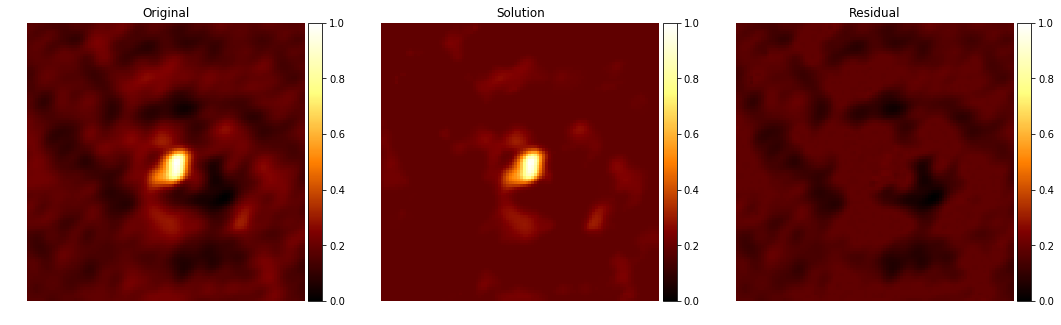

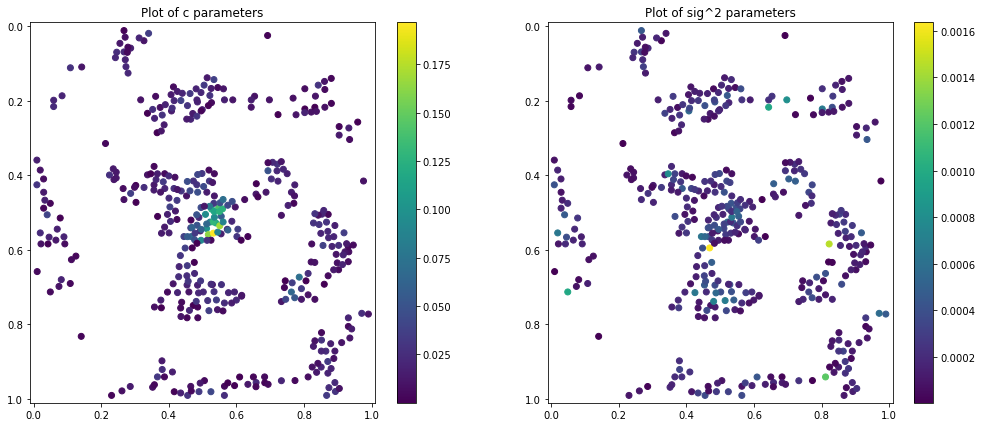

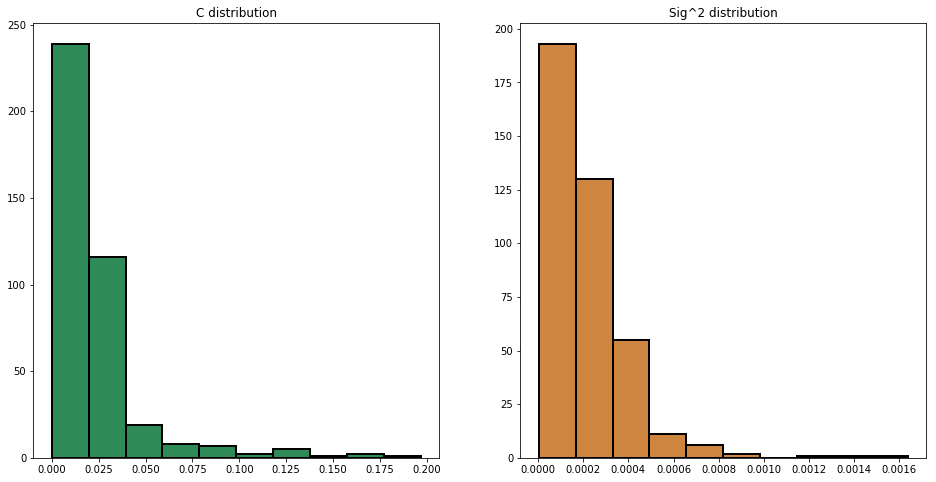

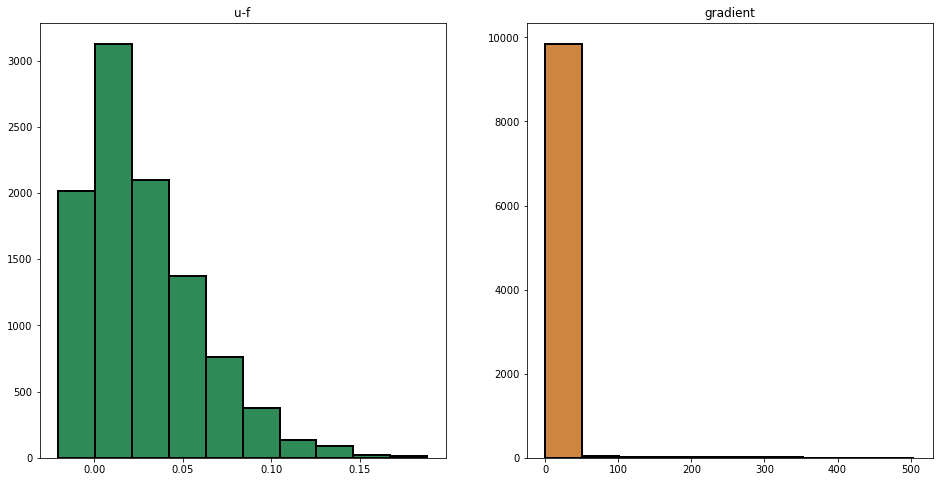

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170116

Residual stats:
Residual RMS: 0.0035745326413088056
Residual Variance: 1.2747483415300938e-05
Flux Lost: 0.005164333841489288
Flux Addition: 0.004428834570637631
psi1(u-f): 0.0027069351829072793
Exceeded Pixels: 1344
Sharpness: 56.168598679981066
psi2(grad u): 2.7669386442117827
Total elapsed time: 1161.8597705364227 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1349784874222034
Mean min distance between collocation and 

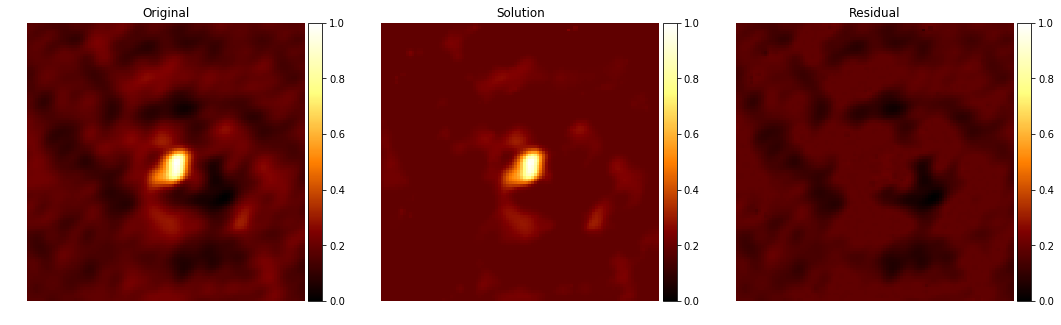

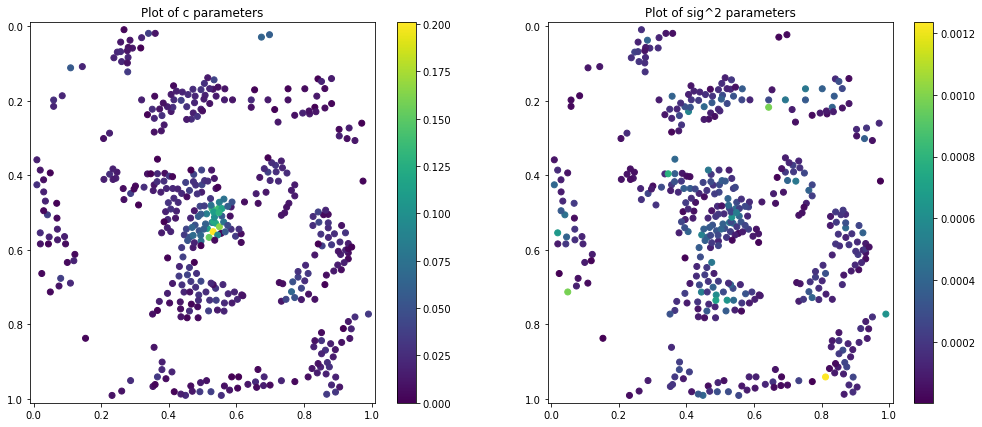

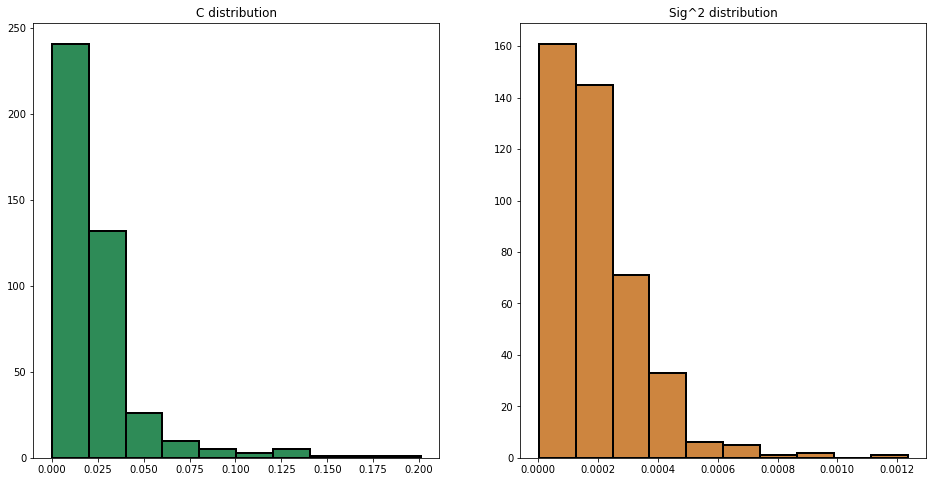

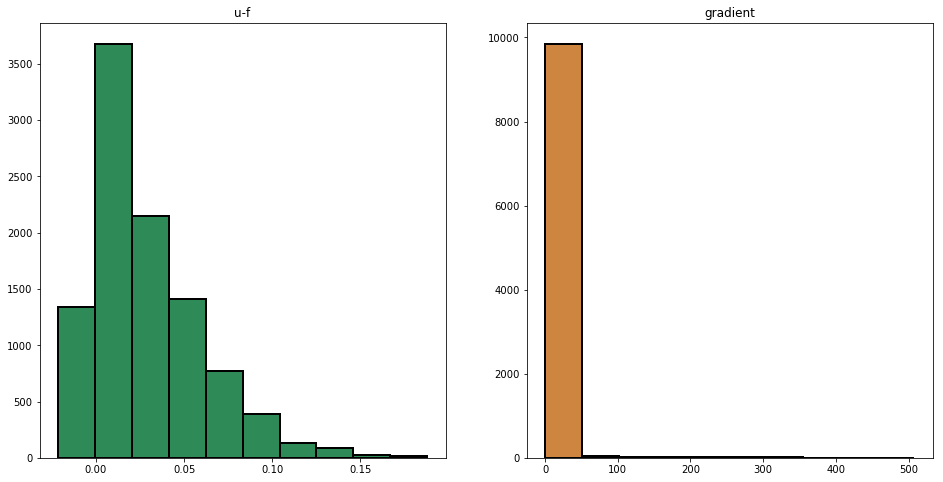

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180113

Residual stats:
Residual RMS: 0.003318913104905254
Residual Variance: 1.0956752484832527e-05
Flux Lost: 0.004813037185252131
Flux Addition: 0.003783132460393354
psi1(u-f): 0.0023829433611825216
Exceeded Pixels: 1305
Sharpness: 55.6635377813182
psi2(grad u): 2.7636442229933045
Total elapsed time: 1353.830293416977 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.13492146370914762
Mean min distance between collocation and cen

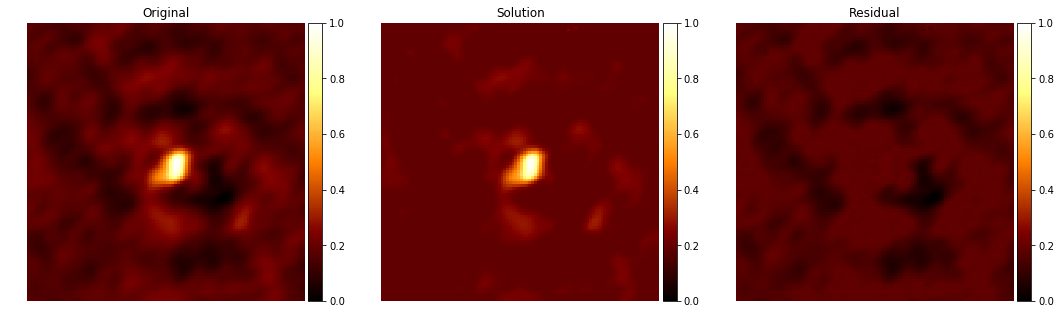

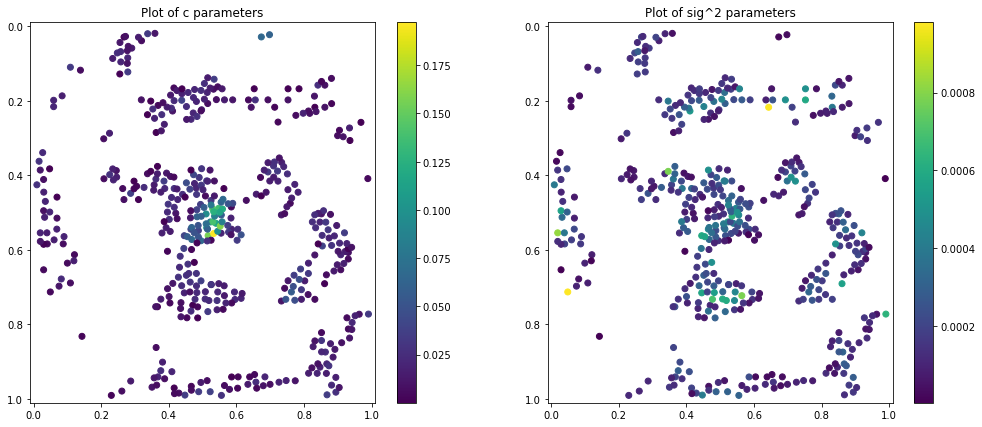

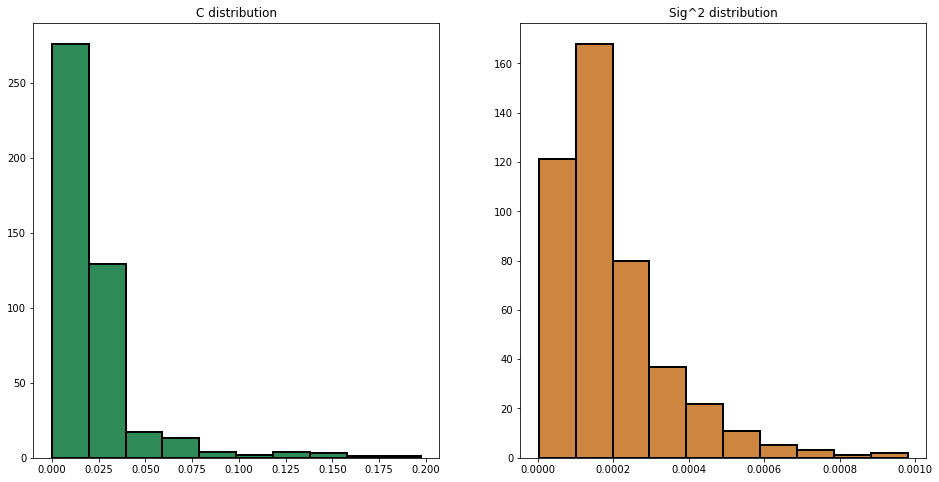

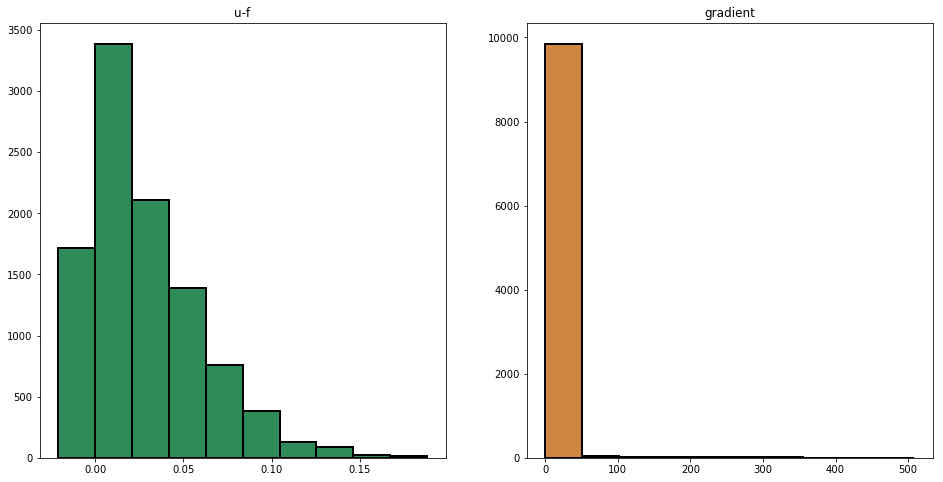

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190112

Residual stats:
Residual RMS: 0.0032418609631949314
Residual Variance: 1.0478527746649452e-05
Flux Lost: 0.004518109641799446
Flux Addition: 0.003766321469913682
psi1(u-f): 0.002702629288245614
Exceeded Pixels: 1329
Sharpness: 56.02270539978777
psi2(grad u): 2.7650424868476358
Total elapsed time: 1535.1810014247894 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.10835752935699018
Mean min distance between collocation and c

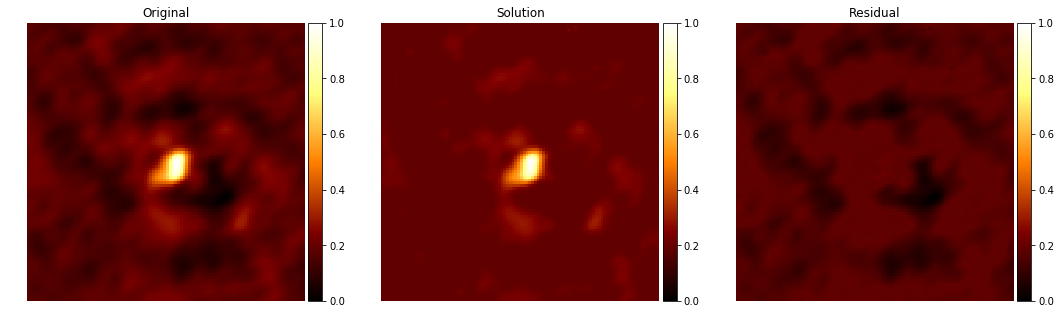

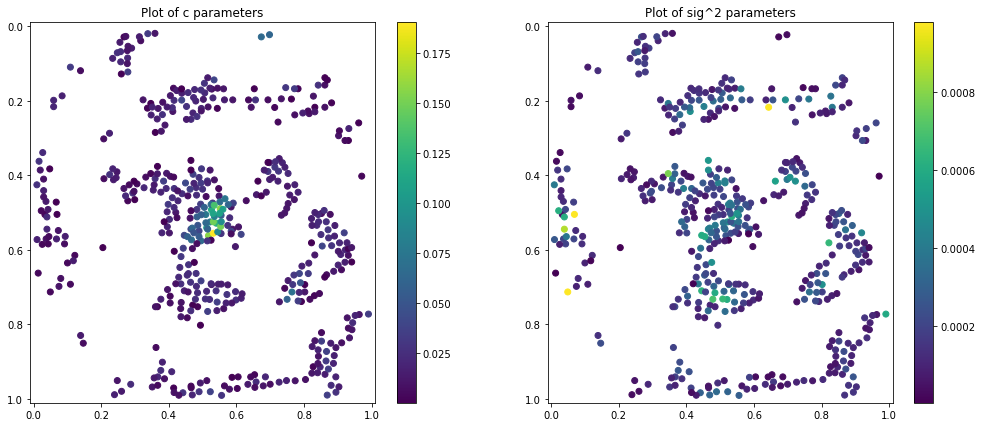

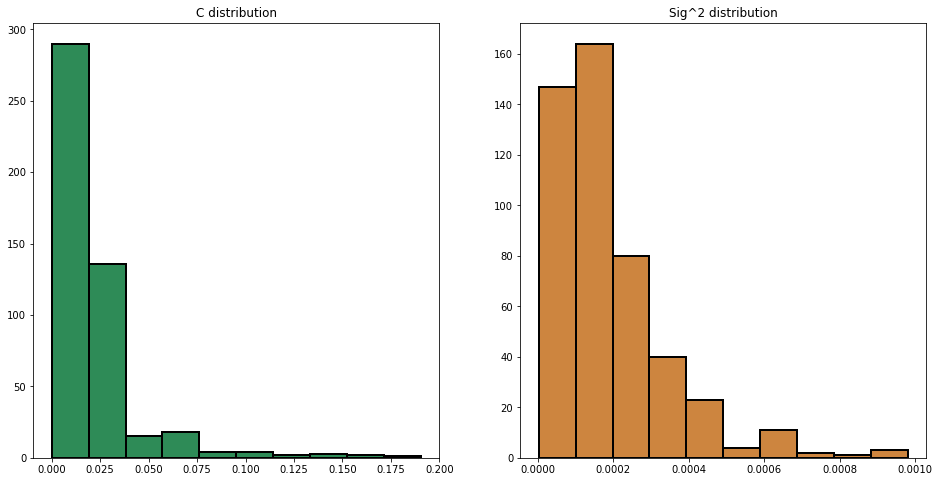

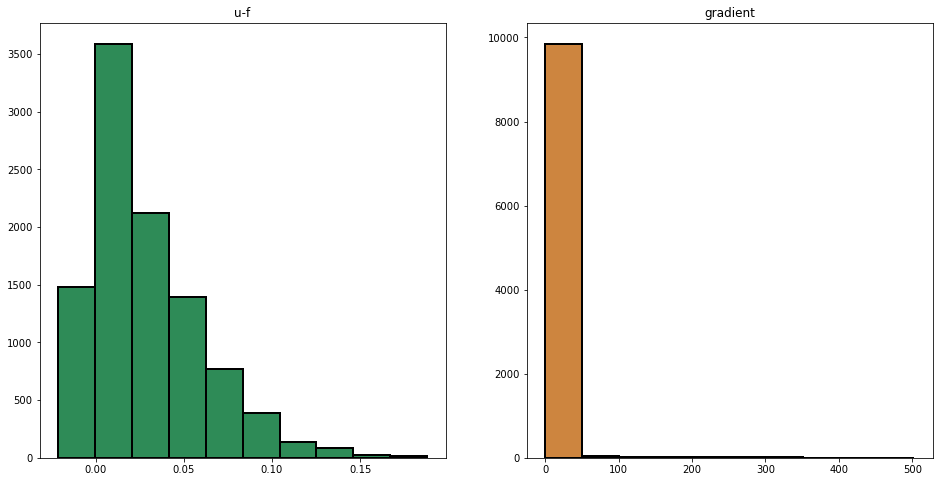

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200112

Residual stats:
Residual RMS: 0.0031517420496252275
Residual Variance: 9.899771795109957e-06
Flux Lost: 0.004381240914744463
Flux Addition: 0.0035990237707418543
psi1(u-f): 0.0024448836467816006
Exceeded Pixels: 1280
Sharpness: 56.20098732111952
psi2(grad u): 2.780074012986578
Total elapsed time: 1730.147587299347 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.10674931644897122
Mean min distance between collocation and ce

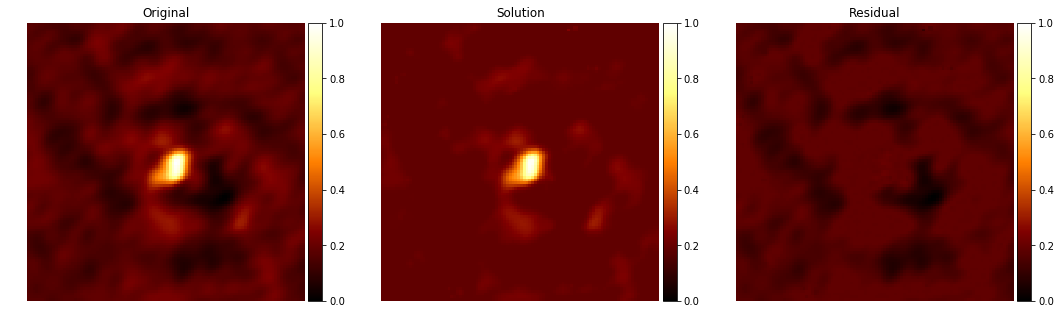

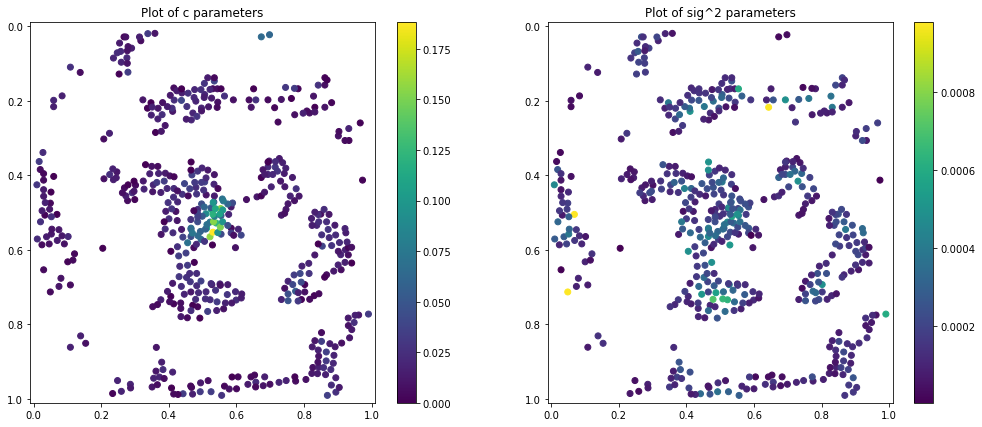

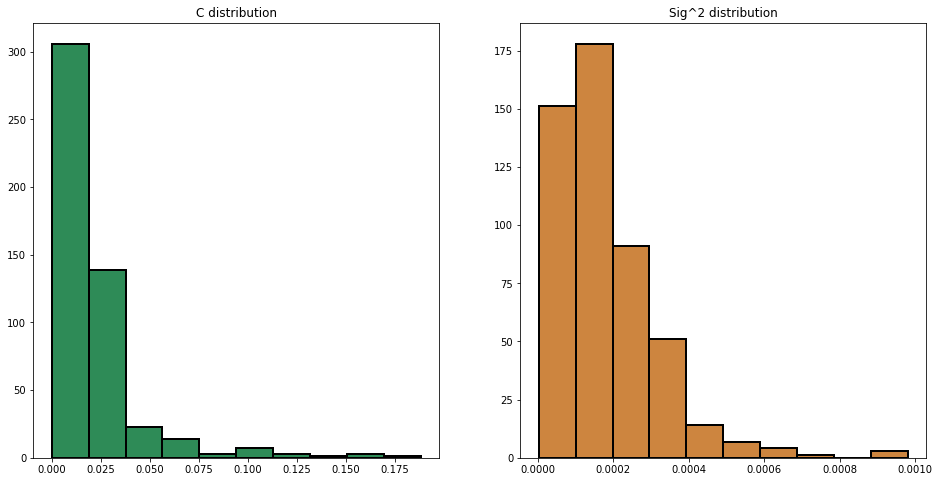

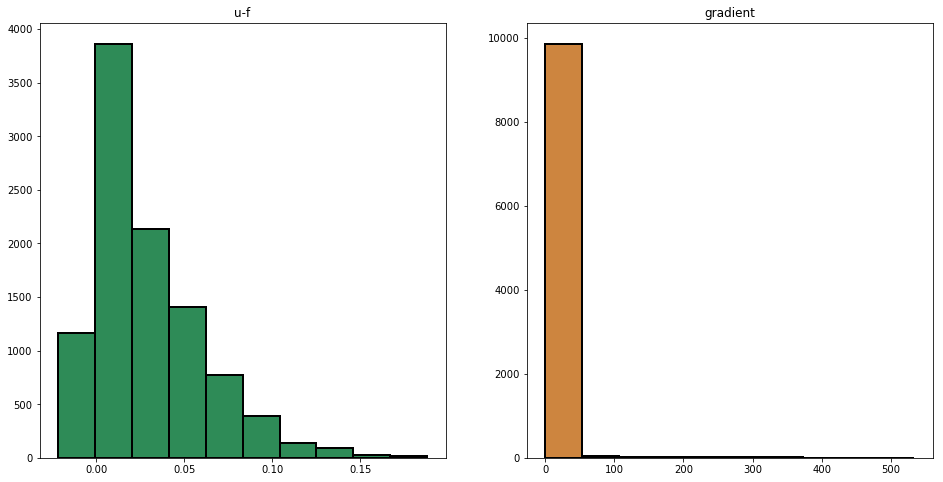

In [5]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    #del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("../results/exp01_m{0}_ngc3265.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

In [6]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 2
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20112

Residual stats:
Residual RMS: 0.06195867118302248
Residual Variance: 0.0038255420439734255
Flux Lost: 0.06683046129003879
Flux Addition: 0.05127197029904306
psi1(u-f): 4.970476440082635
Exceeded Pixels: 1359
Sharpness: 34.762437988855076
psi2(grad u): 0.13401555043068808
Total elapsed time: 5.306636095046997 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.12651892904055748
Mean min distance between collocation and center poin

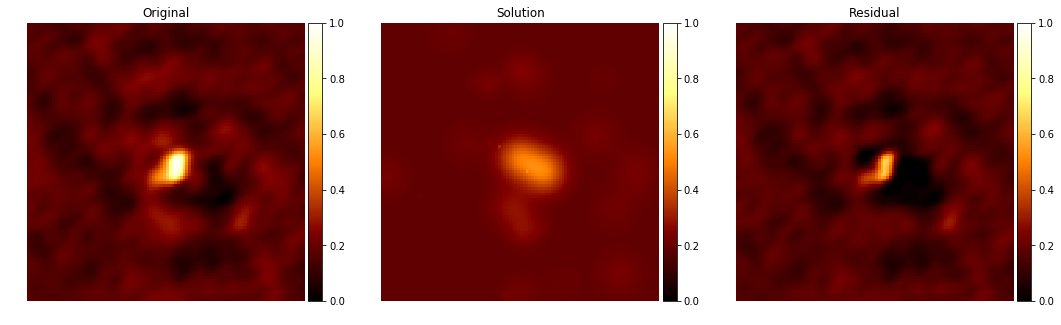

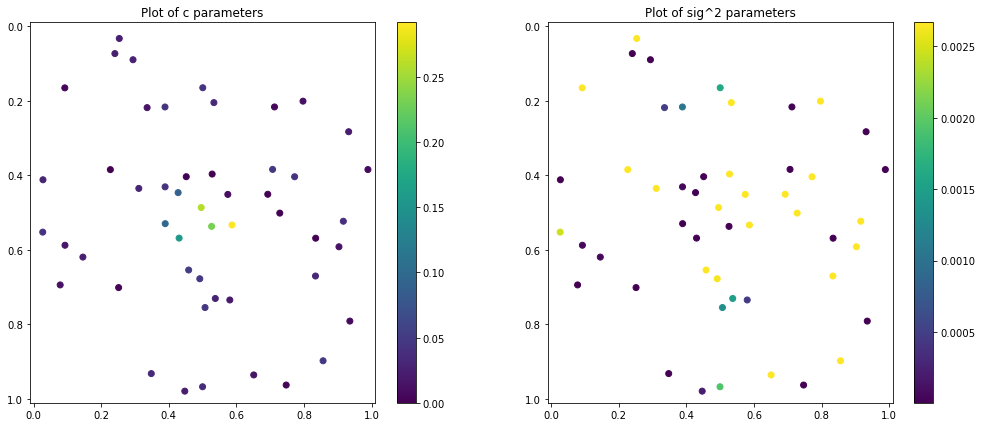

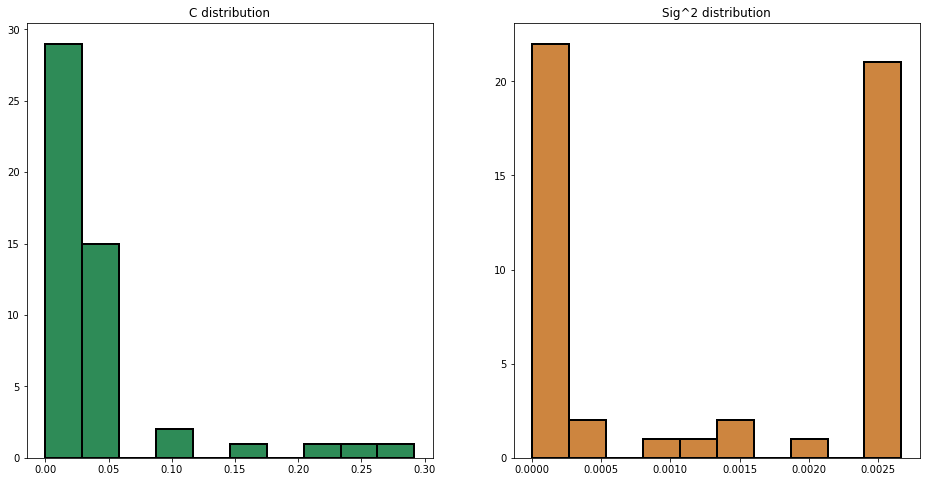

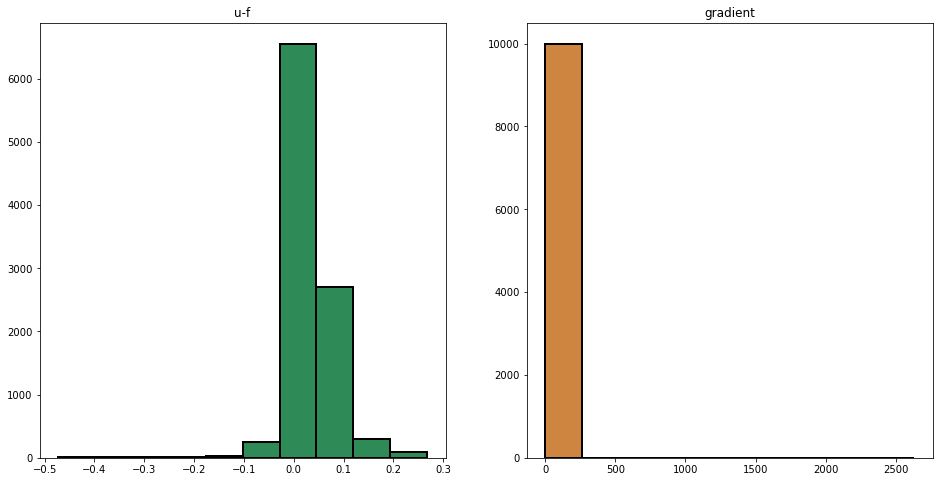

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30112

Residual stats:
Residual RMS: 0.027549343414694873
Residual Variance: 0.0007577384104088925
Flux Lost: 0.034938378660571666
Flux Addition: 0.030217135232943407
psi1(u-f): 1.0497361824499998
Exceeded Pixels: 1317
Sharpness: 45.03448134730955
psi2(grad u): 1.4457345224264135
Total elapsed time: 11.893758296966553 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.19351155434238634
Mean min distance between collocation and center p

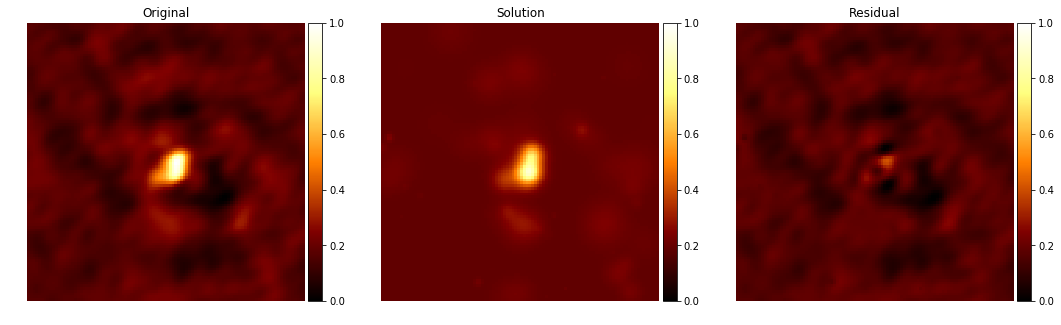

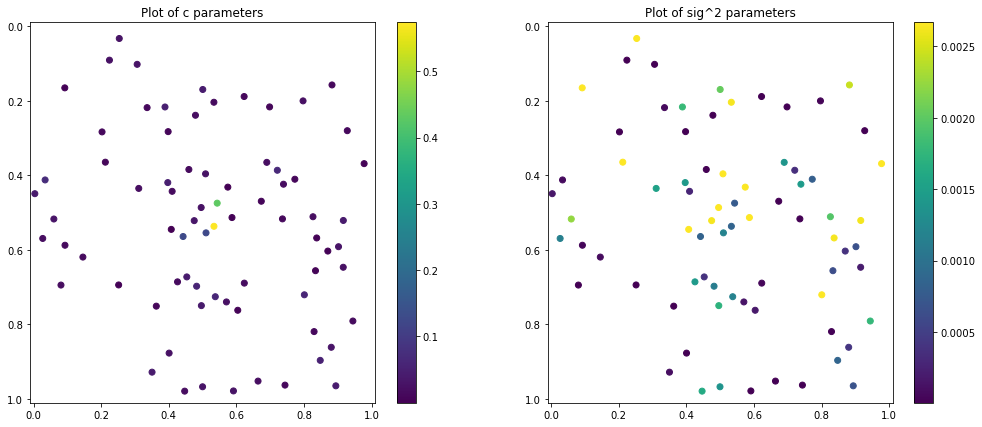

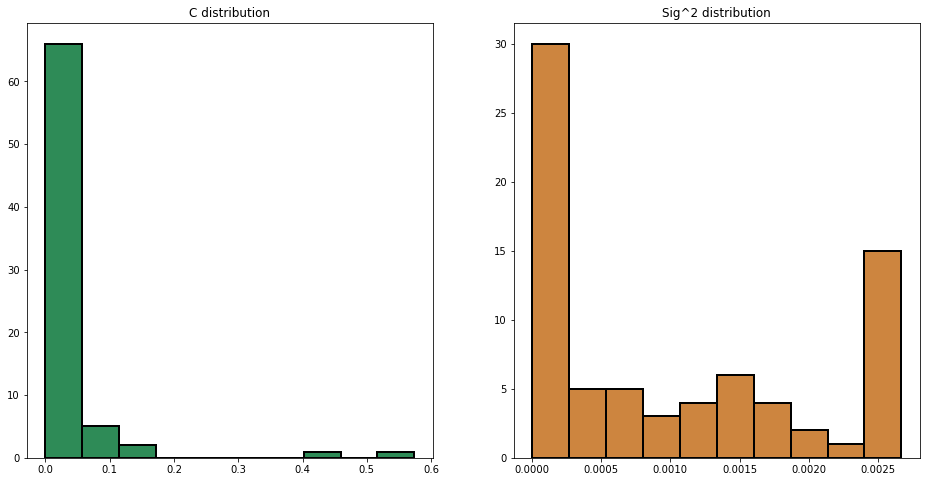

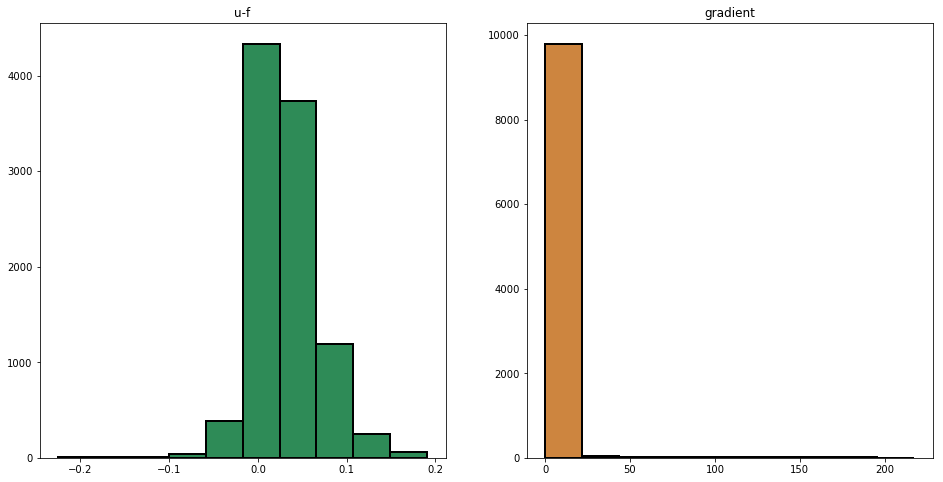

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40109

Residual stats:
Residual RMS: 0.025106879313719865
Residual Variance: 0.0006298255608557364
Flux Lost: 0.030125633180512822
Flux Addition: 0.027024358729469386
psi1(u-f): 0.6183262956457942
Exceeded Pixels: 1486
Sharpness: 46.40019749666632
psi2(grad u): 1.5280828691058927
Total elapsed time: 21.135988235473633 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.17201848832099628
Mean min distance between collocation and center 

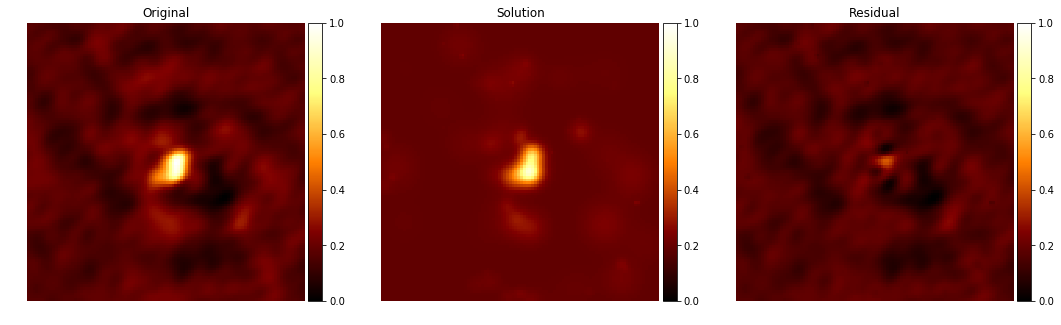

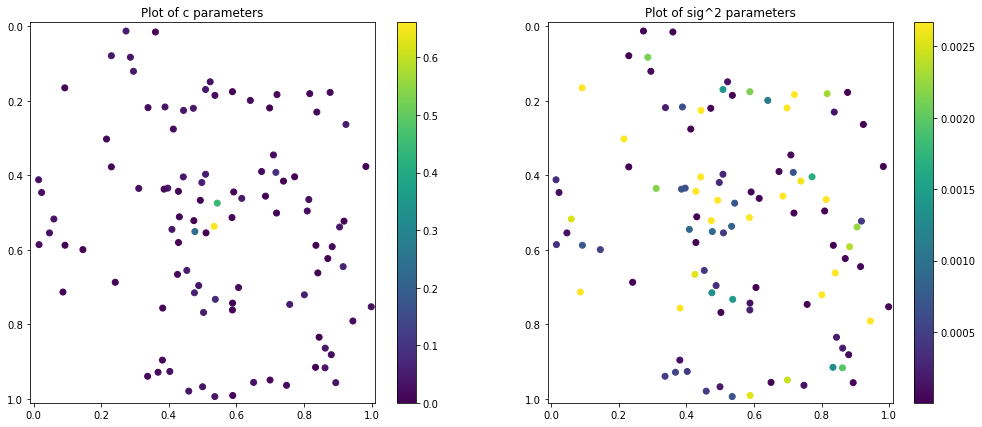

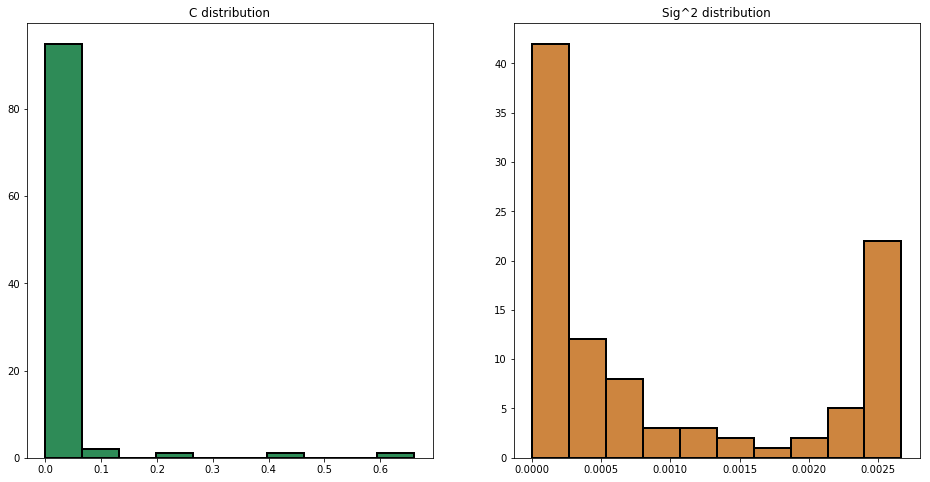

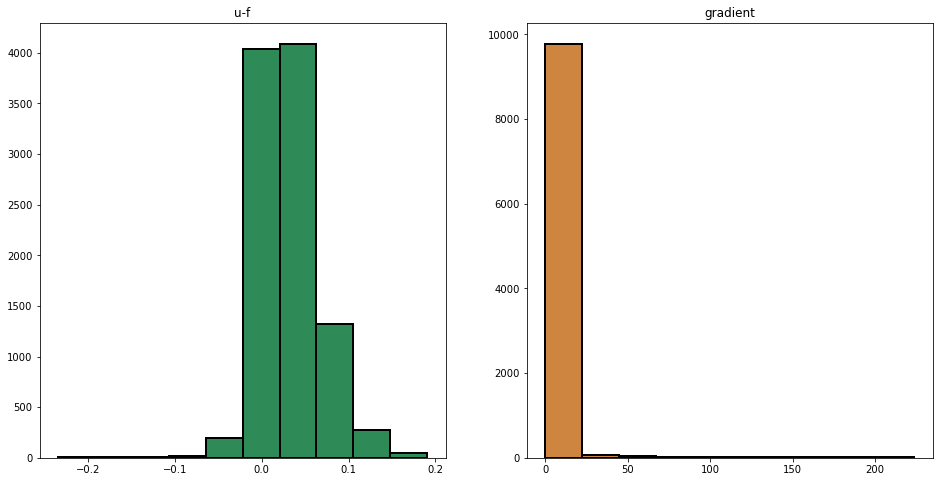

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50113

Residual stats:
Residual RMS: 0.03267963938955259
Residual Variance: 0.0010656873700362883
Flux Lost: 0.030233105240473877
Flux Addition: 0.03665444049234469
psi1(u-f): 1.4064221993247512
Exceeded Pixels: 1481
Sharpness: 46.6581157806752
psi2(grad u): 1.2802453387217463
Total elapsed time: 34.83919429779053 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1718209119198587
Mean min distance between collocation and center point

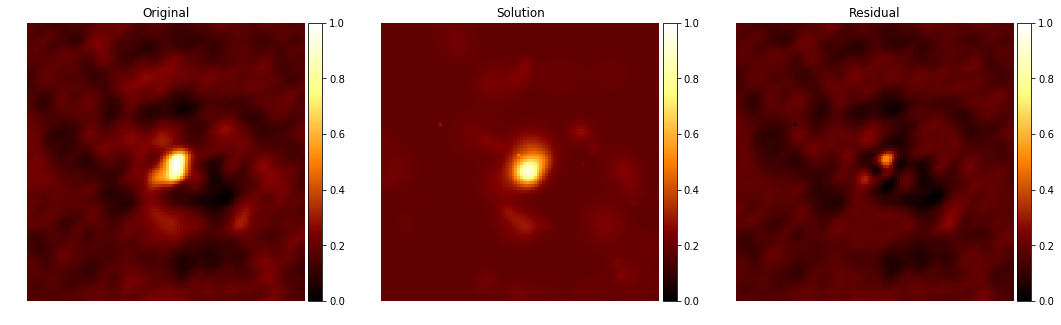

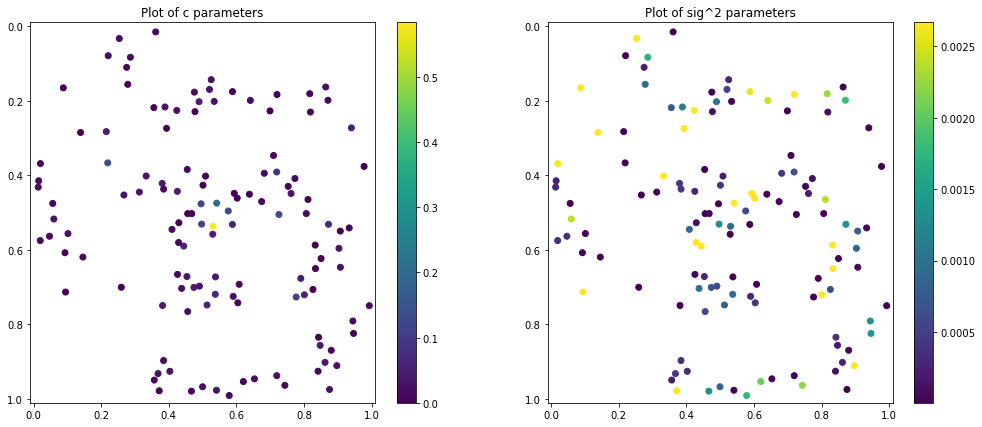

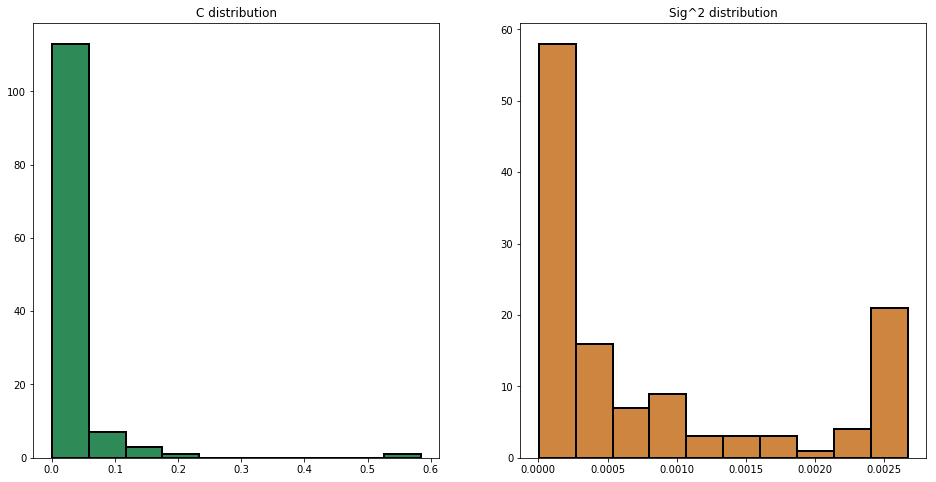

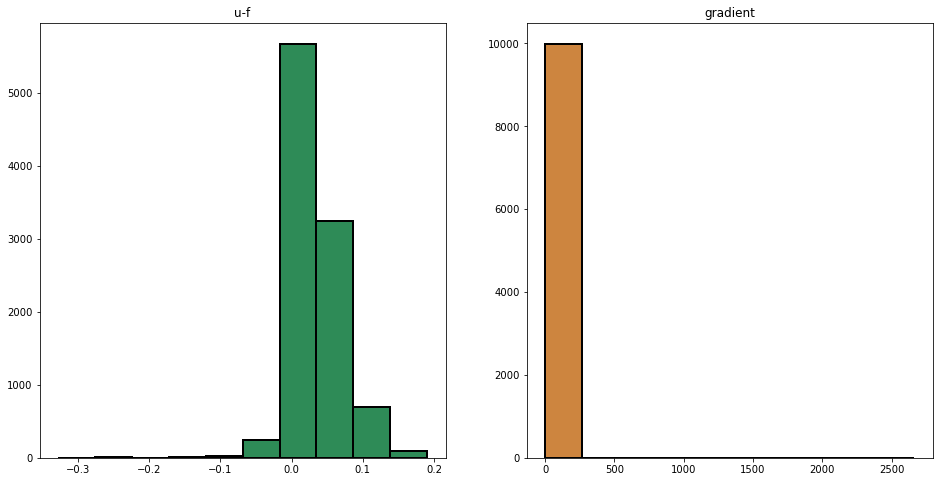

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60113

Residual stats:
Residual RMS: 0.014495397408186362
Residual Variance: 0.00021011087334856283
Flux Lost: 0.017517025574024642
Flux Addition: 0.017196127874247357
psi1(u-f): 0.1882034246983631
Exceeded Pixels: 1443
Sharpness: 51.633876116688285
psi2(grad u): 2.3354450326244436
Total elapsed time: 57.63725924491882 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.15493488693923216
Mean min distance between collocation and center

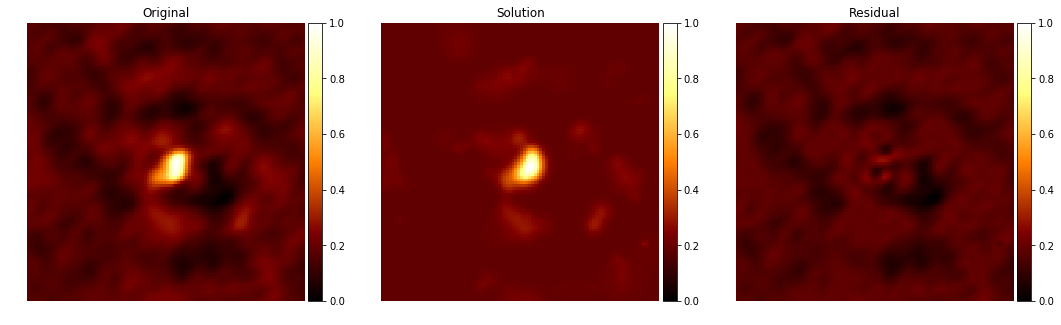

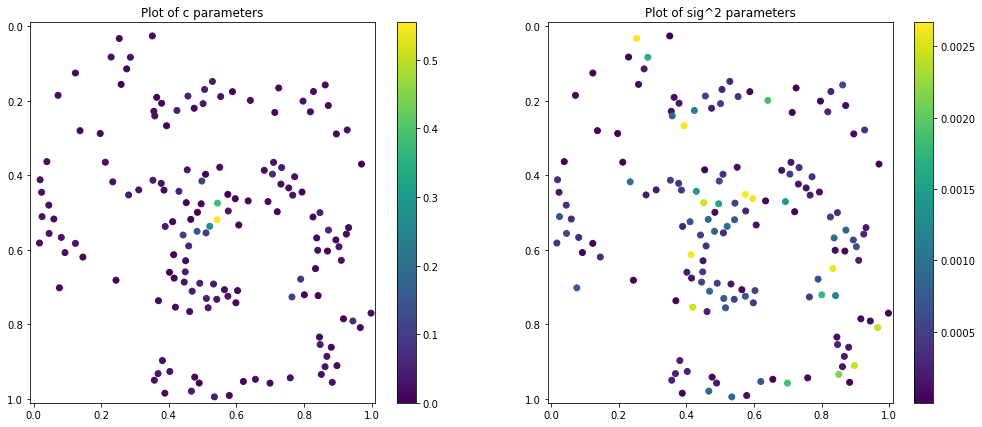

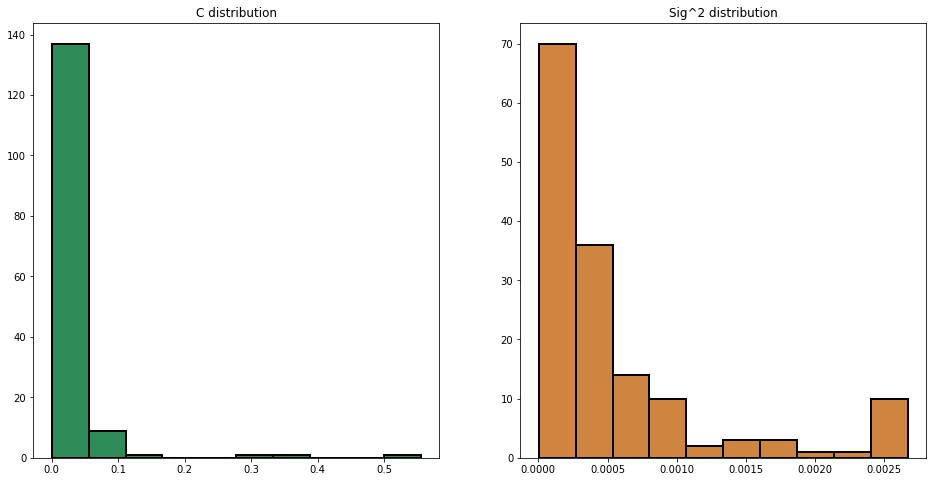

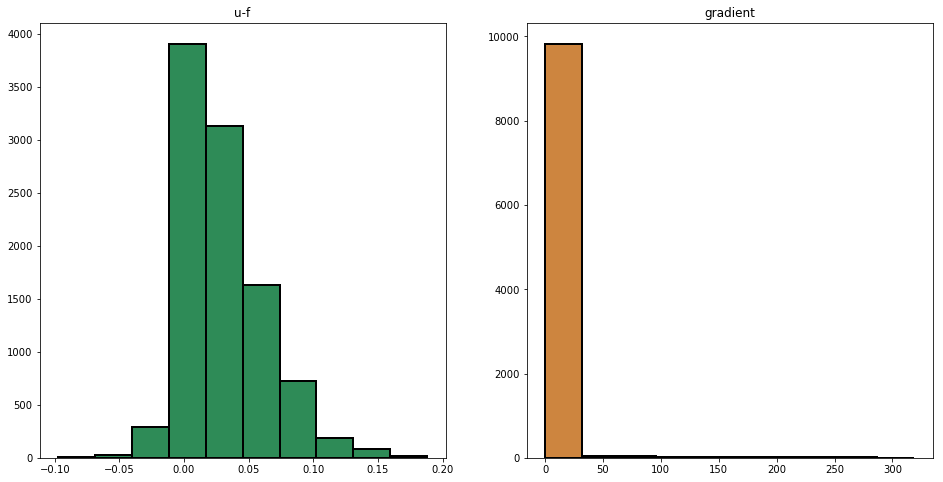

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70113

Residual stats:
Residual RMS: 0.010438064485358473
Residual Variance: 0.00010822506836850652
Flux Lost: 0.015080895498736832
Flux Addition: 0.011445306608498193
psi1(u-f): 0.037255841697816885
Exceeded Pixels: 1404
Sharpness: 53.518472410188195
psi2(grad u): 2.4862450034852643
Total elapsed time: 85.65416026115417 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.15733821336669457
Mean min distance between collocation and cent

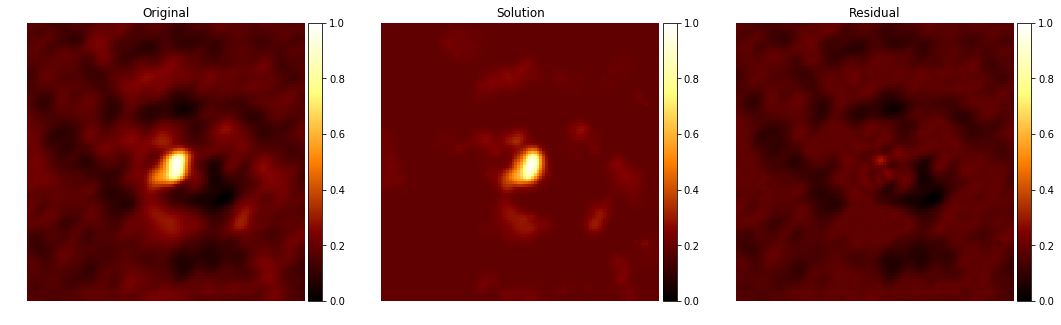

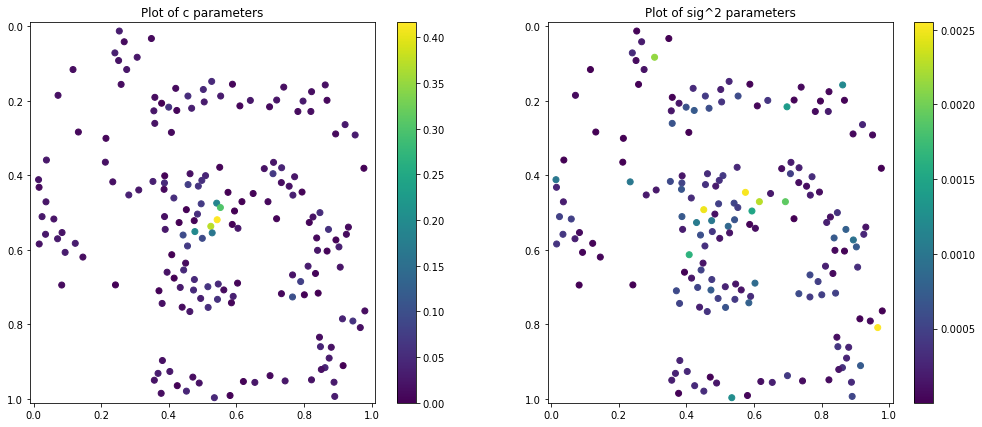

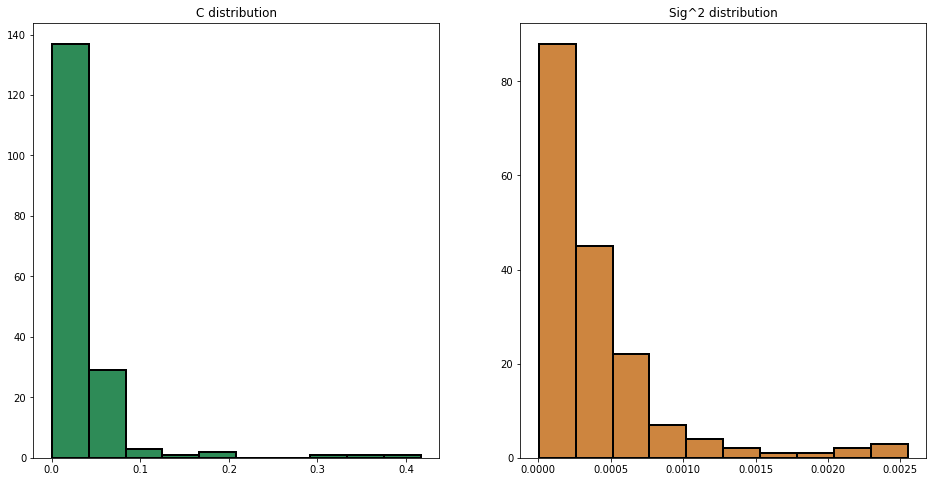

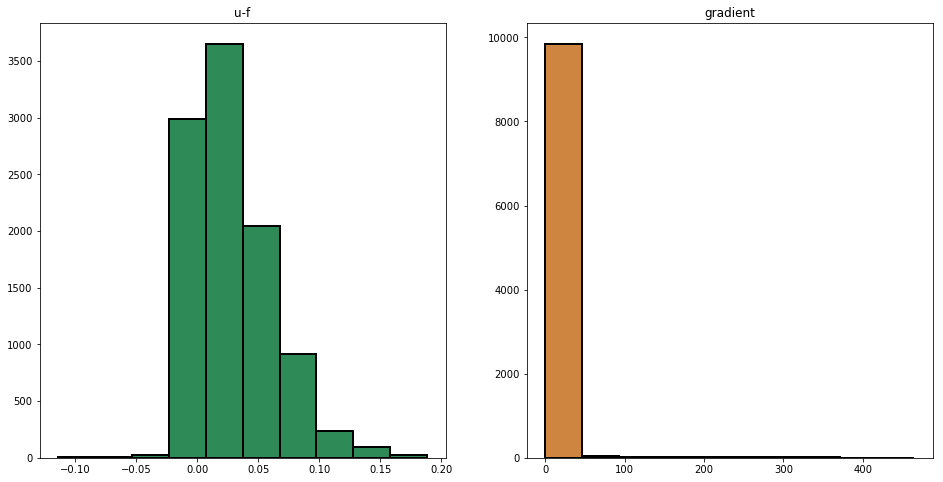

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80114

Residual stats:
Residual RMS: 0.007863389561634192
Residual Variance: 6.135994136315054e-05
Flux Lost: 0.012282422664092943
Flux Addition: 0.009352324242468967
psi1(u-f): 0.015401717748635718
Exceeded Pixels: 1399
Sharpness: 53.58548413191219
psi2(grad u): 2.7310180398638395
Total elapsed time: 123.98012113571167 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1582013690241047
Mean min distance between collocation and center

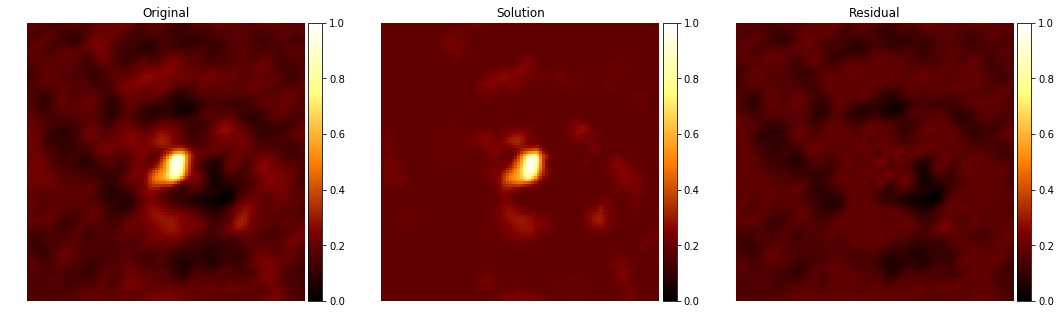

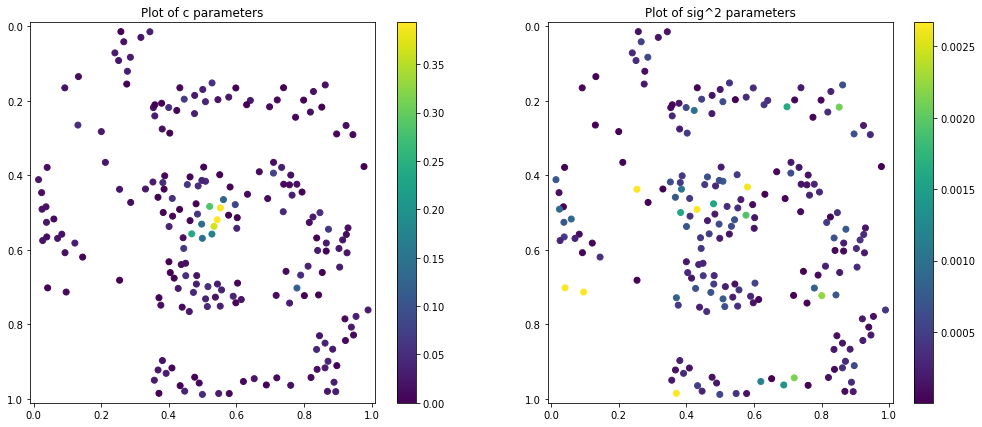

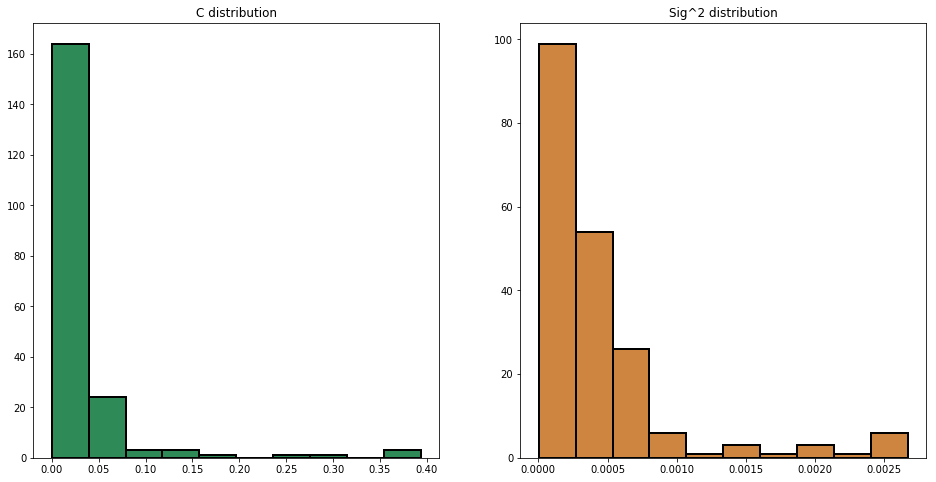

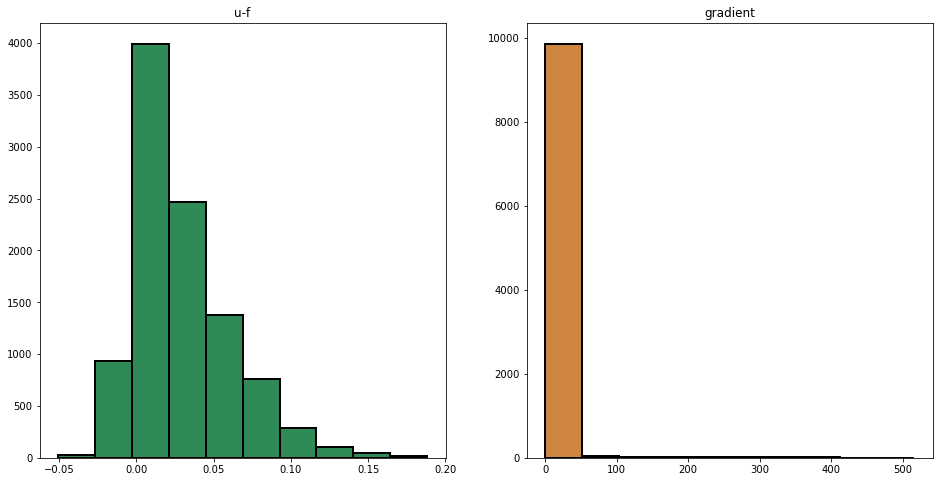

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90115

Residual stats:
Residual RMS: 0.0072821790229874
Residual Variance: 5.2715417539762855e-05
Flux Lost: 0.01052668597634291
Flux Addition: 0.008136505895300218
psi1(u-f): 0.015858177676350768
Exceeded Pixels: 1379
Sharpness: 53.286386310592306
psi2(grad u): 2.6534313088759975
Total elapsed time: 176.57273864746094 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.1499653045987657
Mean min distance between collocation and center 

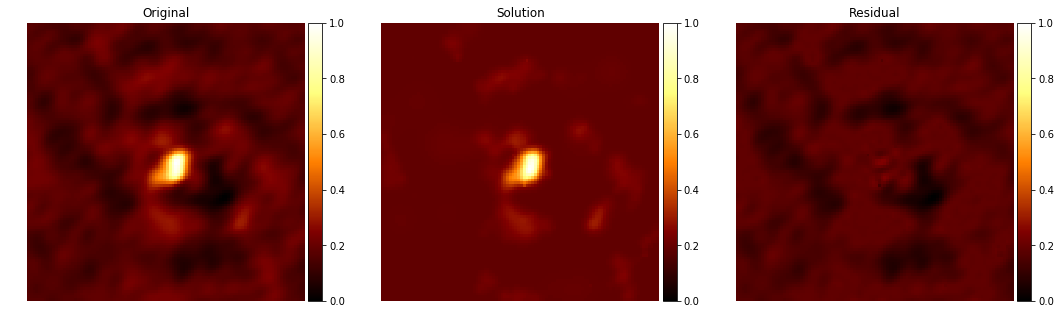

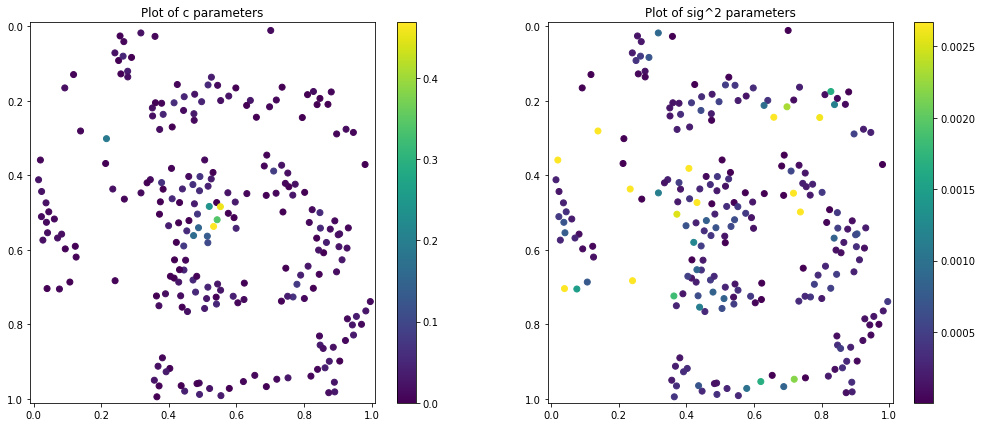

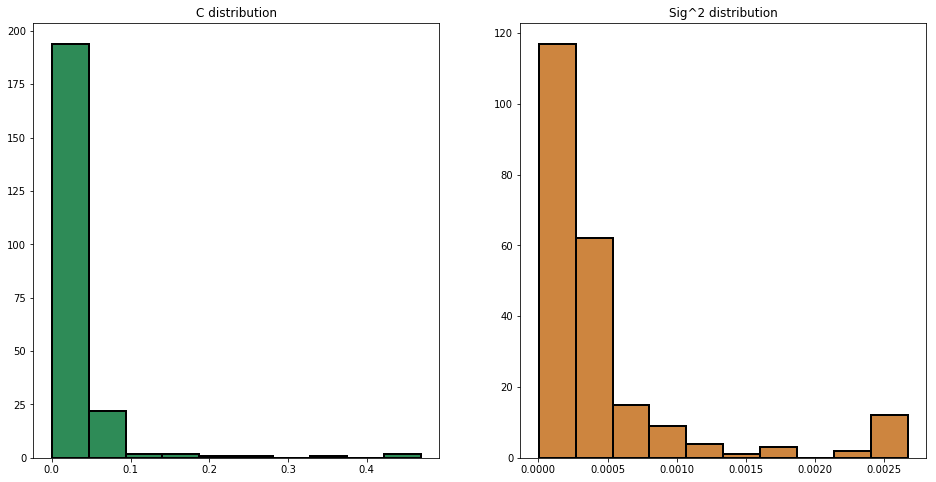

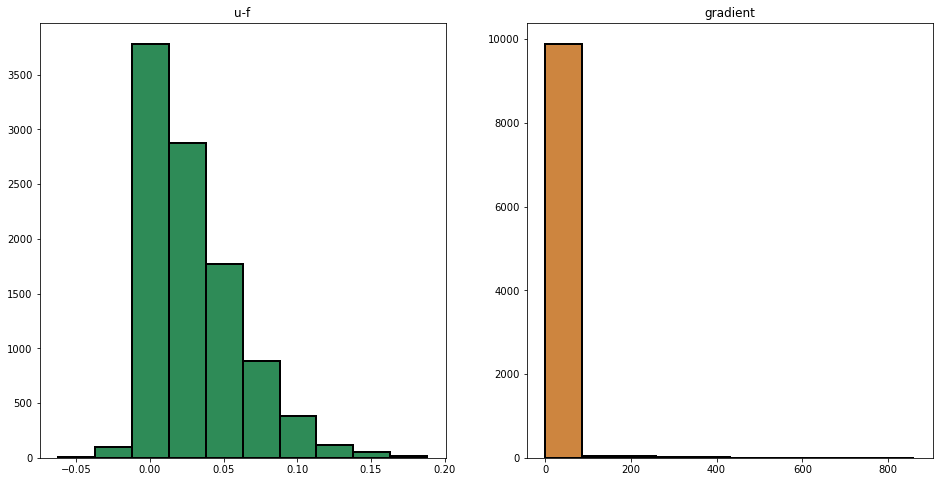

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.005359114569225491
Residual Variance: 2.8164249426298375e-05
Flux Lost: 0.009065550115241012
Flux Addition: 0.005889003208107314
psi1(u-f): 0.004636159420827192
Exceeded Pixels: 1327
Sharpness: 53.94114054187955
psi2(grad u): 2.7444255470303958
Total elapsed time: 242.55493092536926 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.13530065625174376
Mean min distance between collocation and ce

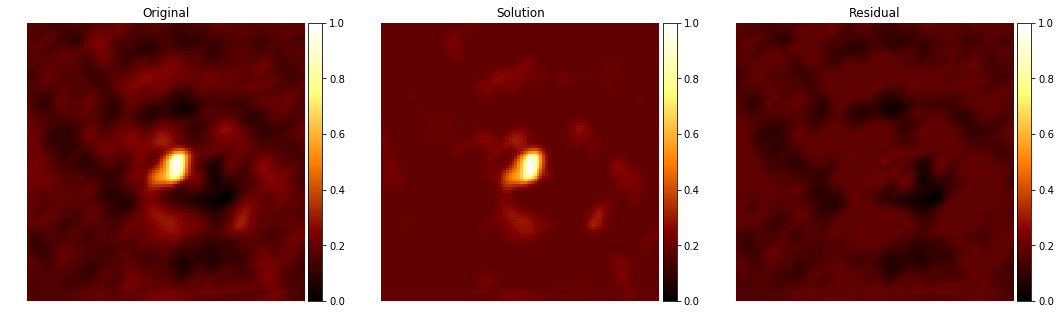

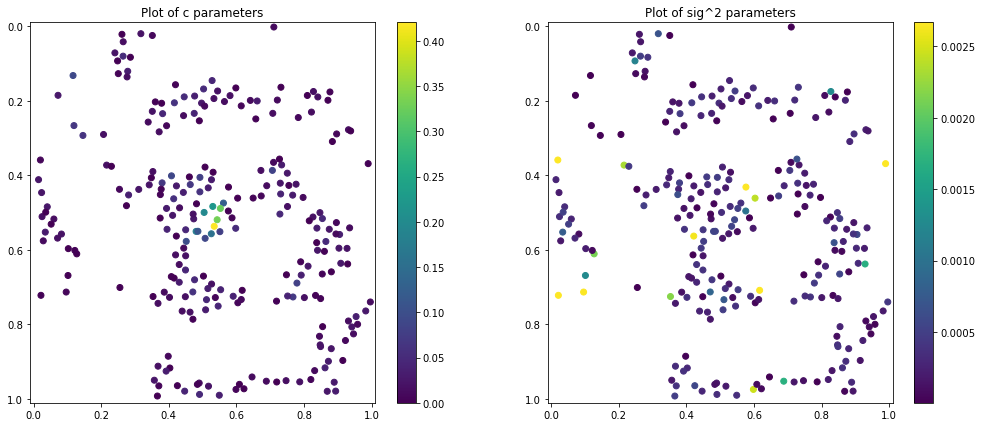

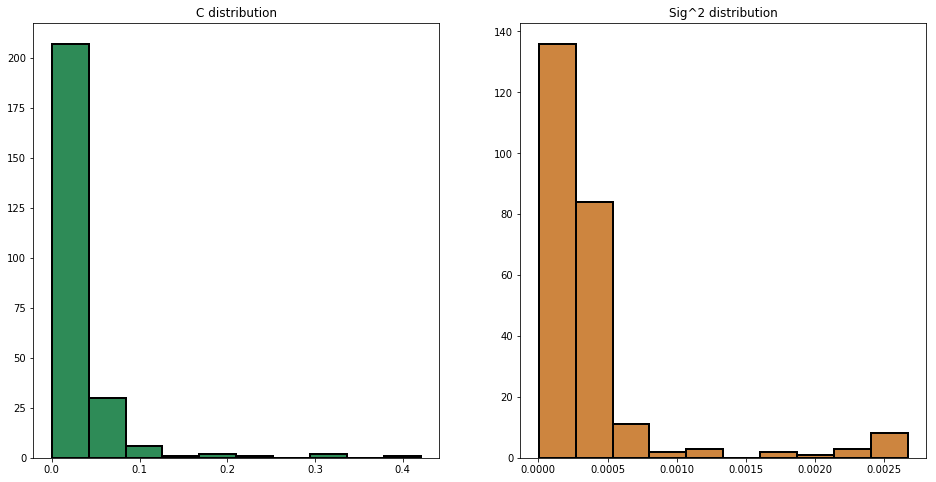

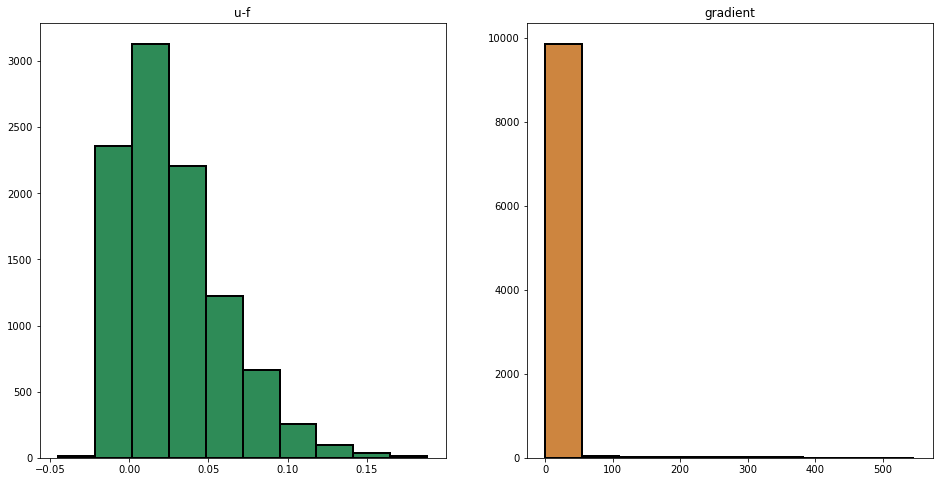

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110110

Residual stats:
Residual RMS: 0.0050833837532293456
Residual Variance: 2.545458495611549e-05
Flux Lost: 0.008365823228302762
Flux Addition: 0.005718043048548578
psi1(u-f): 0.003730236653688297
Exceeded Pixels: 1314
Sharpness: 54.38431672138782
psi2(grad u): 2.712945668322717
Total elapsed time: 304.2759585380554 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.14106998293742273
Mean min distance between collocation and cent

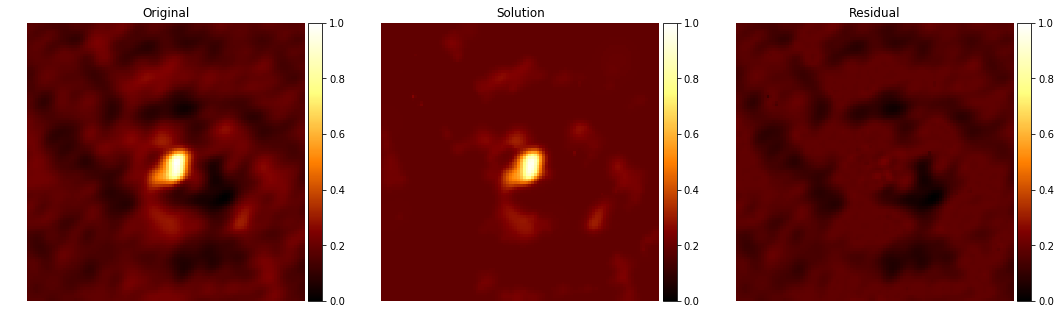

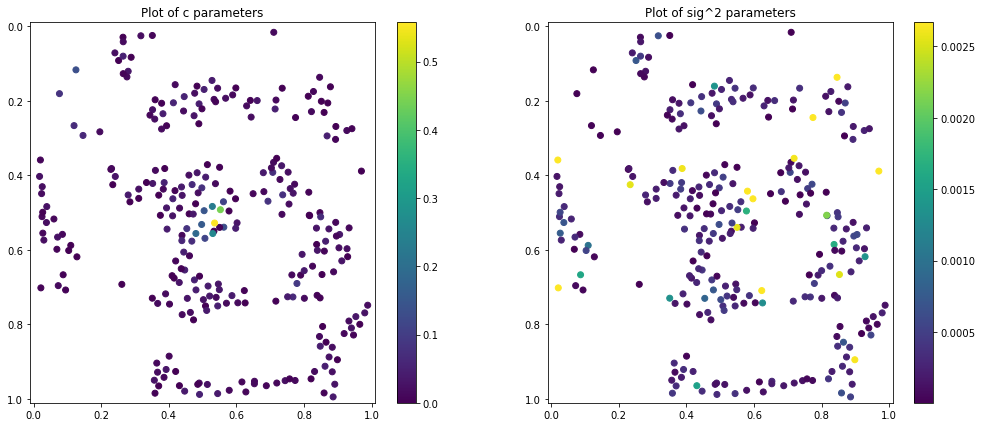

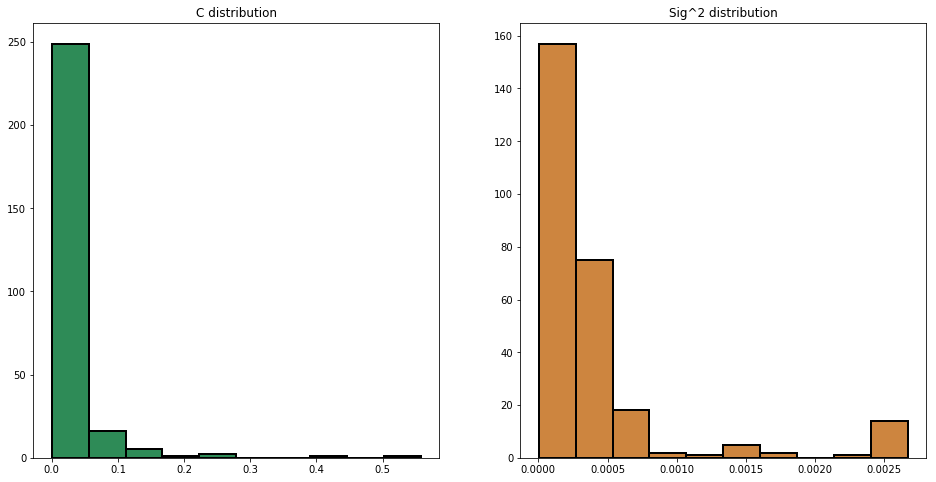

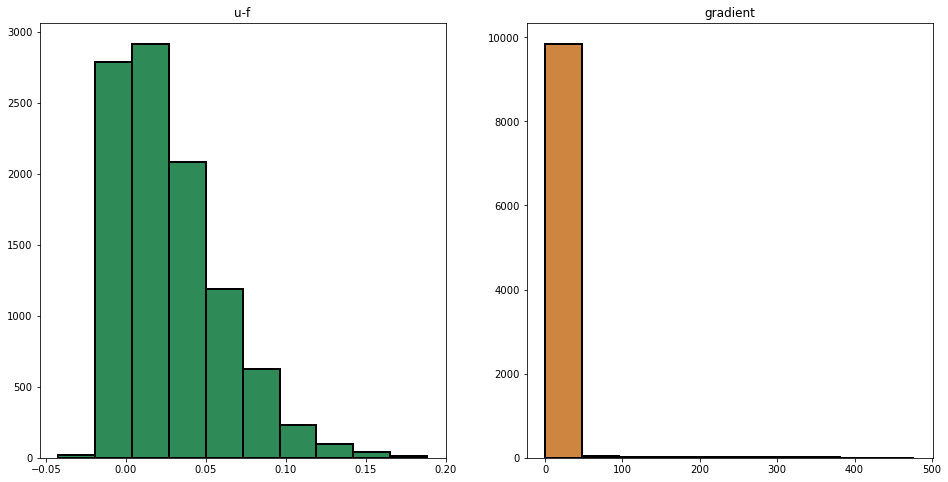

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.004439329969180049
Residual Variance: 1.95137007933806e-05
Flux Lost: 0.007167167512811016
Flux Addition: 0.0052908022302566955
psi1(u-f): 0.0045014320163063275
Exceeded Pixels: 1304
Sharpness: 54.82781150351823
psi2(grad u): 2.709345521393167
Total elapsed time: 390.73084139823914 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.12315335203526503
Mean min distance between collocation and cen

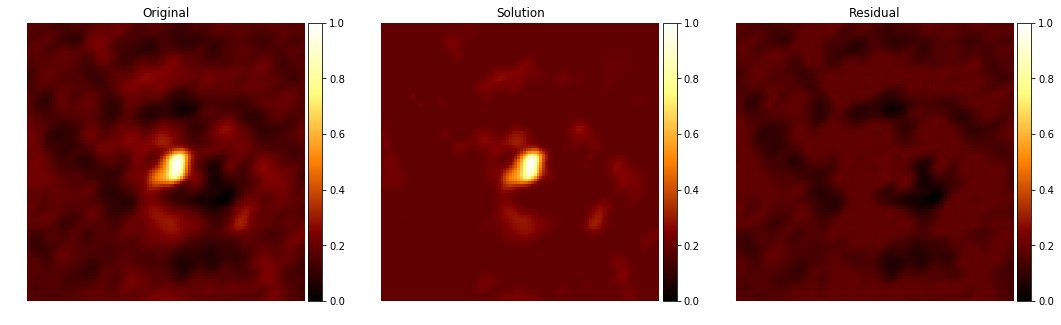

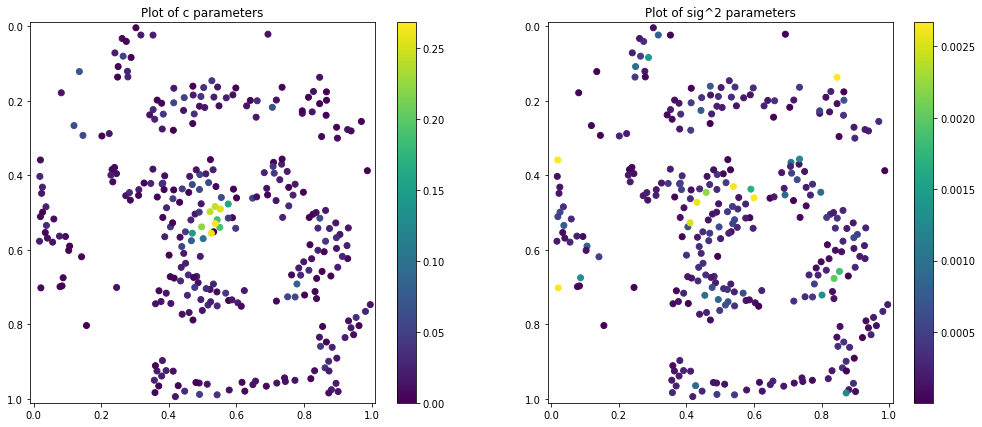

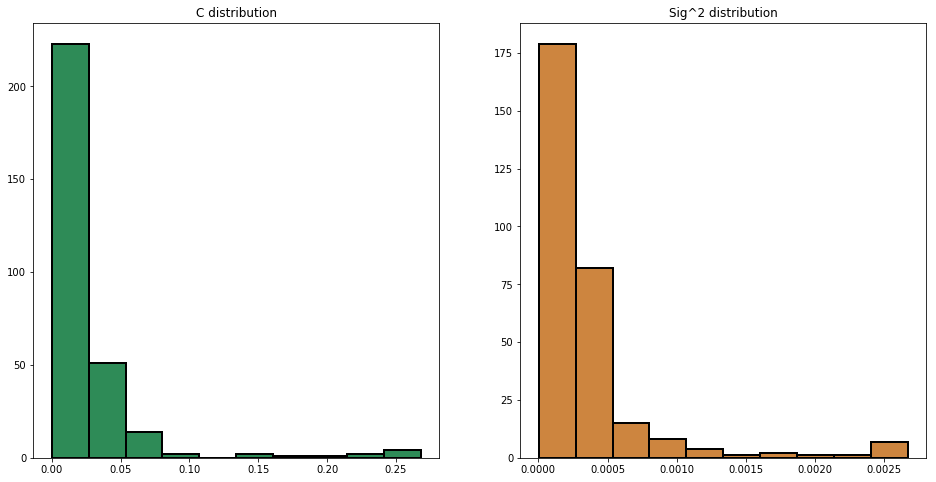

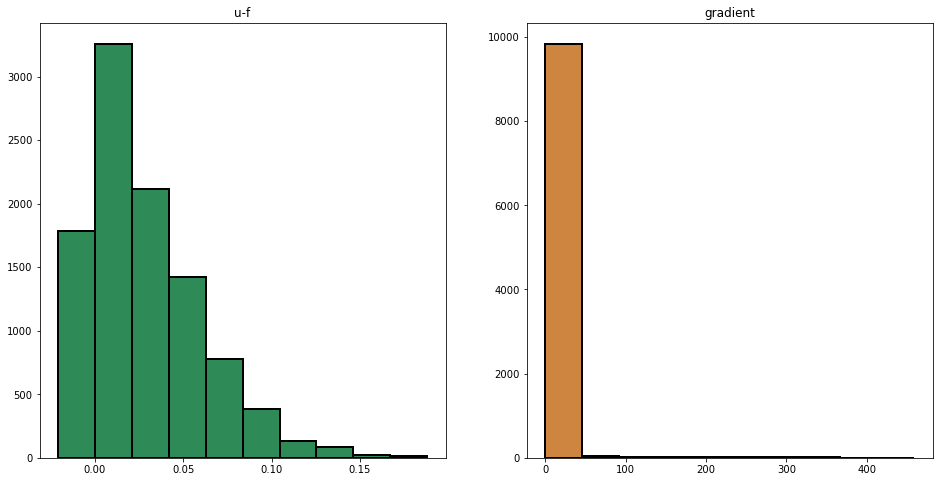

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130109

Residual stats:
Residual RMS: 0.003931389395724337
Residual Variance: 1.529620921280296e-05
Flux Lost: 0.00630488422783901
Flux Addition: 0.0046026968258771565
psi1(u-f): 0.002720010203429857
Exceeded Pixels: 1328
Sharpness: 54.88693152793219
psi2(grad u): 2.747981699898483
Total elapsed time: 498.6062834262848 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.12298545962170178
Mean min distance between collocation and cente

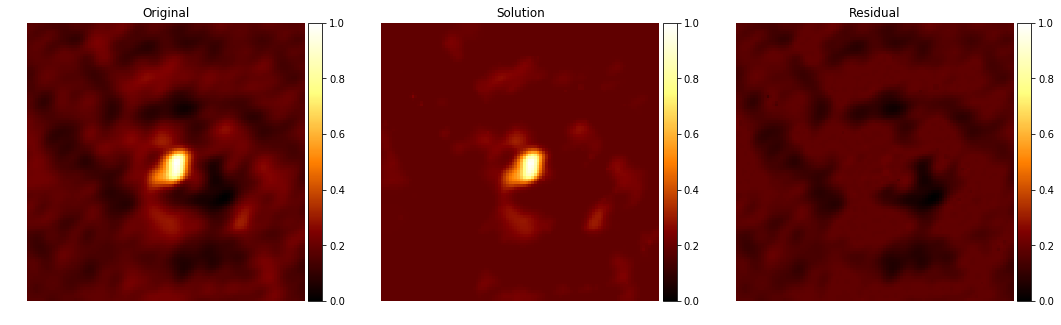

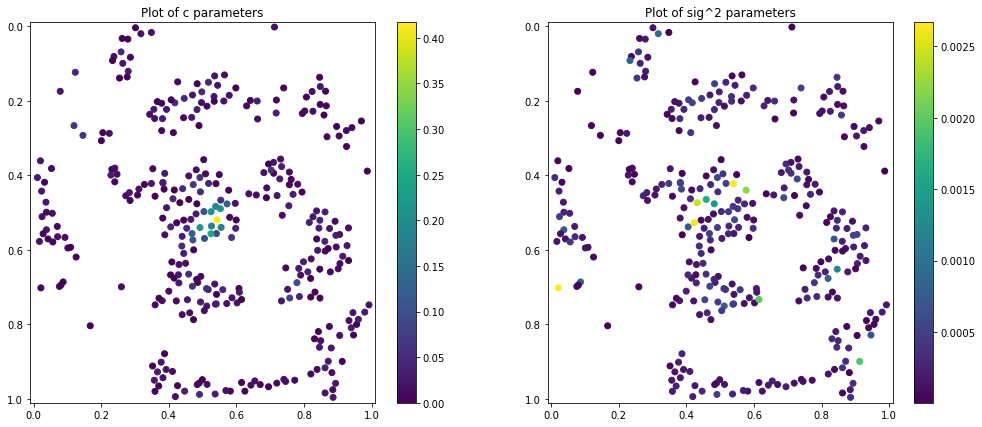

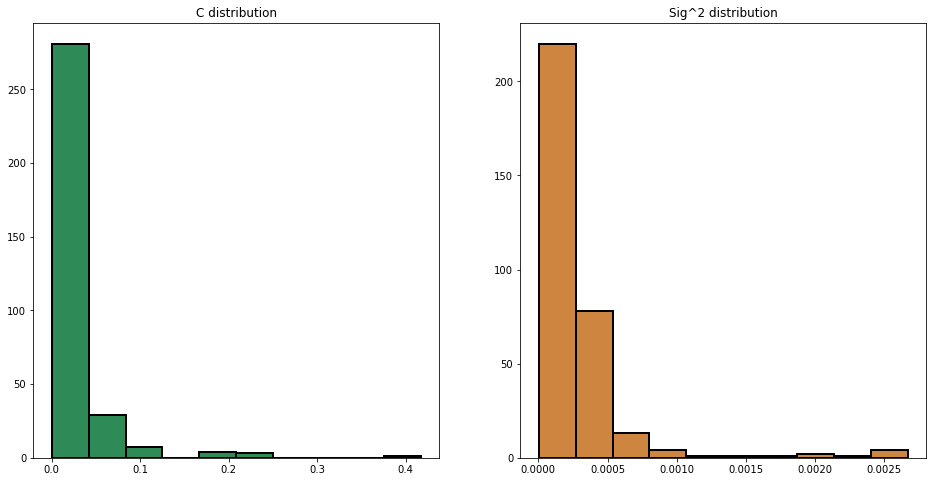

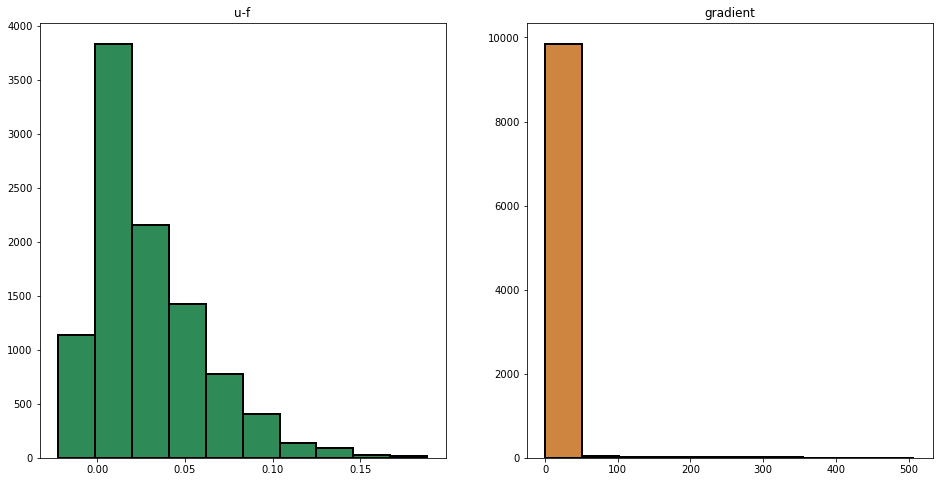

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140110

Residual stats:
Residual RMS: 0.0037641465336291577
Residual Variance: 1.4038719903747961e-05
Flux Lost: 0.0058905710152726805
Flux Addition: 0.004353914831716565
psi1(u-f): 0.002688496796288831
Exceeded Pixels: 1312
Sharpness: 55.43974602468641
psi2(grad u): 2.7416372005744374
Total elapsed time: 580.0631995201111 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.11791883208691917
Mean min distance between collocation and c

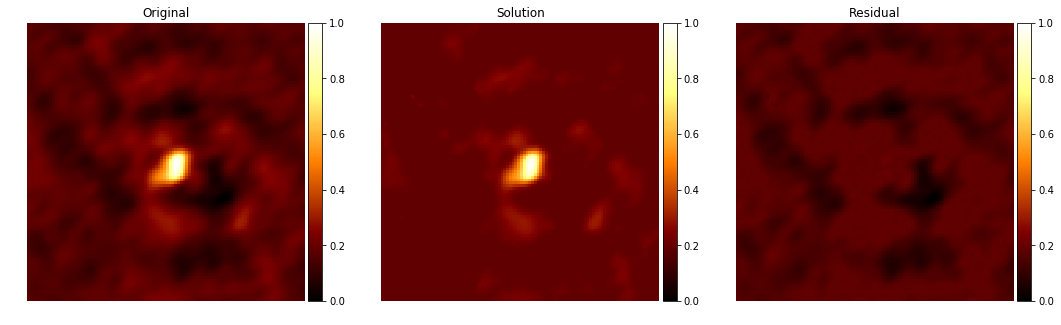

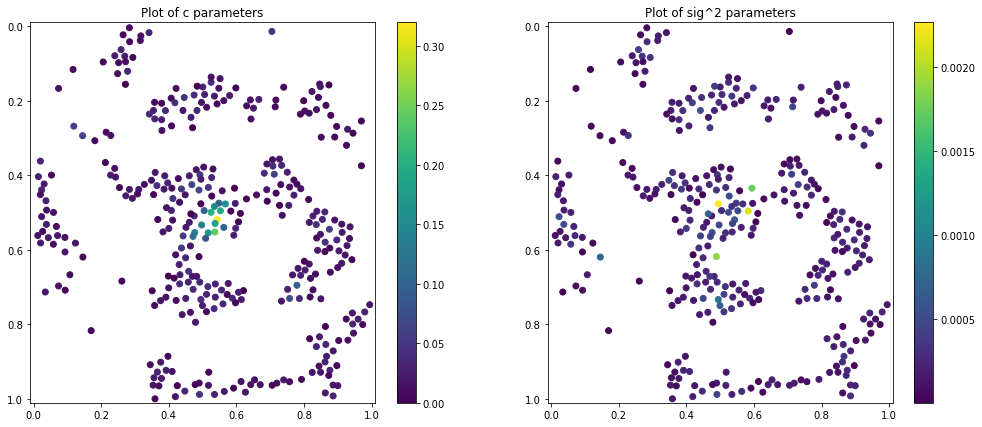

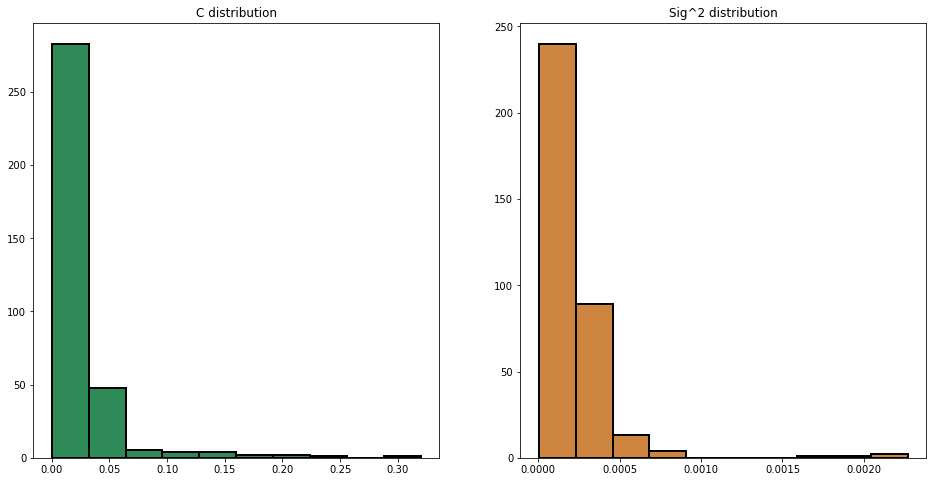

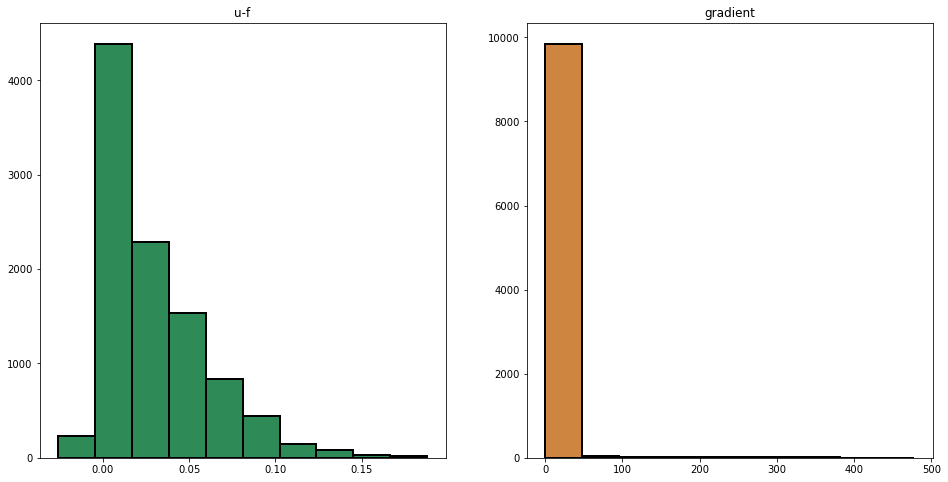

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150115

Residual stats:
Residual RMS: 0.003634194291580389
Residual Variance: 1.3130992302380128e-05
Flux Lost: 0.005518000420295674
Flux Addition: 0.004340527956343198
psi1(u-f): 0.0024937075915616386
Exceeded Pixels: 1314
Sharpness: 56.04993615332063
psi2(grad u): 2.749192385239838
Total elapsed time: 739.3988320827484 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.11756551195062893
Mean min distance between collocation and cen

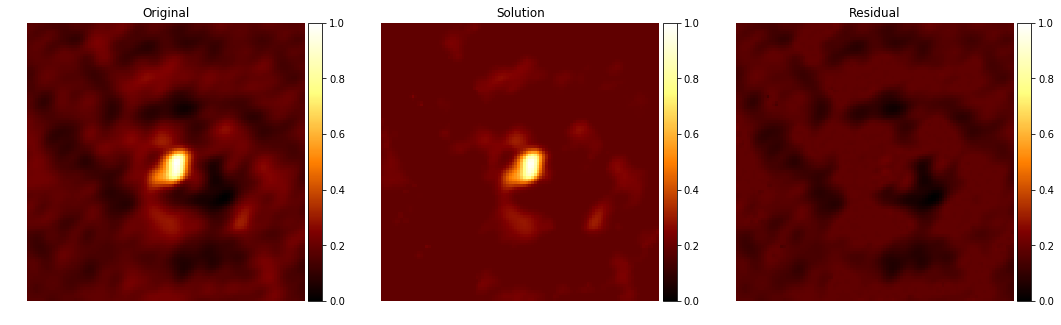

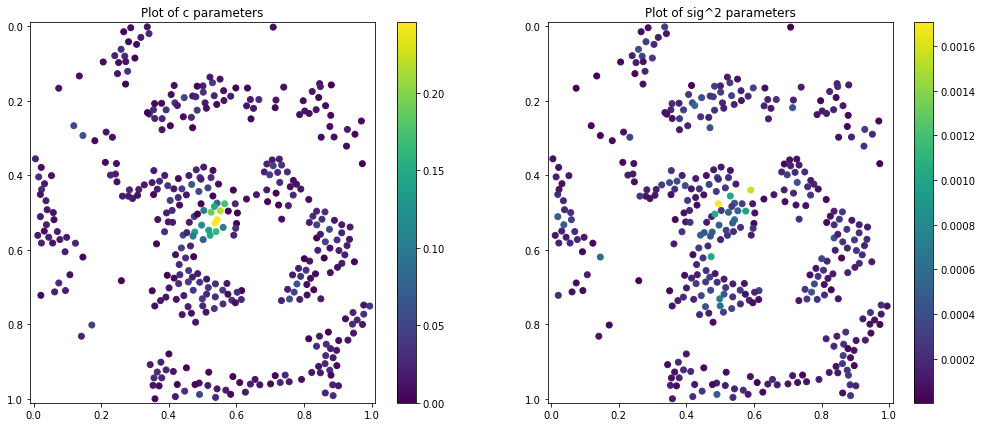

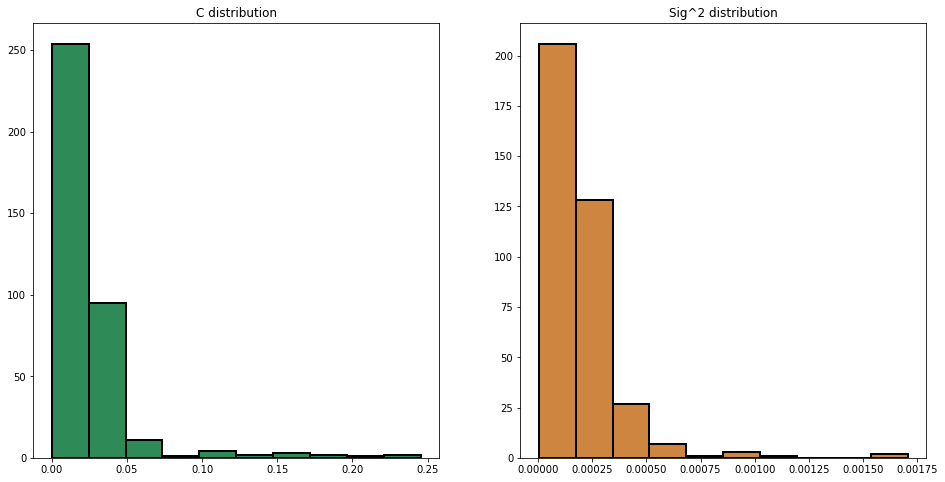

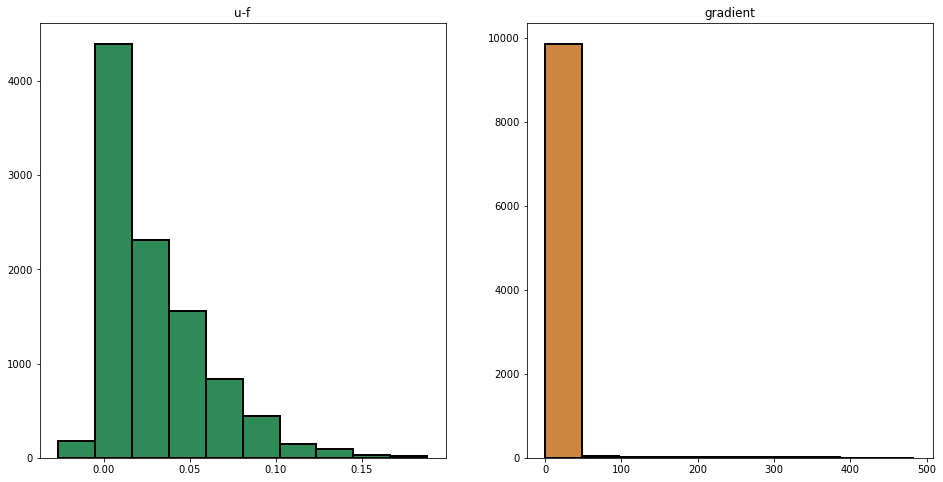

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160111

Residual stats:
Residual RMS: 0.0033608641093379717
Residual Variance: 1.1204362144660004e-05
Flux Lost: 0.005068641173604842
Flux Addition: 0.0037830532468676606
psi1(u-f): 0.0024500306744947354
Exceeded Pixels: 1261
Sharpness: 54.994236576050355
psi2(grad u): 2.761456541904985
Total elapsed time: 921.5711596012115 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.08924220822400993
Mean min distance between collocation and 

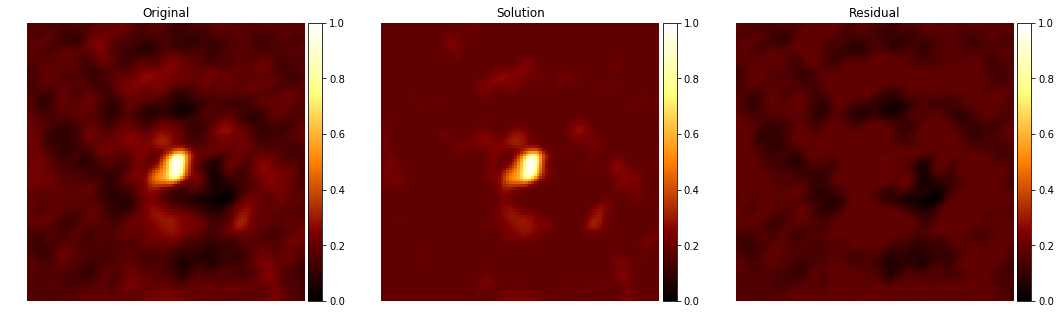

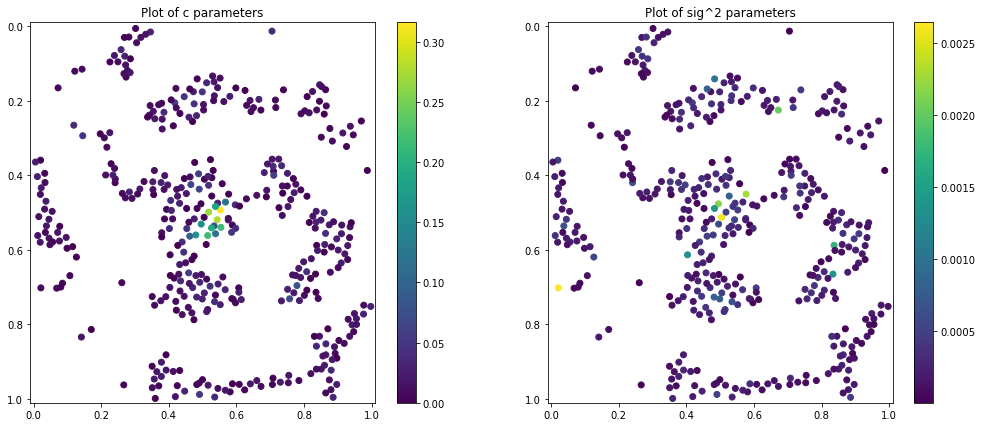

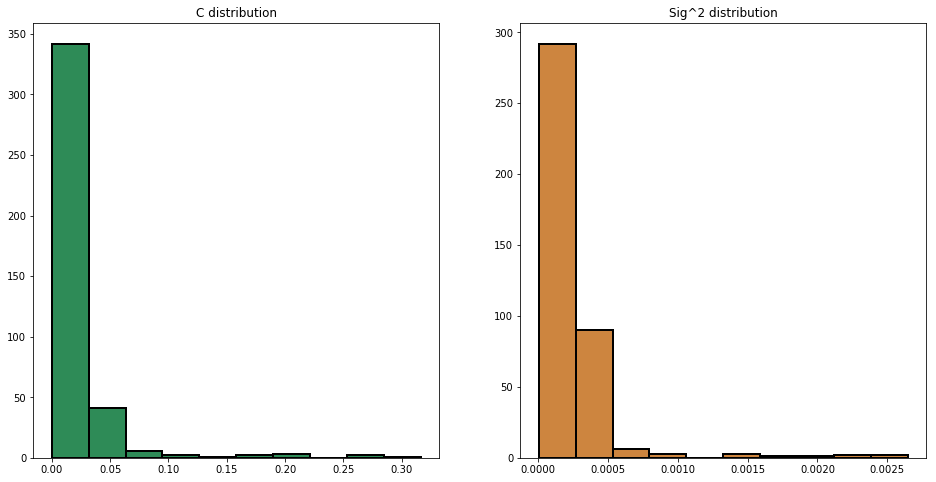

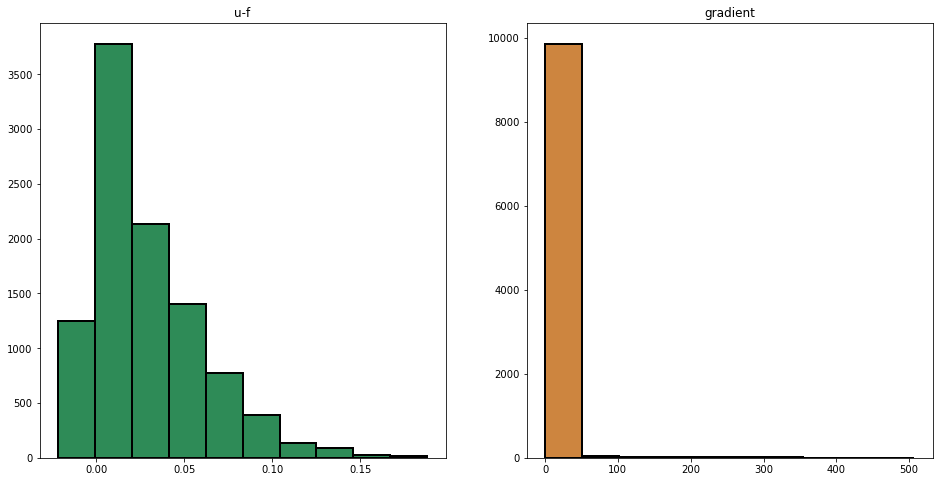

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170109

Residual stats:
Residual RMS: 0.003492704113124619
Residual Variance: 1.2157538305195668e-05
Flux Lost: 0.004672542752452131
Flux Addition: 0.003805177362138828
psi1(u-f): 0.006499498044930797
Exceeded Pixels: 1292
Sharpness: 55.16557217639489
psi2(grad u): 2.7665744884297183
Total elapsed time: 1070.1763141155243 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.08479417878434393
Mean min distance between collocation and ce

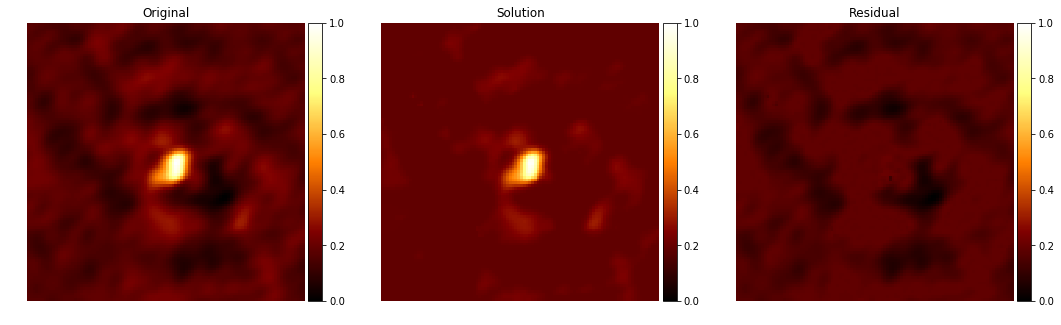

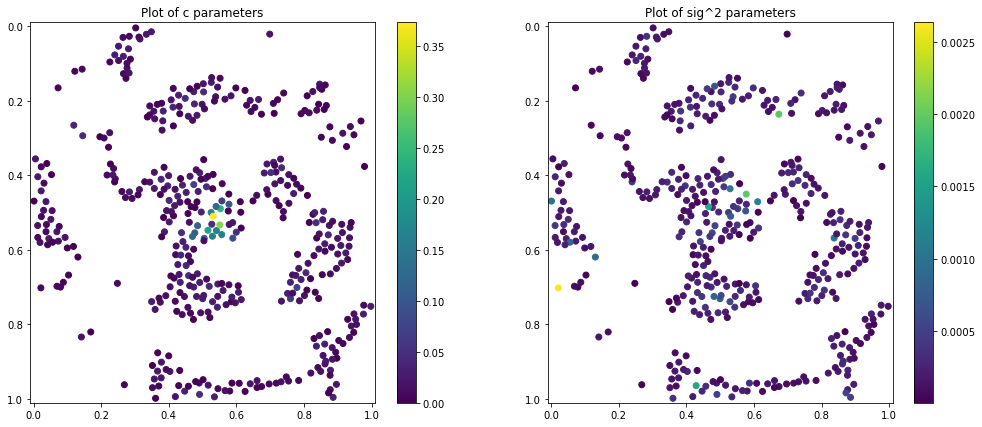

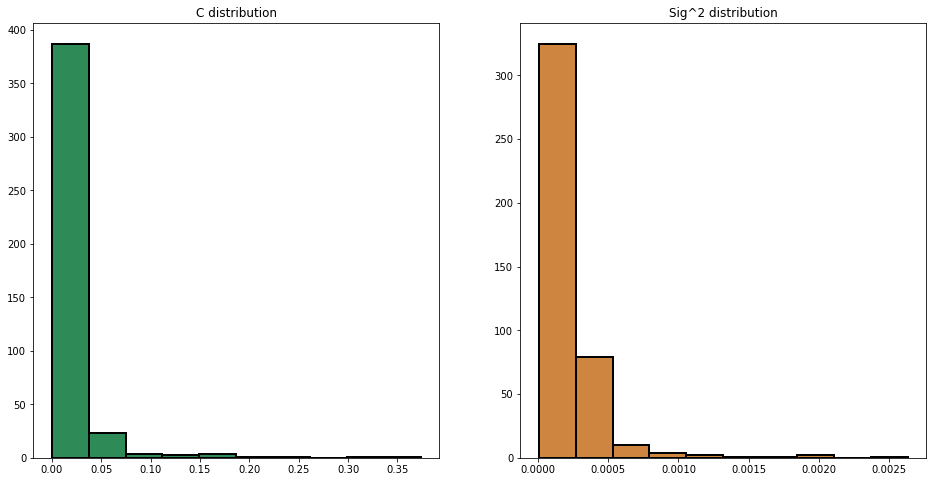

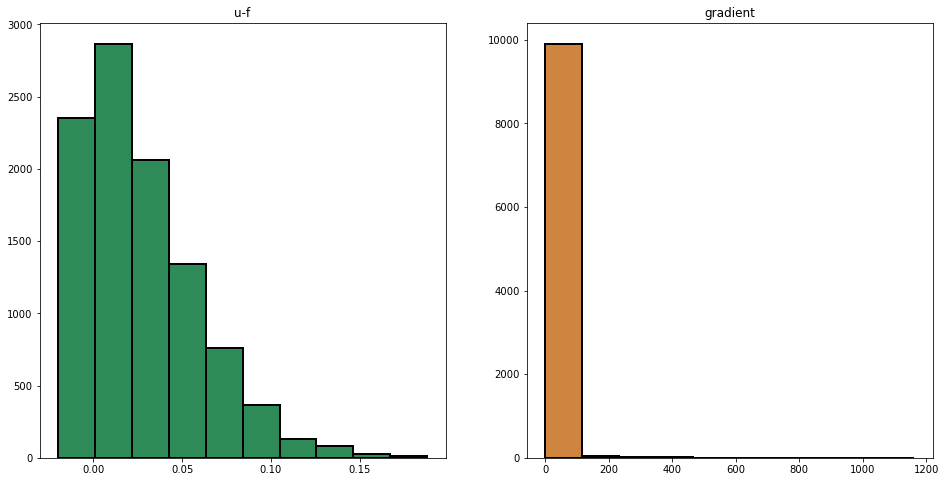

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180110

Residual stats:
Residual RMS: 0.0037914603643853053
Residual Variance: 1.4347140609062454e-05
Flux Lost: 0.004578275628527118
Flux Addition: 0.0038649419969622035
psi1(u-f): 0.012023654661044802
Exceeded Pixels: 1249
Sharpness: 55.17761782745306
psi2(grad u): 2.7616812841668468
Total elapsed time: 1164.988906621933 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0739952155899573
Mean min distance between collocation and ce

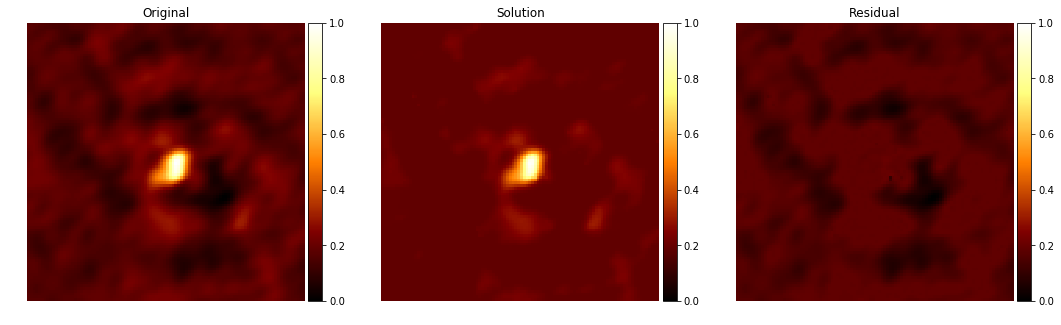

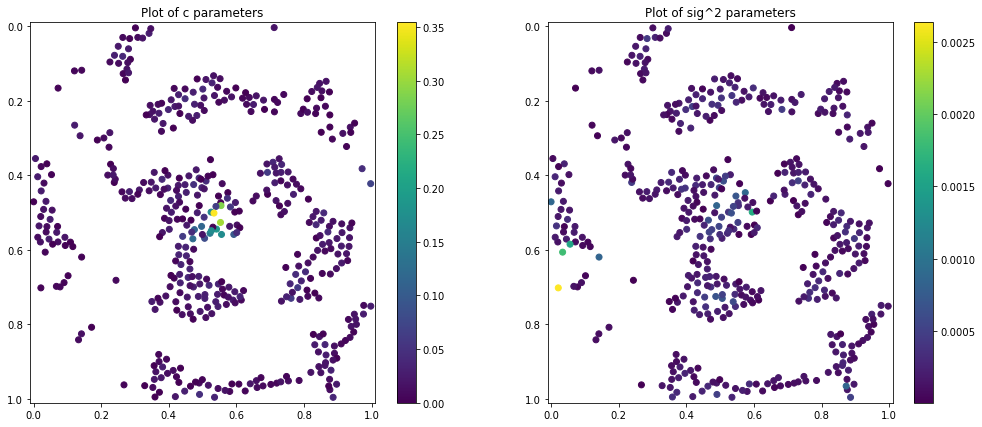

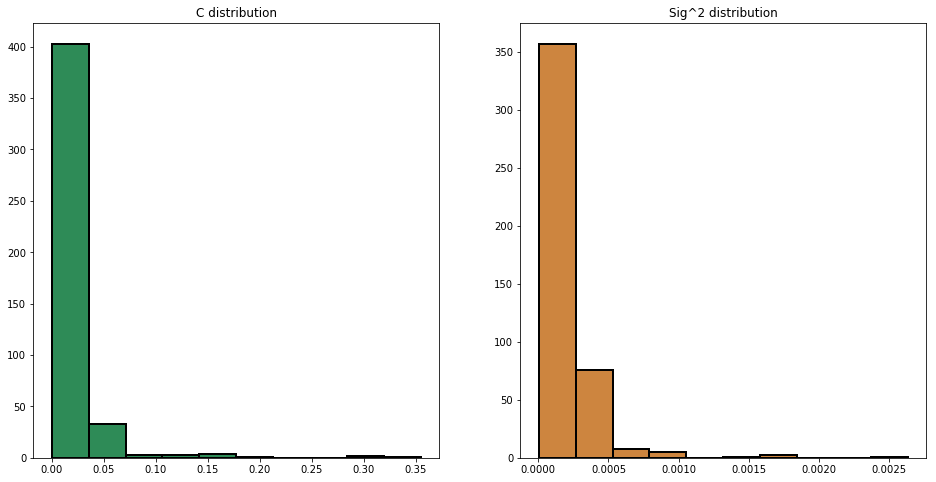

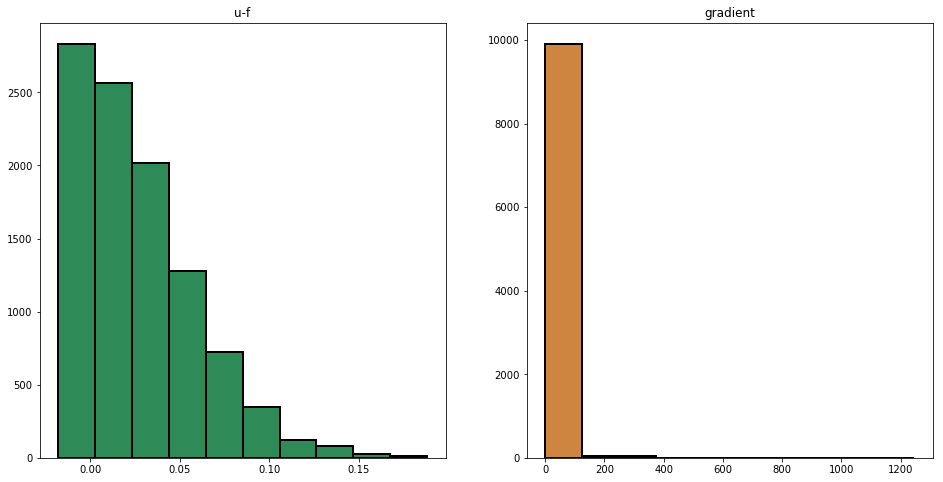

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190112

Residual stats:
Residual RMS: 0.00305479416192467
Residual Variance: 9.281069042195871e-06
Flux Lost: 0.004359061153612287
Flux Addition: 0.003399727751483628
psi1(u-f): 0.002362706055541071
Exceeded Pixels: 1270
Sharpness: 55.49120808958971
psi2(grad u): 2.751801051001749
Total elapsed time: 1371.915227174759 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.07436909457467503
Mean min distance between collocation and center

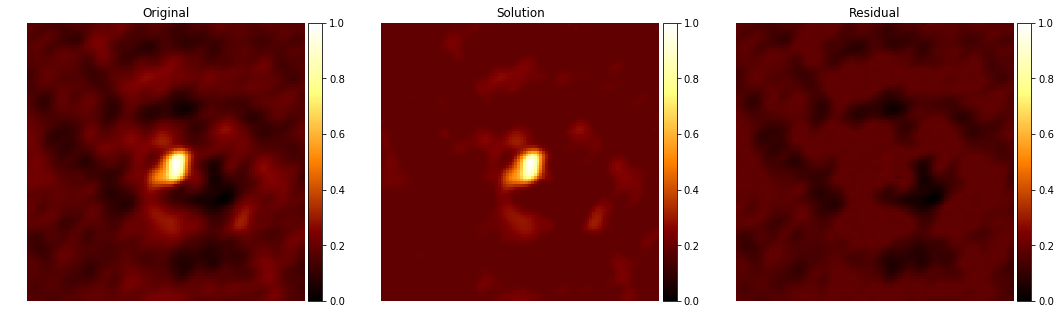

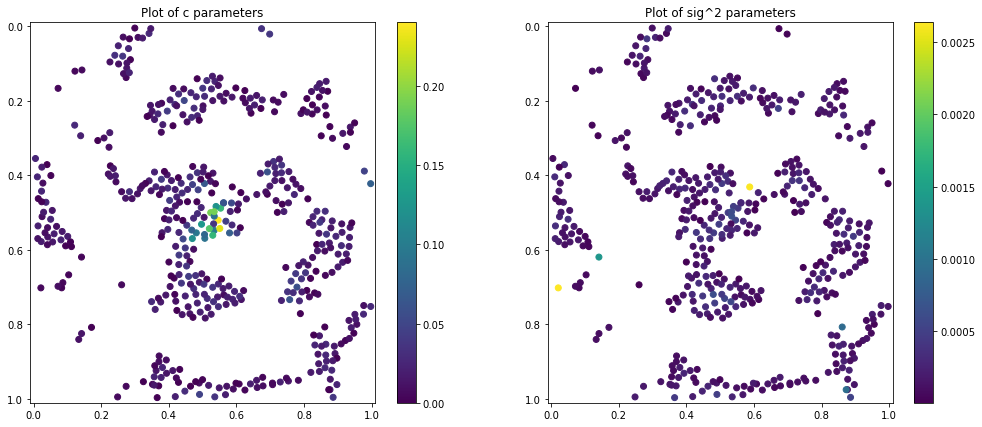

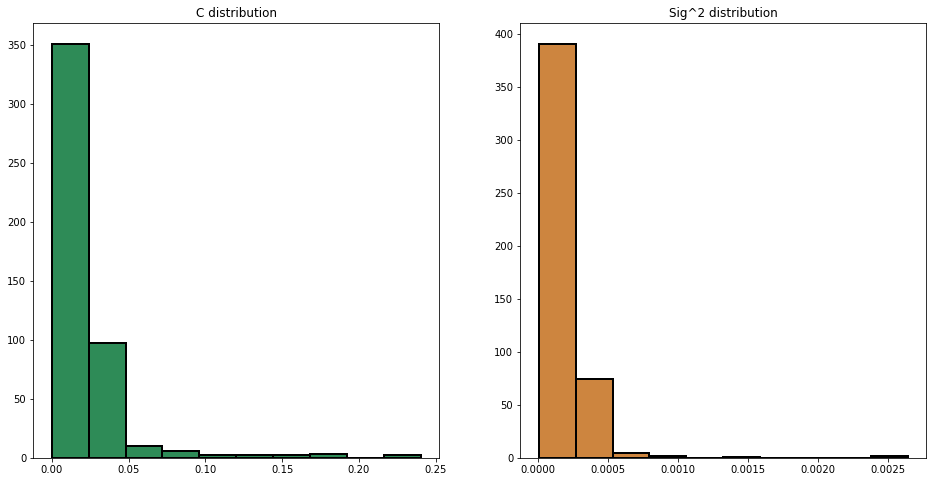

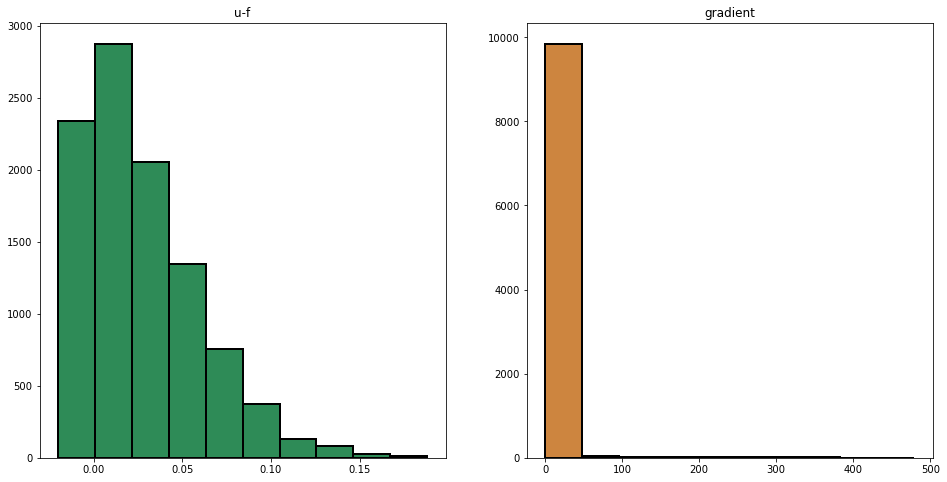

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200112

Residual stats:
Residual RMS: 0.0029072743644456573
Residual Variance: 8.36305635280842e-06
Flux Lost: 0.0044519627077947025
Flux Addition: 0.003179556863970433
psi1(u-f): 0.0012822338668823643
Exceeded Pixels: 1253
Sharpness: 55.16120556888414
psi2(grad u): 2.7683431674673367
Total elapsed time: 1532.1279091835022 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.07732401437604897
Mean min distance between collocation and c

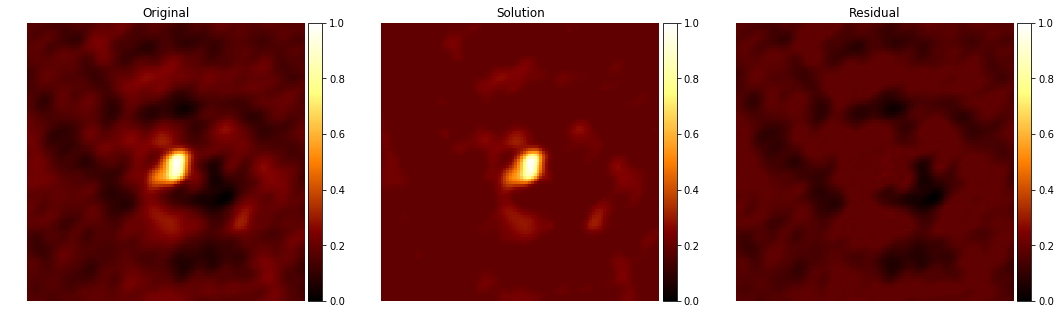

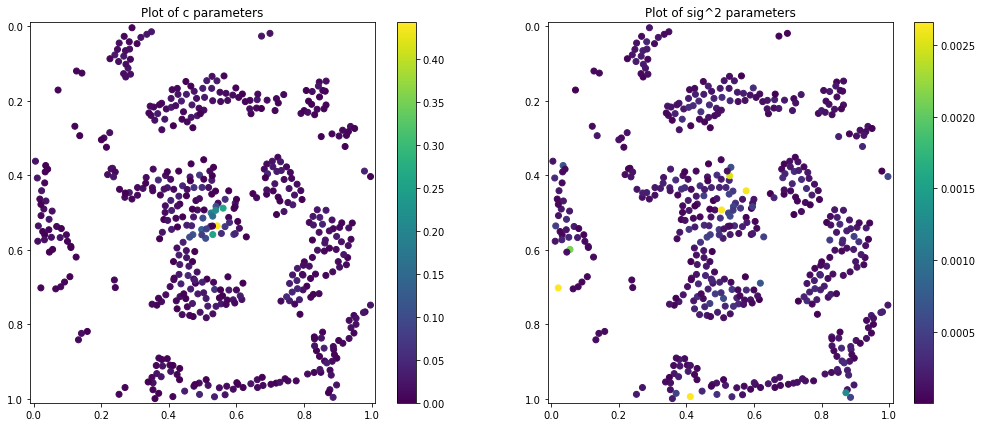

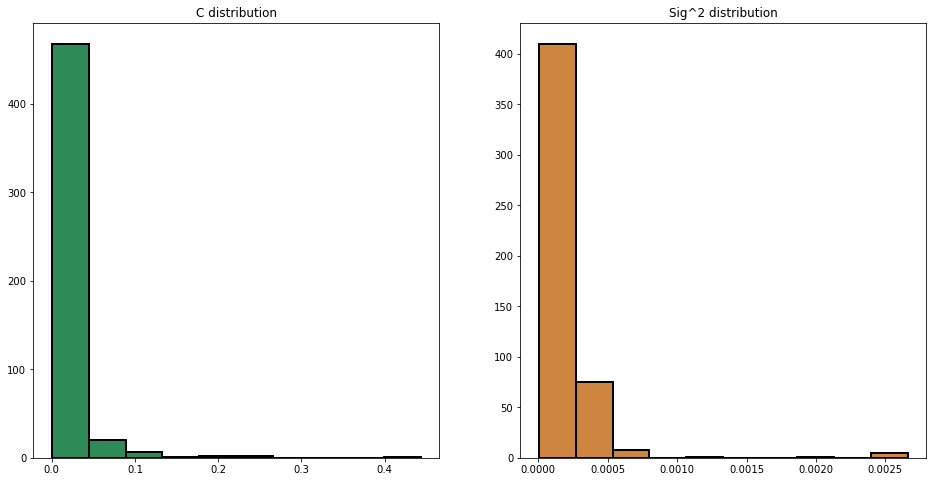

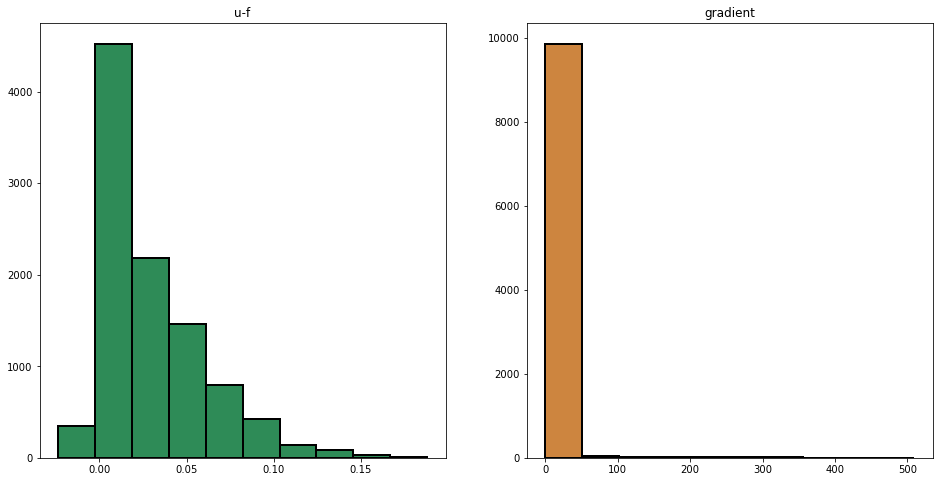

In [7]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    #del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("../results/exp01_m{0}_ngc3265.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `NGC3265` (`method=1`)

In [6]:
elm_list = pickle.load( open('../results/exp01_m1_ngc3265.pkl', 'rb') )

n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

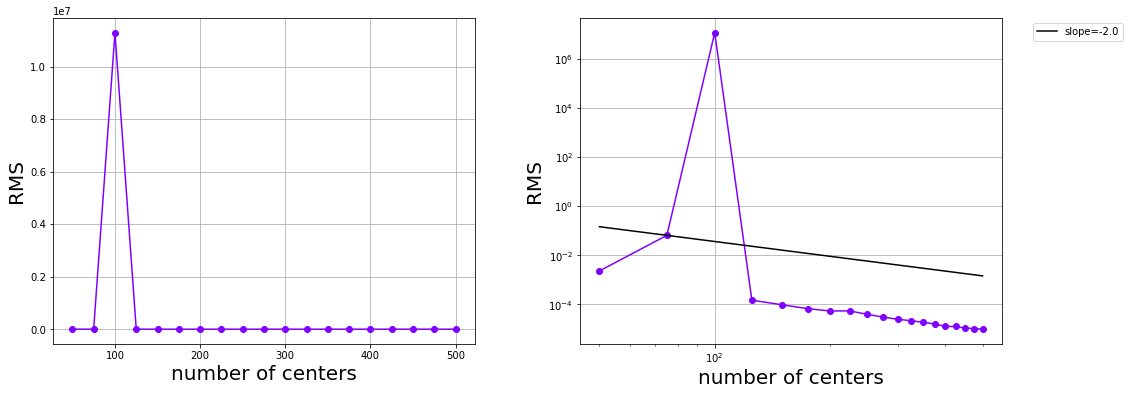

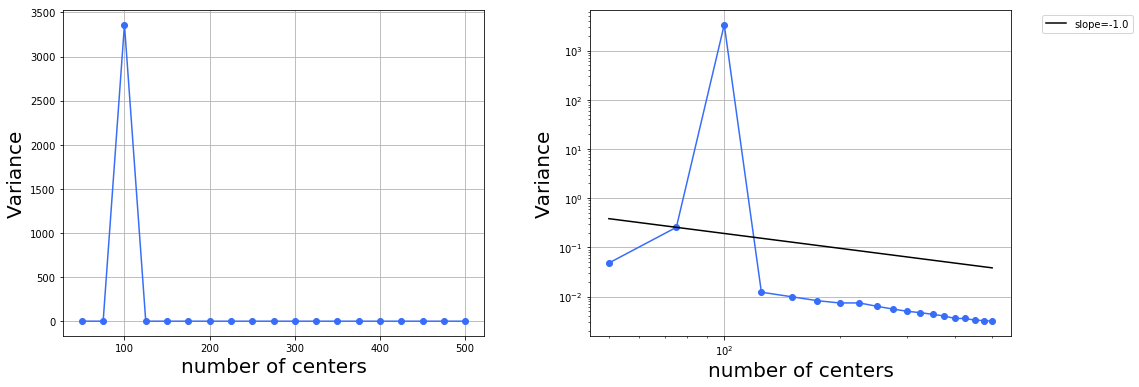

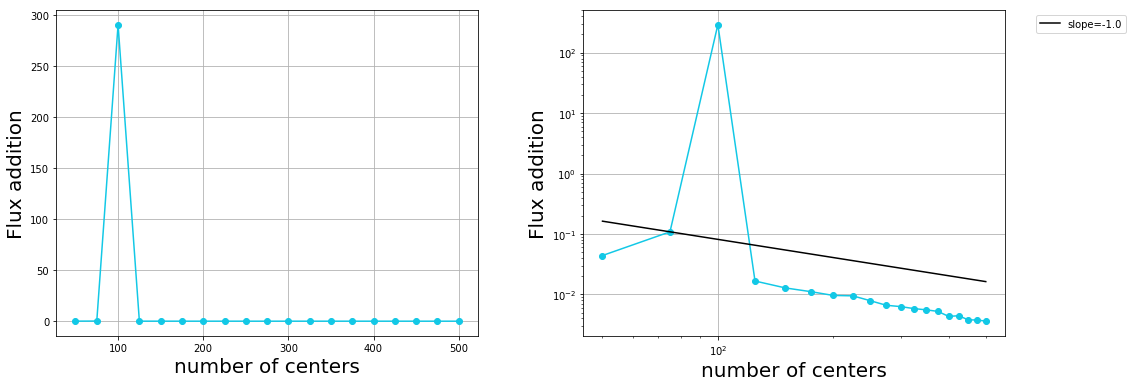

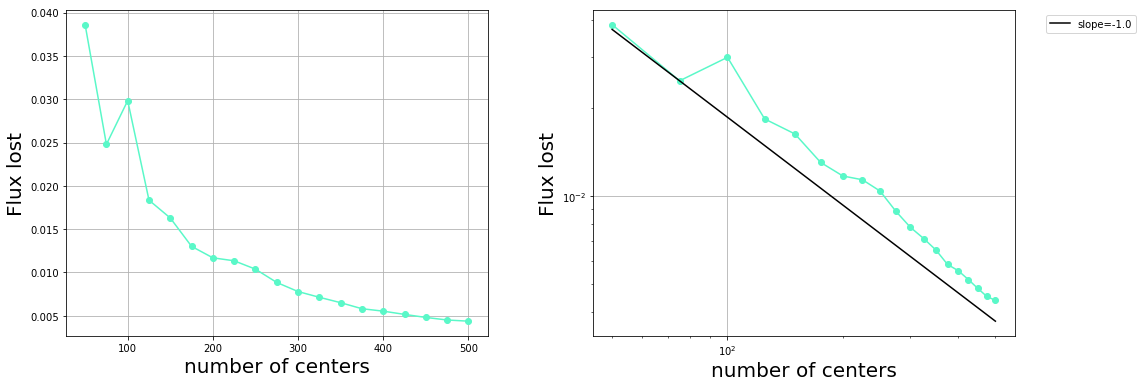

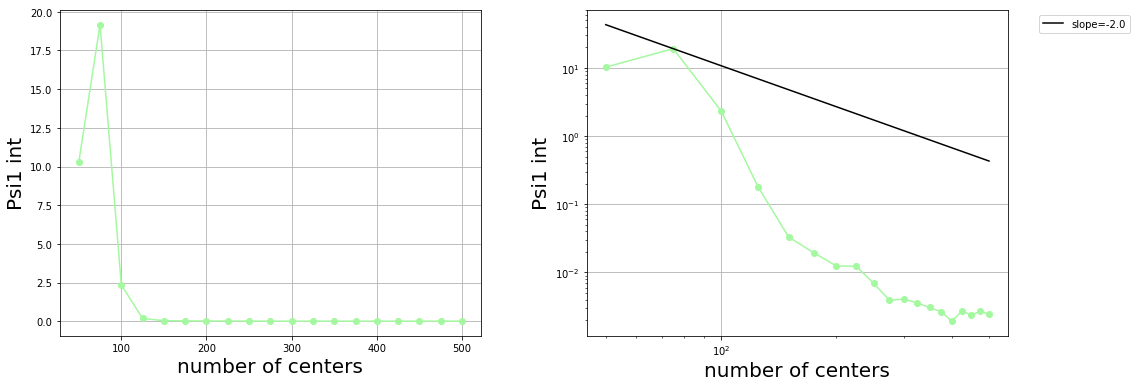

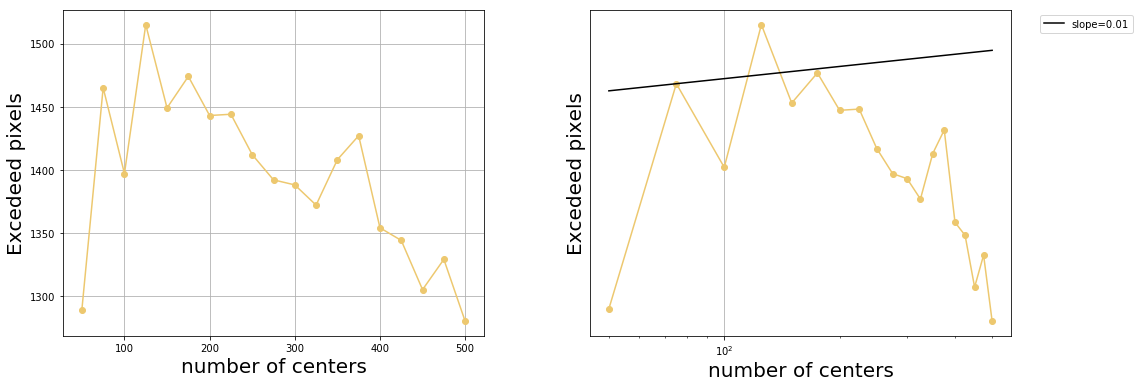

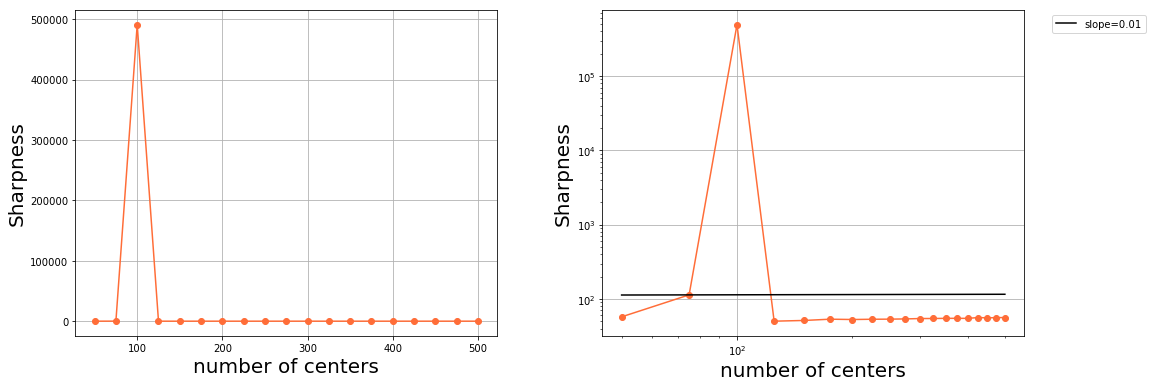

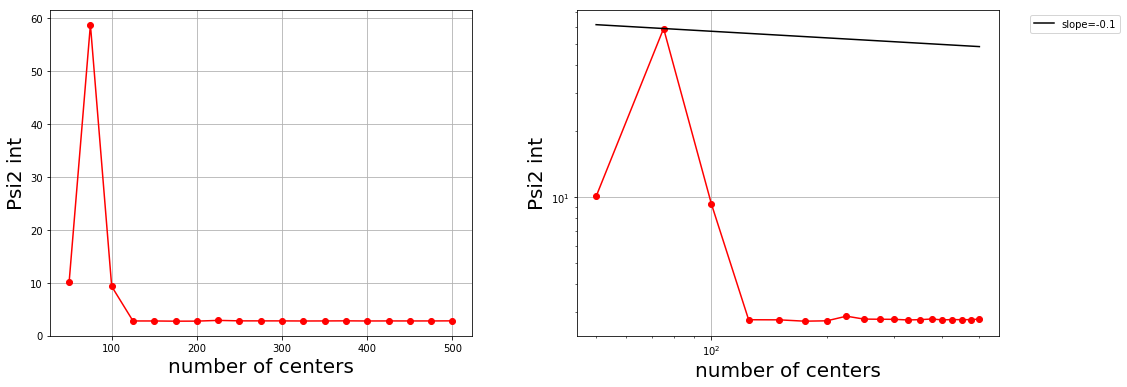

In [7]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])

## Analysis of results in `NGC3265` (`method=2`)

In [8]:
elm_list = pickle.load( open('../results/exp01_m2_ngc3265.pkl', 'rb') )

n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

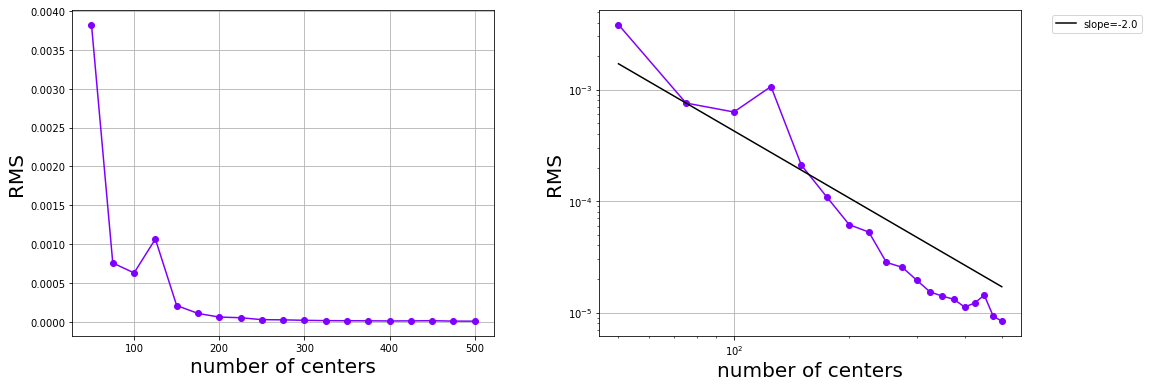

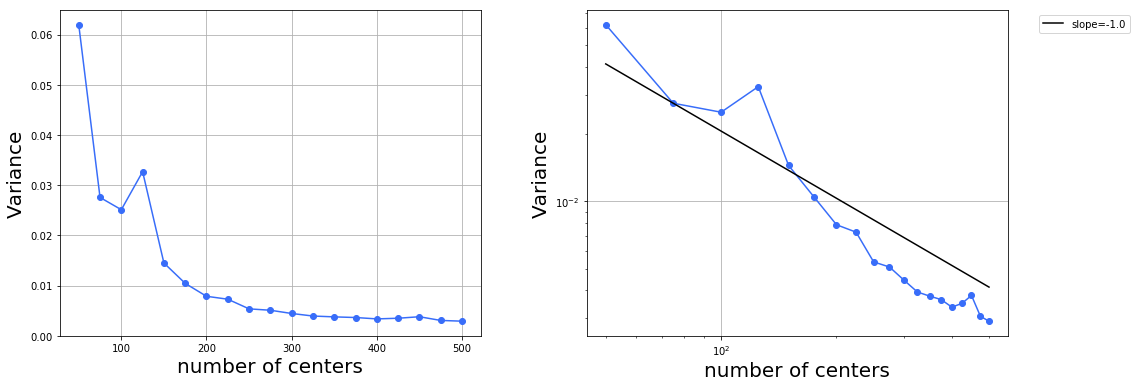

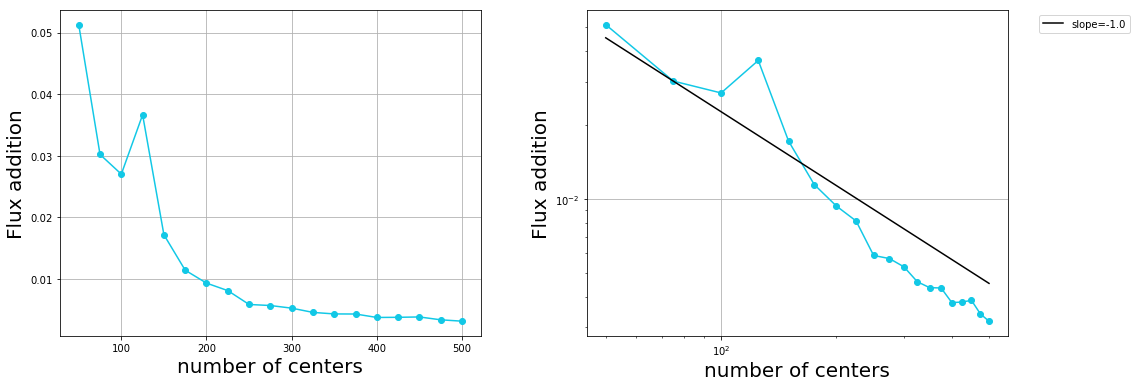

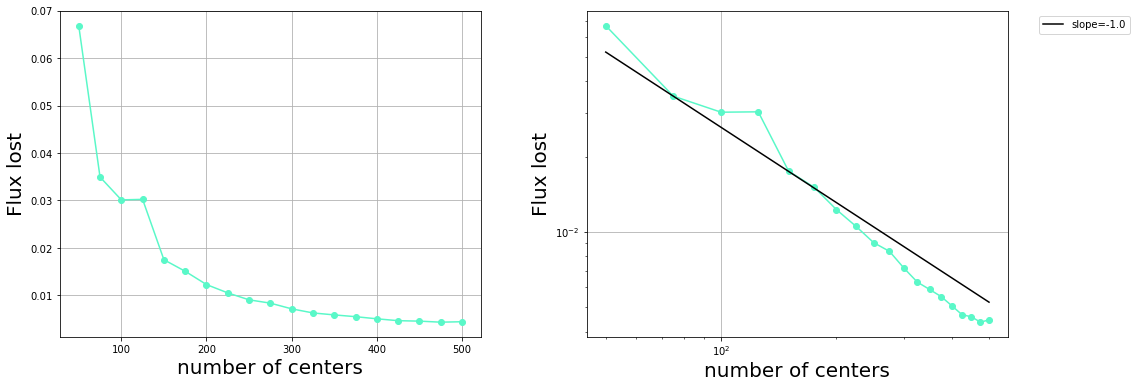

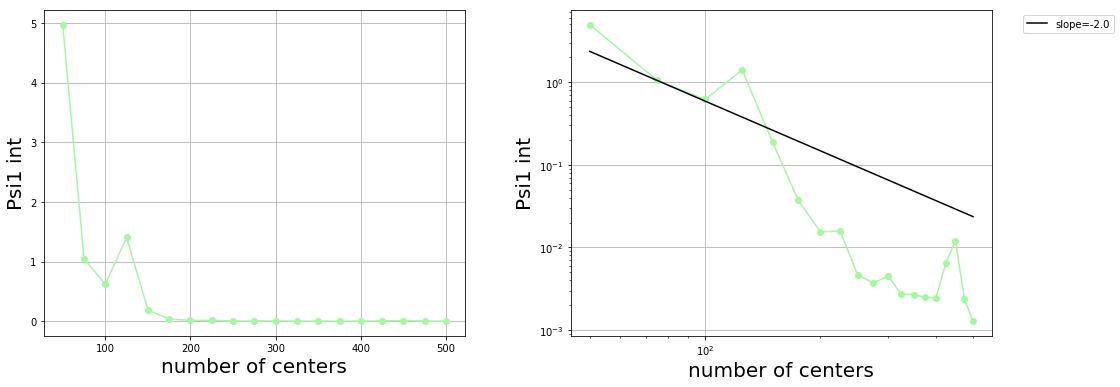

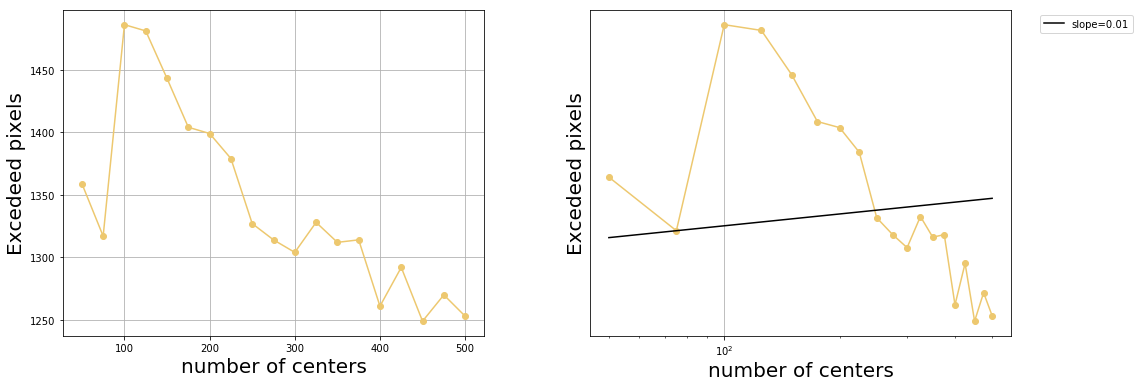

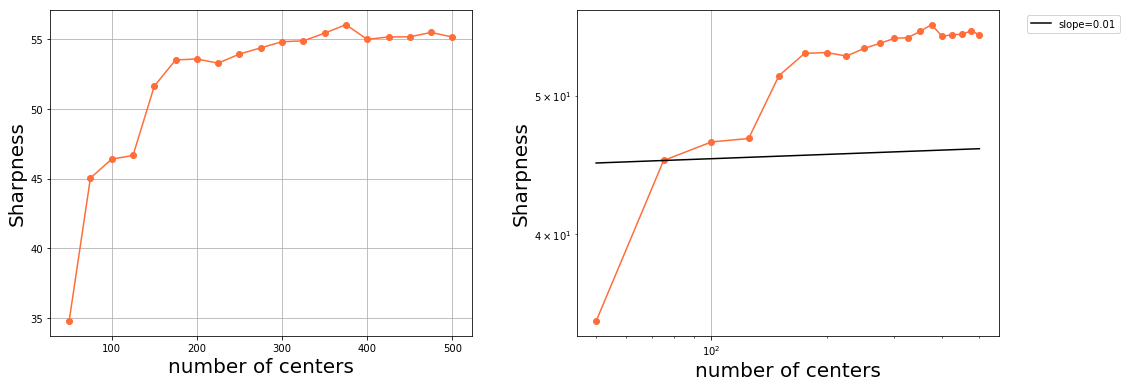

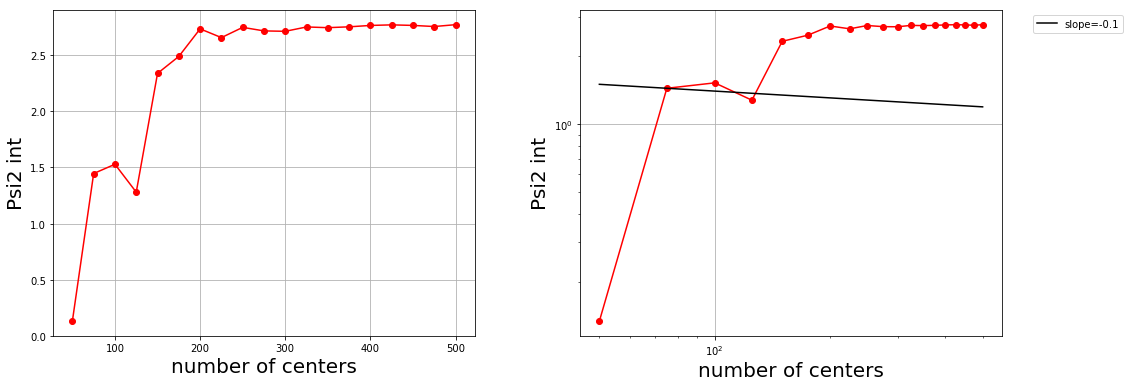

In [9]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])